# Logistic Regression with Algerian Forest Fires Dataset

Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

Logistic Regression :

- Logistic Regression is used for classification problems.
- It is a statistical analysis method to predict binary outputs, such as “true/false” or “yes/no”, based on prior observations and the outputs are bounded in between 0 and 1. Therefore, we can say that logistic regression acts as a binary classifier.


### 1. Problem Statement
- The dataset includes data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 
- User need to make a Logstic Regression Model to predict that Algeria Forest will catch up fire or not based on input data.
- Presdiction result can be used to take corrective action or prevent the mishap.

### 2. Data Collection
- This data set collected from UCI Machine Learning Repository (Website).
- The dataset includes  columns and 244 rows 

### 2.1 Import data and import module

Importing pandas, numpy, seaborn, warnings, matplotlib library

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from six.moves import urllib
import os

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()

### Download and import csv data as DataFrame

In [215]:
import os

download_dir = "./data/"
download_url = "https://raw.githubusercontent.com/saisubhasish/datasets/main/Algerian_forest_fires_dataset_UPDATE.csv"

os.makedirs(download_dir, exist_ok=True)
filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

# Converting to dataframe by ignoring first row 
dataset = pd.read_csv(download_file_path, header=[1])

In [216]:
df= dataset.copy()

### Top 5 rows

In [217]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

### 3. Data Cleaning

In [218]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire      

[246 rows x 14 columns]

### Dropping row : 122,123

Removing un-necessary columns

In [219]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [220]:
# df.drop([122,123], axis=0, inplace=True)

df = df.drop([122,123], axis=0)

# Resetting the index value
df.reset_index(inplace=True)

In [221]:
df[120:125]

index day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  \
120    120  29    09  2012          26  80  16   1.8  47.4  2.9  7.7  0.3   
121    121  30    09  2012          25  78  14   1.4    45  1.9  7.5  0.2   
122    124  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6   
123    125  02    06  2012          30  73  13     4  55.7  2.7  7.8  0.6   
124    126  03    06  2012          29  80  14     2  48.7  2.2  7.6  0.3   

     BUI  FWI    Classes    
120    3  0.1  not fire     
121  2.4  0.1  not fire     
122  2.8  0.2  not fire     
123  2.9  0.2  not fire     
124  2.6  0.1  not fire

#### Adding a new column date and removing columns 'day', 'month', 'year'

In [222]:
#df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
#df.drop(['day', 'month', 'year'], axis=1, inplace=True)

#### Dropping the unnecessary column "index"

In [223]:
df.drop(columns=['index'], inplace=True)

Adding a new feature as "Region" for 'Bejaia' and 'Sidi-Bel Abbes' as ) 0 and 1

In [224]:
for index in range(df.shape[0]):
    if index < 122 :
        df.loc[index, 'region'] = 0
    else:
        df.loc[index, 'region'] = 1

In [225]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    region  
0    0.5   not fire        0.0  
1    0.4   not fire        0.0  
2    0.1   not fire        0.0  
3      0   not fire        0.0  
4    0.5   not fire        0.0  
..   ...           ...     ...  
239  6.5       fire        1.0  
240    0   not fire        1.0  
241  0.2   not fire        1.0  
242  0.7   not fire        1.0  
243  0.5  not fire         1.0  

[244 rows x 15 columns]

In [226]:
# Column names

df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

#####  Trimming the space from column names

In [227]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [228]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

##### Trimming the values in 'Classes' column

In [229]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [230]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

##### Handling value '14.6 9' in the feature DC

In [231]:
df['DC'] = df['DC'].str.split(' ').str[0]

In [232]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

##### Handling value 'fire' in column 'FWI'

In [233]:
df['FWI'] = df['FWI'].str.replace('fire','0')

In [234]:
df.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

    Classes  region  
0  not fire     0.0  
1  not fire     0.0  
2  not fire     0.0  
3  not fire     0.0  
4  not fire     0.0

##### Datatype of dataset

In [235]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
region         float64
dtype: object

### Converting the datatypes of features

In [236]:
df = df.astype({'day':int, 'month':int, 'year':int,   'Temperature':float, 'RH':int, 'Ws':int, 
                'Rain':float, 'FFMC':float, 'DMC':float, 'DC':float, 'ISI':float, "BUI":float, 'FWI':float})


# df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype('int64')
# df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

### Checking null values

In [237]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [238]:
 # checking the rows with missing values

df[df['Classes'].isnull()]

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
165   14      7  2012         37.0  37  18   0.2  88.9  12.9  14.6  12.5   

      BUI  FWI Classes  region  
165  10.4  0.0     NaN     1.0

Observation :
- There is only one null value in 'Classes' feature

In [239]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [240]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

In [241]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

Observation :
- Now we have Zero null values

#### Checking the Duplicates records if any

In [242]:
df[df.duplicated()]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, region]
Index: []

##### Replacing the 'Classes' column categorical value with numerical values

In [243]:
df['Classes'] = df['Classes'].map({'not fire':0, 'fire':1})

In [244]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012         29.0  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012         29.0  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012         26.0  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012         25.0  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012         27.0  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  region  
0  0.5        0     0.0  
1  0.4        0     0.0  
2  0.1        0     0.0  
3  0.0        0     0.0  
4  0.5        0     0.0

## 4. Exploring DataSet
Data profiling

In [245]:
# Checking Shape of data

df.shape

(244, 15)

Observation:
- There are 13 columns and 244 rows in this dataframe

Columns of the dataset

In [246]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [247]:
df.keys()

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

Rows of the dataset

In [248]:
df.index

RangeIndex(start=0, stop=244, step=1)

Check the null/missing values of the dataset

#### 4.1 Check the basic information of the dataset

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  region       244 non-null    float64
dtypes: float64(9), int32(5), int64(1)
memory usage: 24.0 KB


Obseravtion :
- There are 244 rows and 13 columns are there
- There is no Null value in the dataset
- The columns datatypes are of 4 types (float, int, object & datetime)
- For float64: 8 columns, int 32: 2 columns, object: 2 columns, datetime: 1 columns
- Total Memory usage: 32.9+ KB

### Feature Information
Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
    
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90 (Relative humidity (RH) is a measure of how much moisture is in the air)

Ws :Wind speed in km/h: 6 to 29 (wind speed)

Rain: total day in mm: 0 to 16.8 (Rain in a day in mm)

FWI(Fire Weather Index) Components : 0 to 31.1

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 (numerical rating of the moisture content of litter and cured fine fuels)

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 (The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth)

Drought Code (DC) index from the FWI system: 7 to 220.4 (The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers)

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 (Initial Spread Index is a relative measure of how quickly a fire can be expected to spread)

Buildup Index (BUI) index from the FWI system: 1.1 to 68 (It is a numeric rating of the total amount of fuel available for combustion)

Fire Weather Index (FWI) Index: 0 to 31.1 (The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.)

Classes: two classes, namely as fire and as not fire (Result)

Region : There are two regions in the dataset Bejaia Region represented by 1 and Sidi Bel-Abbes Region represented by 1

## 4.2 Statistical Summary of the data   

In [250]:
# Display summary statistics of DataFrame

df.describe().T

count         mean        std     min       25%      50%  \
day          244.0    15.754098   8.825059     1.0     8.000    16.00   
month        244.0     7.500000   1.112961     6.0     7.000     7.50   
year         244.0  2012.000000   0.000000  2012.0  2012.000  2012.00   
Temperature  244.0    32.172131   3.633843    22.0    30.000    32.00   
RH           244.0    61.938525  14.884200    21.0    52.000    63.00   
Ws           244.0    15.504098   2.810178     6.0    14.000    15.00   
Rain         244.0     0.760656   1.999406     0.0     0.000     0.00   
FFMC         244.0    77.887705  14.337571    28.6    72.075    83.50   
DMC          244.0    14.673361  12.368039     0.7     5.800    11.30   
DC           244.0    49.288115  47.619662     6.9    13.275    33.10   
ISI          244.0     4.774180   4.175318     0.0     1.400     3.50   
BUI          244.0    16.664754  14.204824     1.1     6.000    12.25   
FWI          244.0     7.006557   7.438889     0.0     0.700     4.20   
Classes      244.0     0.565574   0.496700     0.0     0.000     1.00   
region       244.0     0.500000   0.501028     0.0     0.000     0.50   

                  75%     max  
day            23.000    31.0  
month           8.000     9.0  
year         2012.000  2012.0  
Temperature    35.000    42.0  
RH             73.250    90.0  
Ws             17.000    29.0  
Rain            0.500    16.8  
FFMC           88.300    96.0  
DMC            20.750    65.9  
DC             68.150   220.4  
ISI             7.300    19.0  
BUI            22.525    68.0  
FWI            11.375    31.1  
Classes         1.000     1.0  
region          1.000     1.0

Observation :
- Rain, DMC, DC, ISI, BUI, FWI columns has outliers

#### Statistical analysis including All features

In [251]:
df.describe(include='all')

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.774180   16.664754   
std      1.999406   14.337571   12.368039   47.619662    4.175318   14.204824   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.250000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI     Classes      region  
count  244.000000  244.000000  244.000000  
mean     7.006557    0.565574    0.500000  
std      7.438889    0.496700    0.501028  
min      0.000000    0.000000    0.000000  
25%      0.700000    0.000000    0.000000  
50%      4.200000    1.000000    0.500000  
75%     11.375000    1.000000    1.000000  
max     31.100000    1.000000    1.000000

In [252]:
# What is the highest temperature achieved and in which region?

df.sort_values(by='Temperature', ascending=False)[['Temperature','day','month','region']].head(1)

Temperature  day  month  region
199         42.0   17      8     1.0

Observation :
- The highest 'Temperature' achieved is 42 degree in 'Sidi-Bel Abbes' Region on the month of 'August'

In [253]:
# What is the lowest temperature achieved and in which region?

df.sort_values(by='Temperature', ascending=True)[['Temperature','day','month','region']].head(1)

Temperature  day  month  region
105         22.0   14      9     0.0

Observation :
- The highest 'Temperature' achieved is 22 degree in 'Bejaia' Region on the month of 'Septempber'

In [254]:
# Which region shows highest rainfall and on which day?

df.sort_values(by='Rain', ascending=False)[['Rain','day','month','region']].head(1)

Rain  day  month  region
91  16.8   31      8     0.0

Observation :
- The highest 'Rain fall' in 'Bejaia' Region on the month of 'August'

In [255]:
# Which region shows least rainfall and on which day?

df.sort_values(by='Rain', ascending=True)[['Rain','day','month','region']].head(1)

Rain  day  month  region
0   0.0    1      6     0.0

Observation :
- The least rainfall in 'Bejaia' Region on the month of 'June'

Numerical and categorical features

In [256]:
# Define the numerical and Categorical columns

col_num = [feature for feature in df.columns if df[feature].dtypes == 'int' or df[feature].dtypes == 'float']
col_cat = [feature for feature in df.columns if df[feature].dtypes == 'object']

In [257]:
print('We have {} numerical features : {}'.format(len(col_num), col_num))
print('We have {} categorical features : {}'.format(len(col_cat), col_cat))

We have 14 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region']
We have 0 categorical features : []


In [258]:
# Propertion of count data on categorical columns

for col in col_cat:
    print(df[col].value_counts(normalize=True)*100)
    print('------------------------------------------')

Checking the memory usage by features

In [259]:
df.memory_usage()

Index           128
day             976
month           976
year            976
Temperature    1952
RH              976
Ws              976
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
dtype: int64

## Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable/feature.

#### Count plot

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

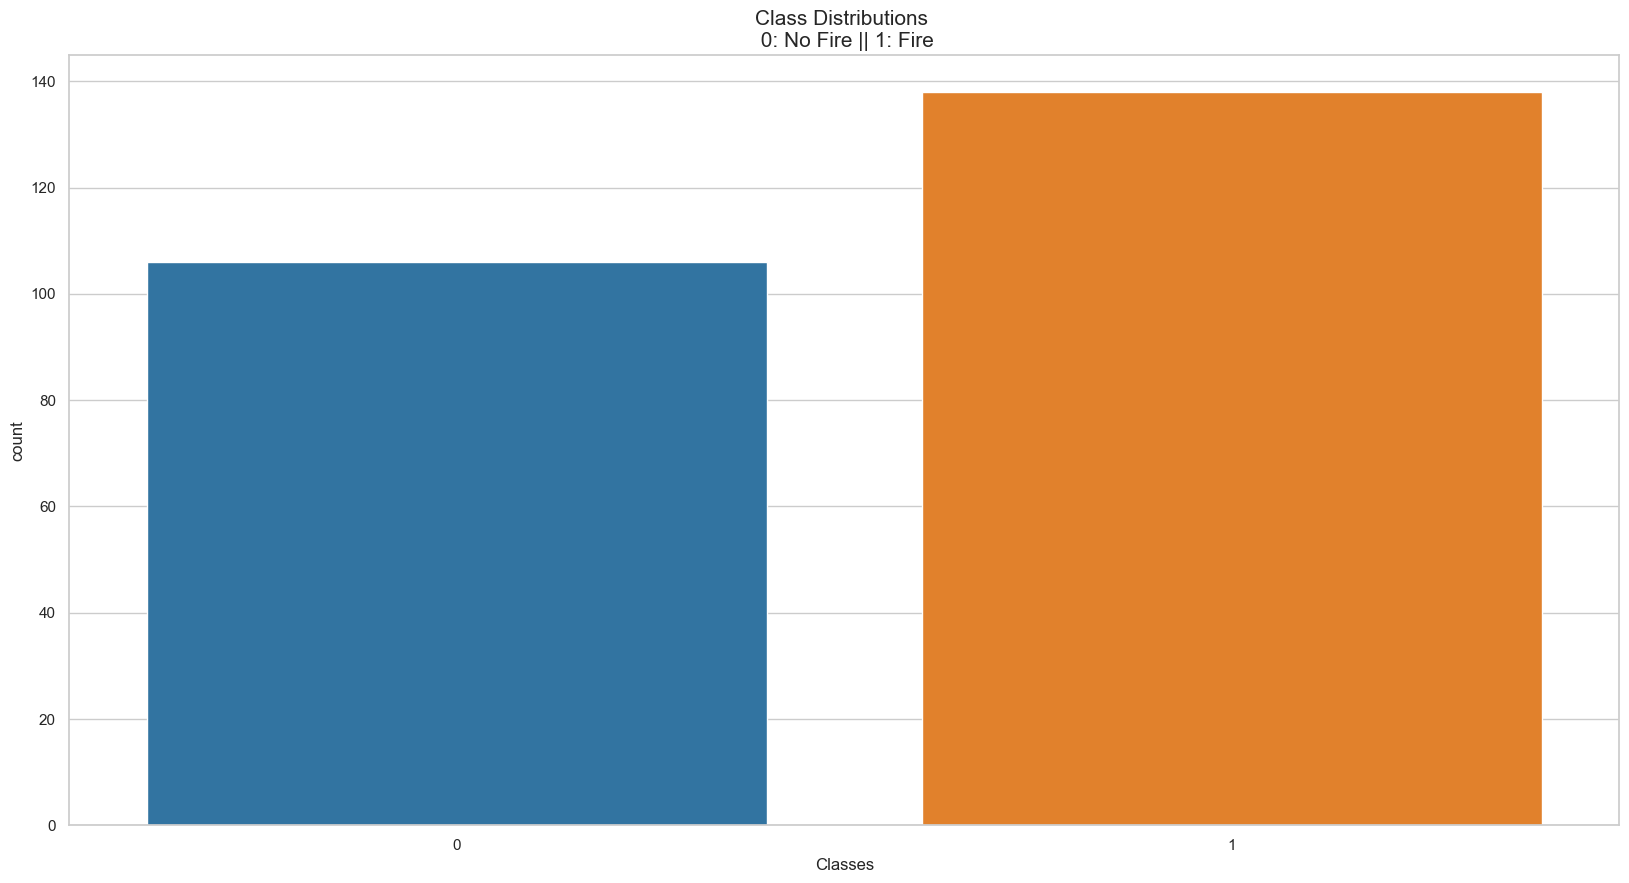

In [260]:
sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=15)

Observation :
- There are more records with 'Fire' than 'Not Fire'

Text(0.5, 1.0, 'Region Distributions \n 0: Bejaia || 1: Sidi-Bel Abbes')

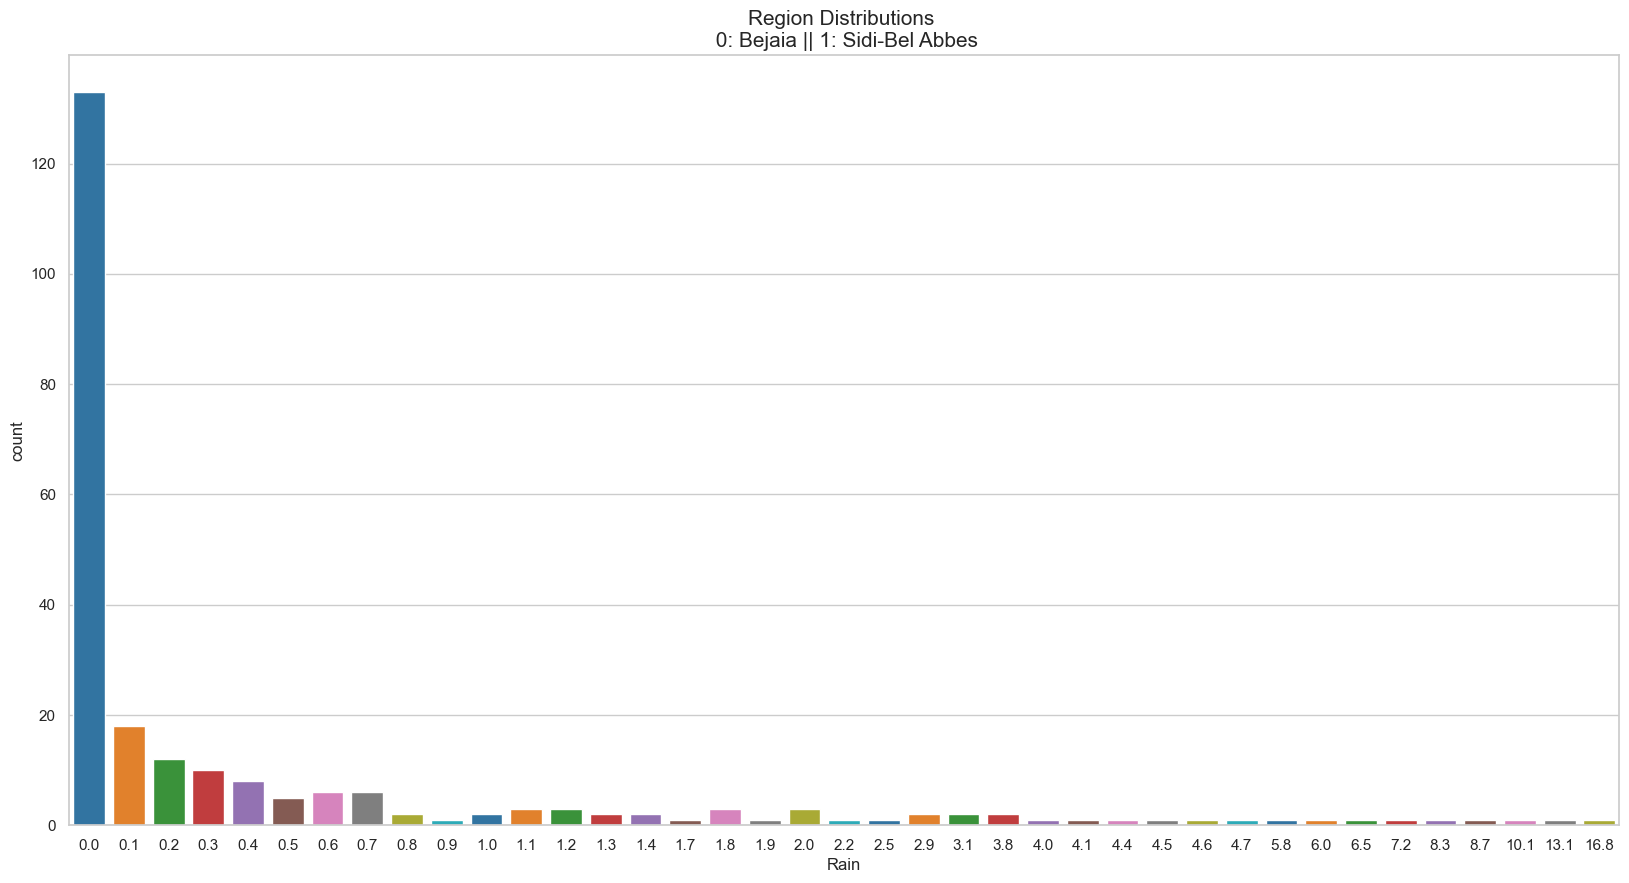

In [261]:
sns.countplot('Rain', data=df, palette="tab10")
plt.title('Region Distributions \n 0: Bejaia || 1: Sidi-Bel Abbes', fontsize=15)

Obsrvation :
- Days without 'Rain' has the maximum frequency

#### Pie Chart

Text(0.5, 1.0, 'Feature name : Classes')

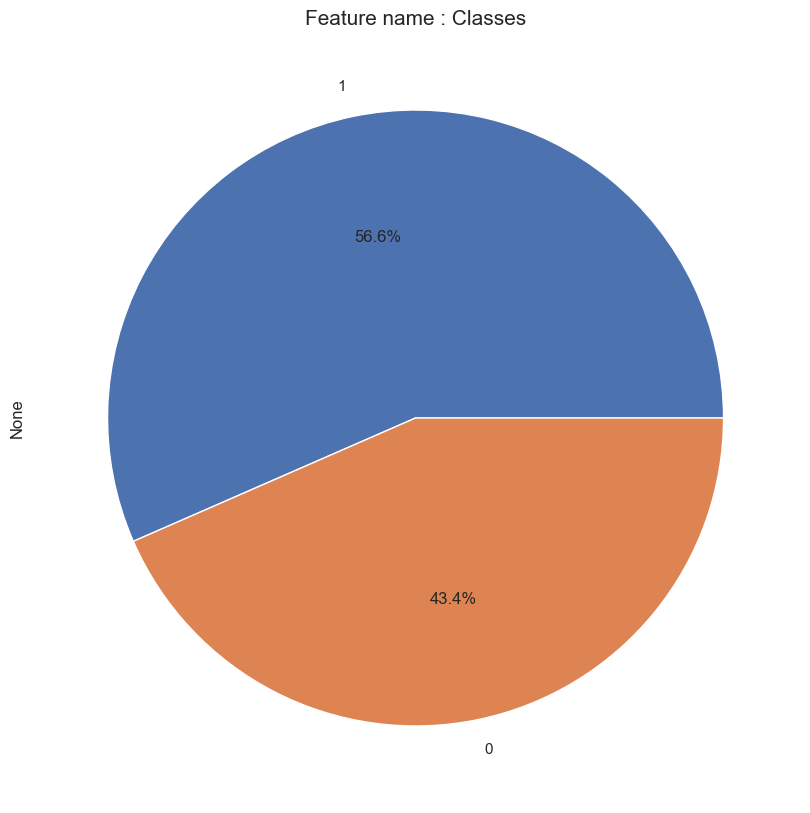

In [262]:
# plotting PieChart for target feature

df.value_counts('Classes').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Classes", fontsize = 15)

<AxesSubplot:xlabel='Temperature'>

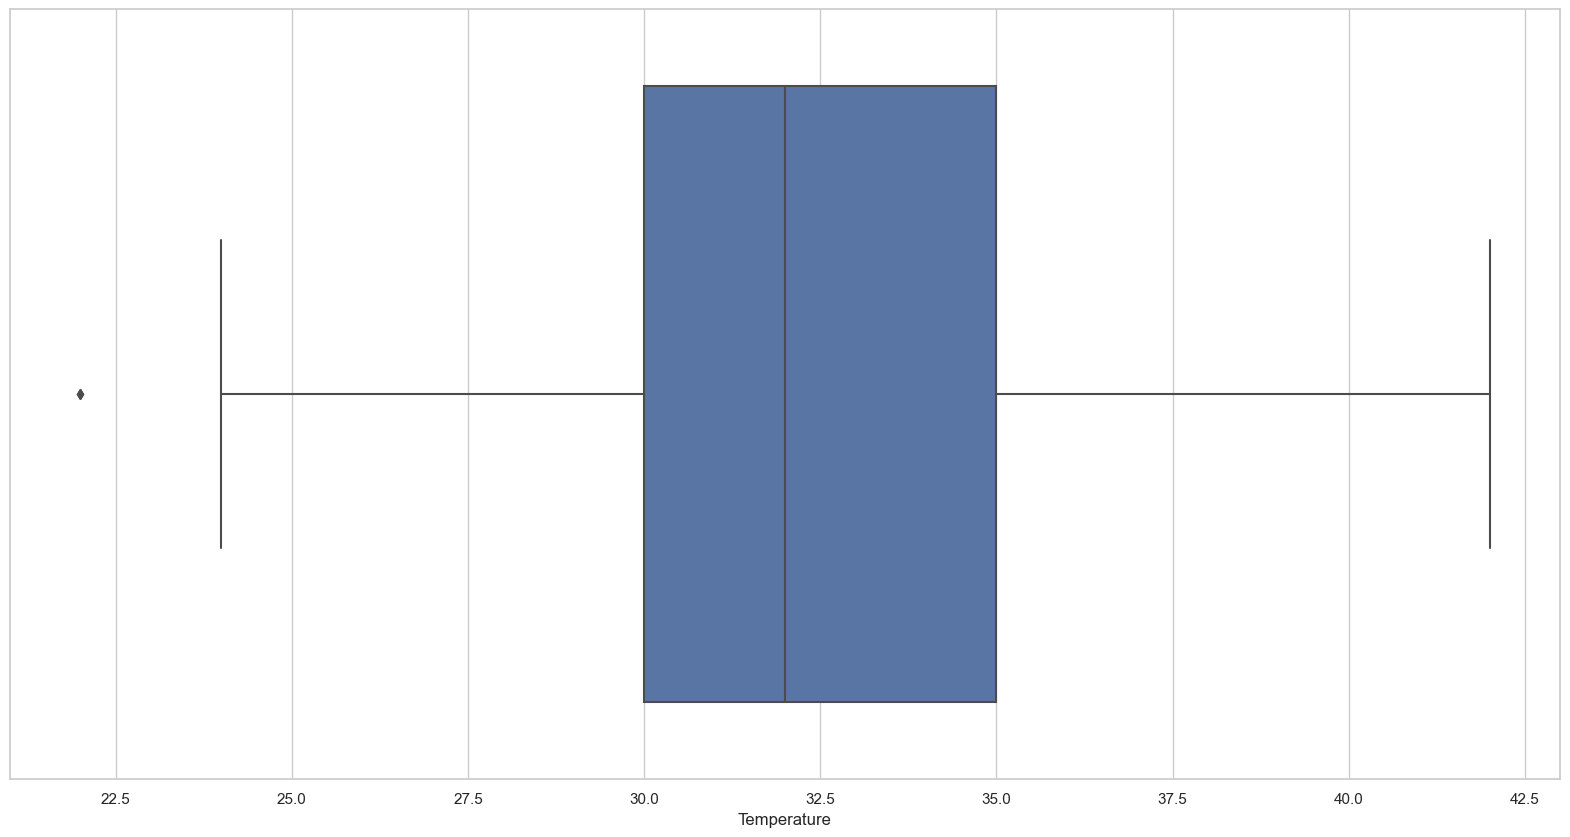

In [263]:
sns.boxplot(df['Temperature'])

#### Observation :
- There is an outlier in the lower side of the Temperature feature

<AxesSubplot:xlabel='Ws'>

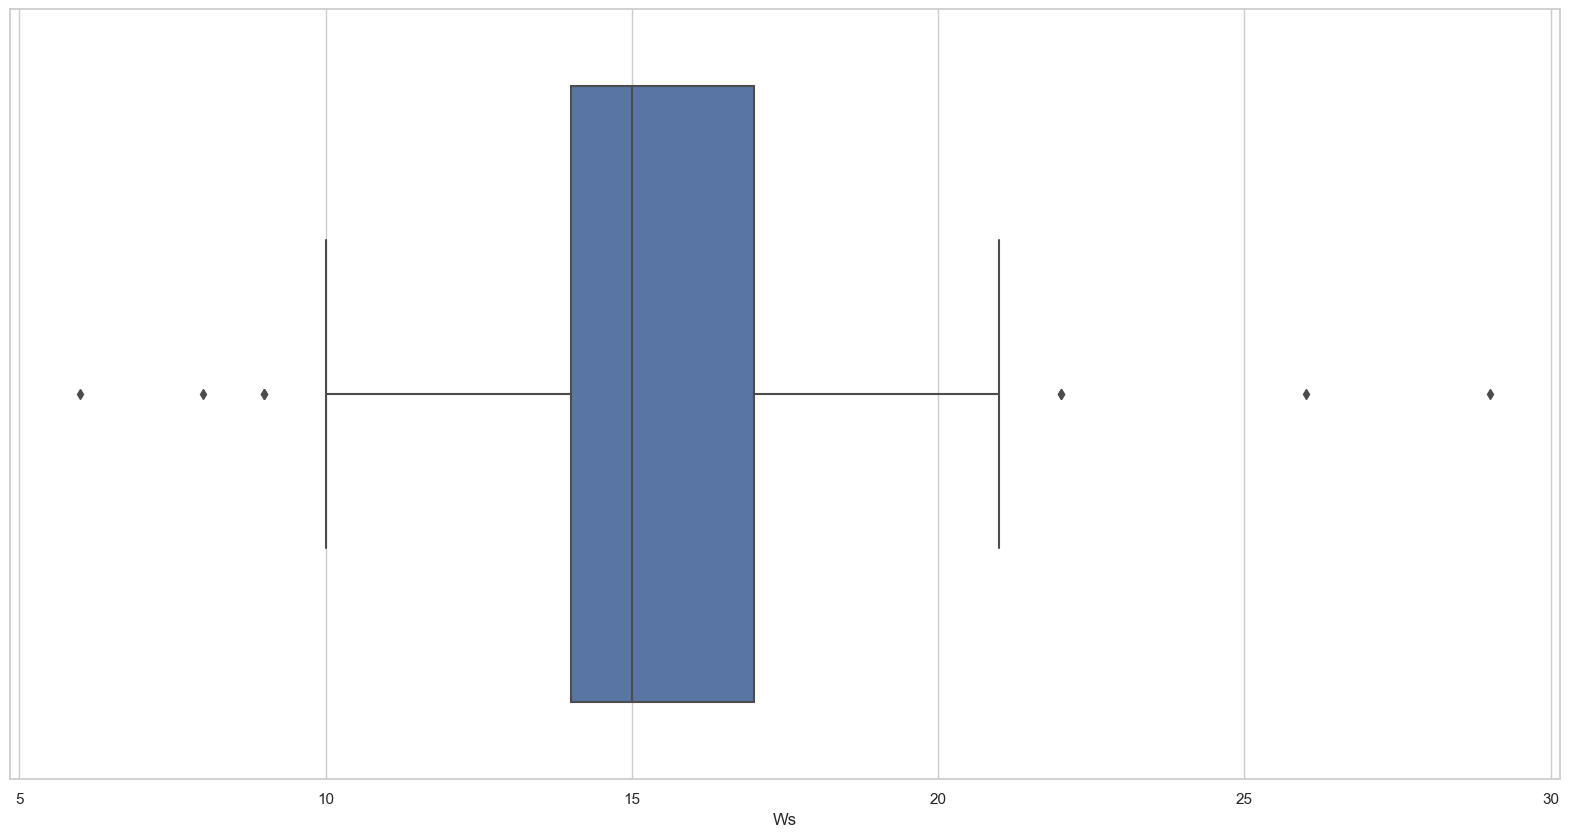

In [264]:
sns.boxplot(df['Ws'])

#### Observation :
- There are outliers in both side of the Ws feature

<AxesSubplot:xlabel='Rain'>

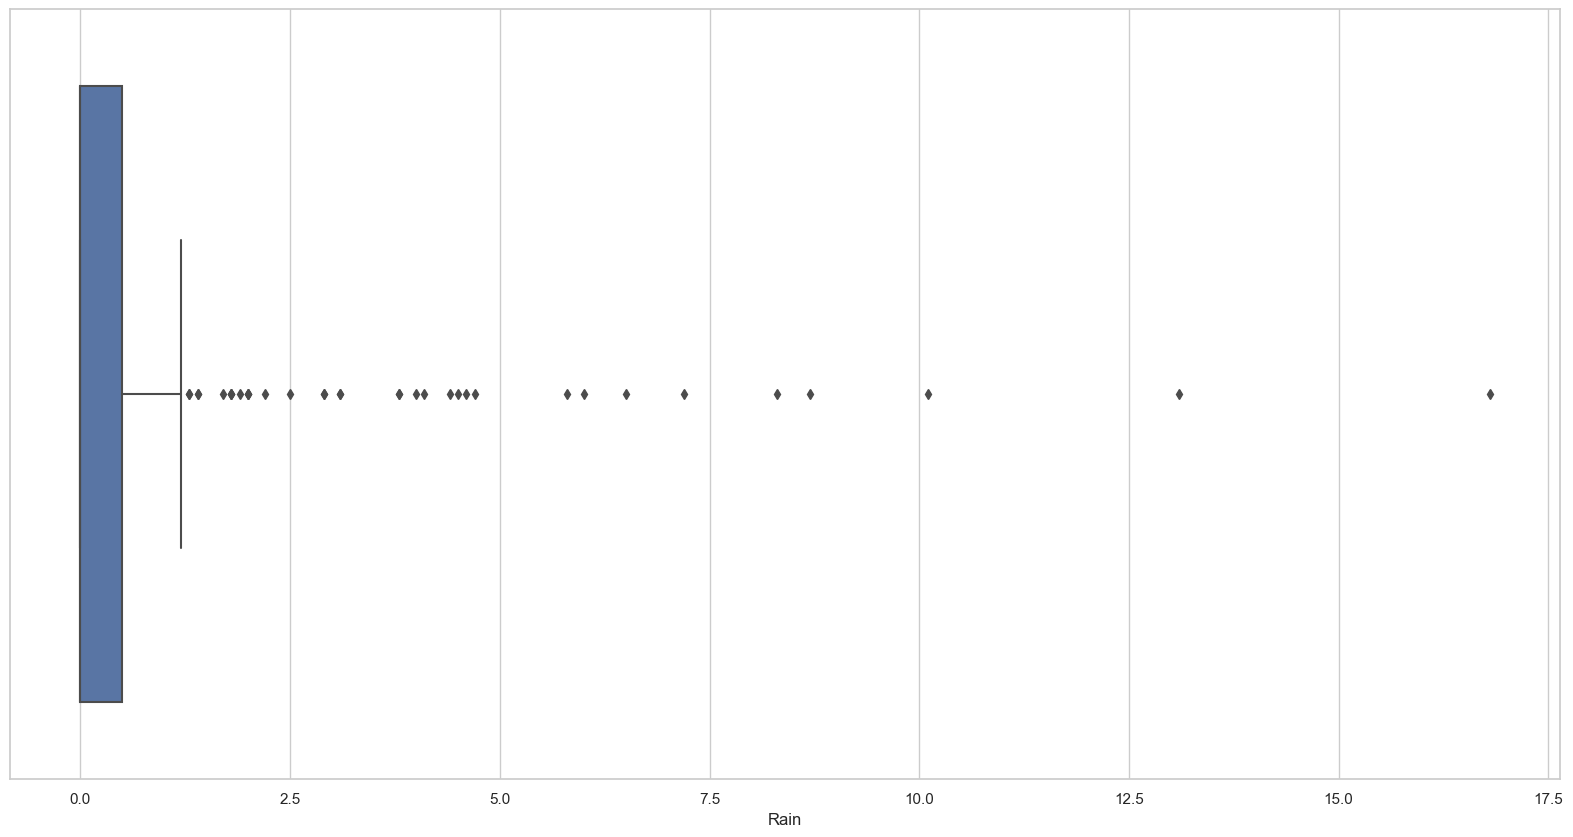

In [265]:
sns.boxplot(df['Rain'])

#### Observation :
- There are outliers in the right side of the Rain feature

<AxesSubplot:xlabel='RH'>

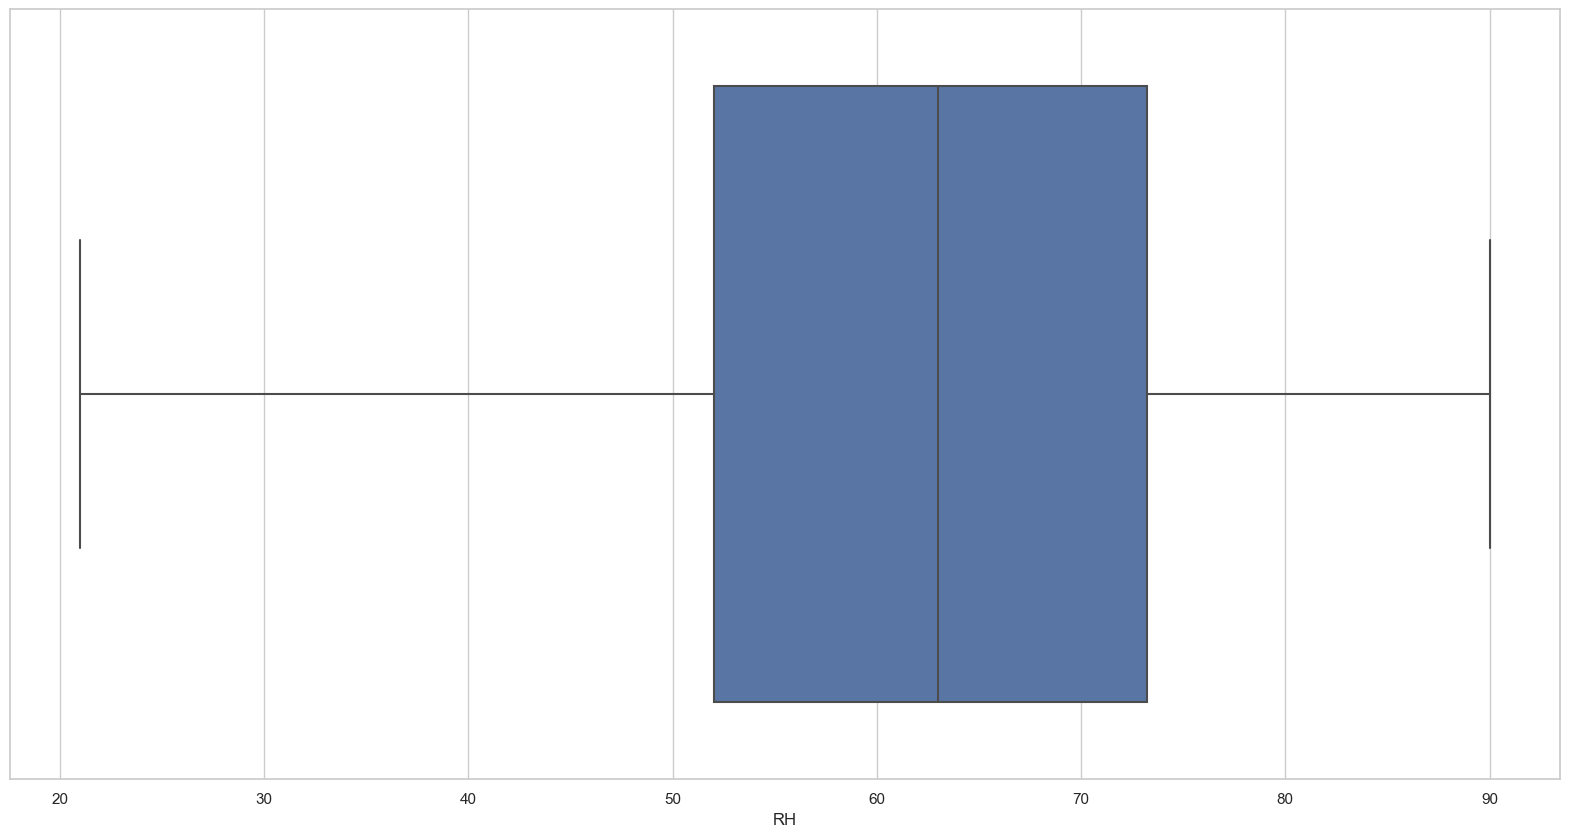

In [266]:
sns.boxplot(df['RH'])

#### Observation :
- There is no outlier in the RH feature

<AxesSubplot:xlabel='FWI'>

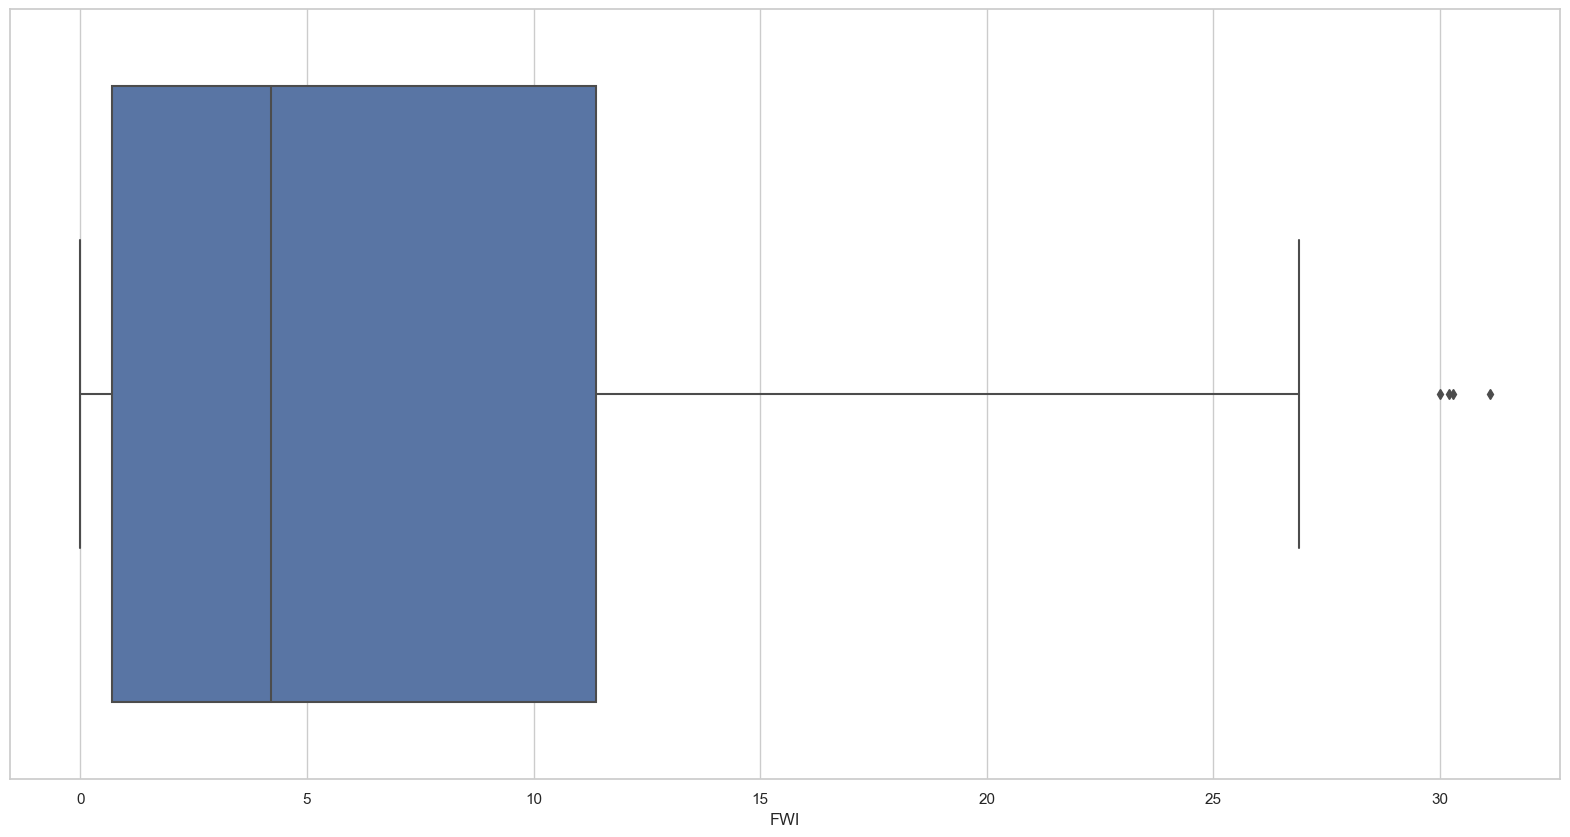

In [267]:
sns.boxplot(df['FWI'])

#### Observation :
- There are outliers in right side of the FWI feature

<AxesSubplot:xlabel='ISI'>

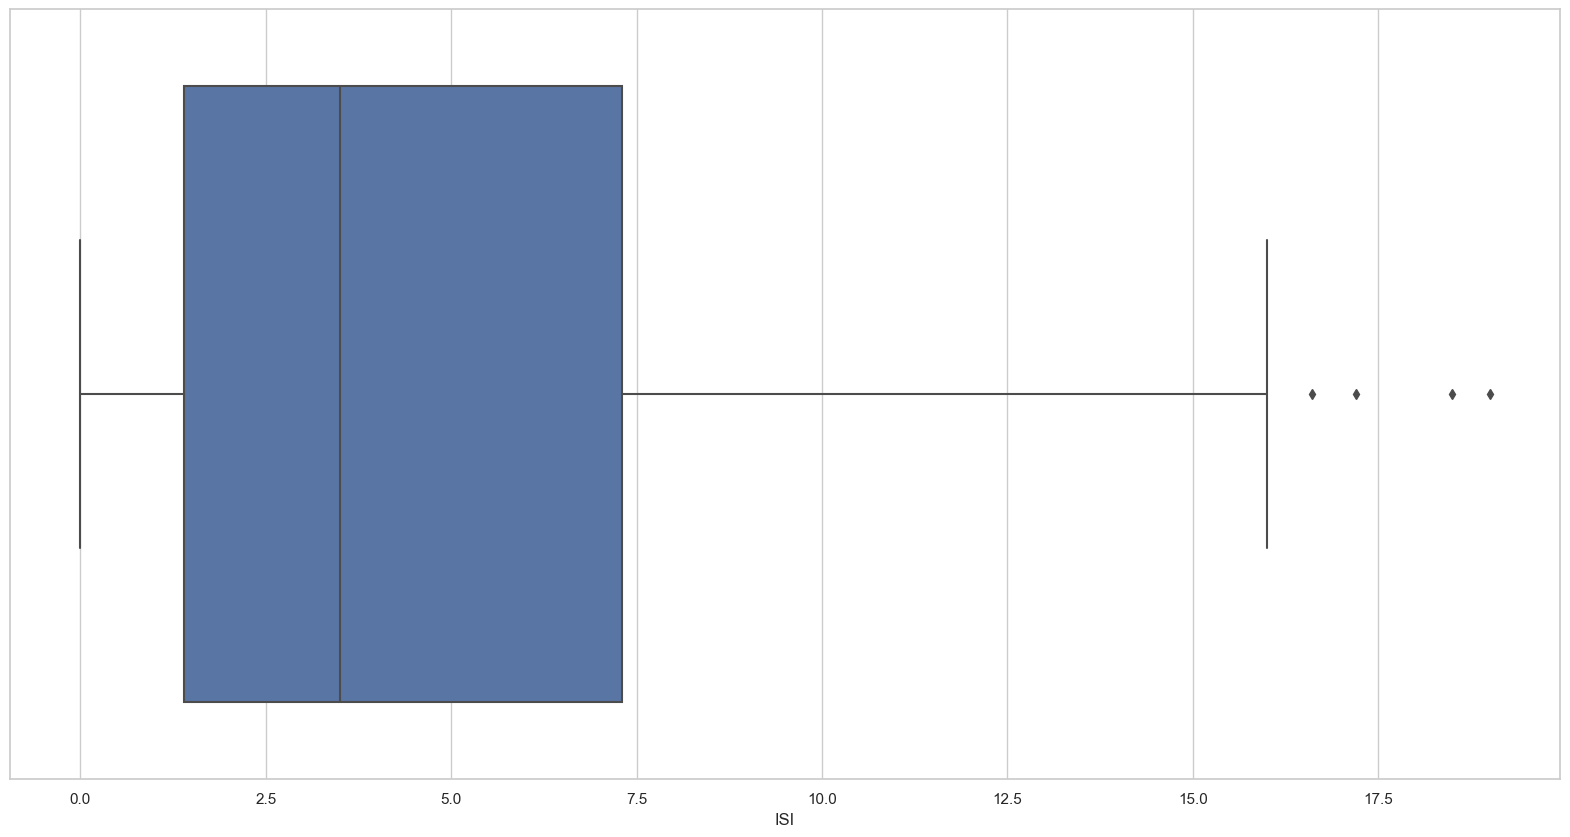

In [268]:
sns.boxplot(df['ISI'])

#### Observation :
- There are outliers in the right side of the ISI feature

In [269]:
df.var()

day              77.881670
month             1.238683
year              0.000000
Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.433281
BUI             201.777024
FWI              55.337076
Classes           0.246711
region            0.251029
dtype: float64

#### Numerical Feature Analysis

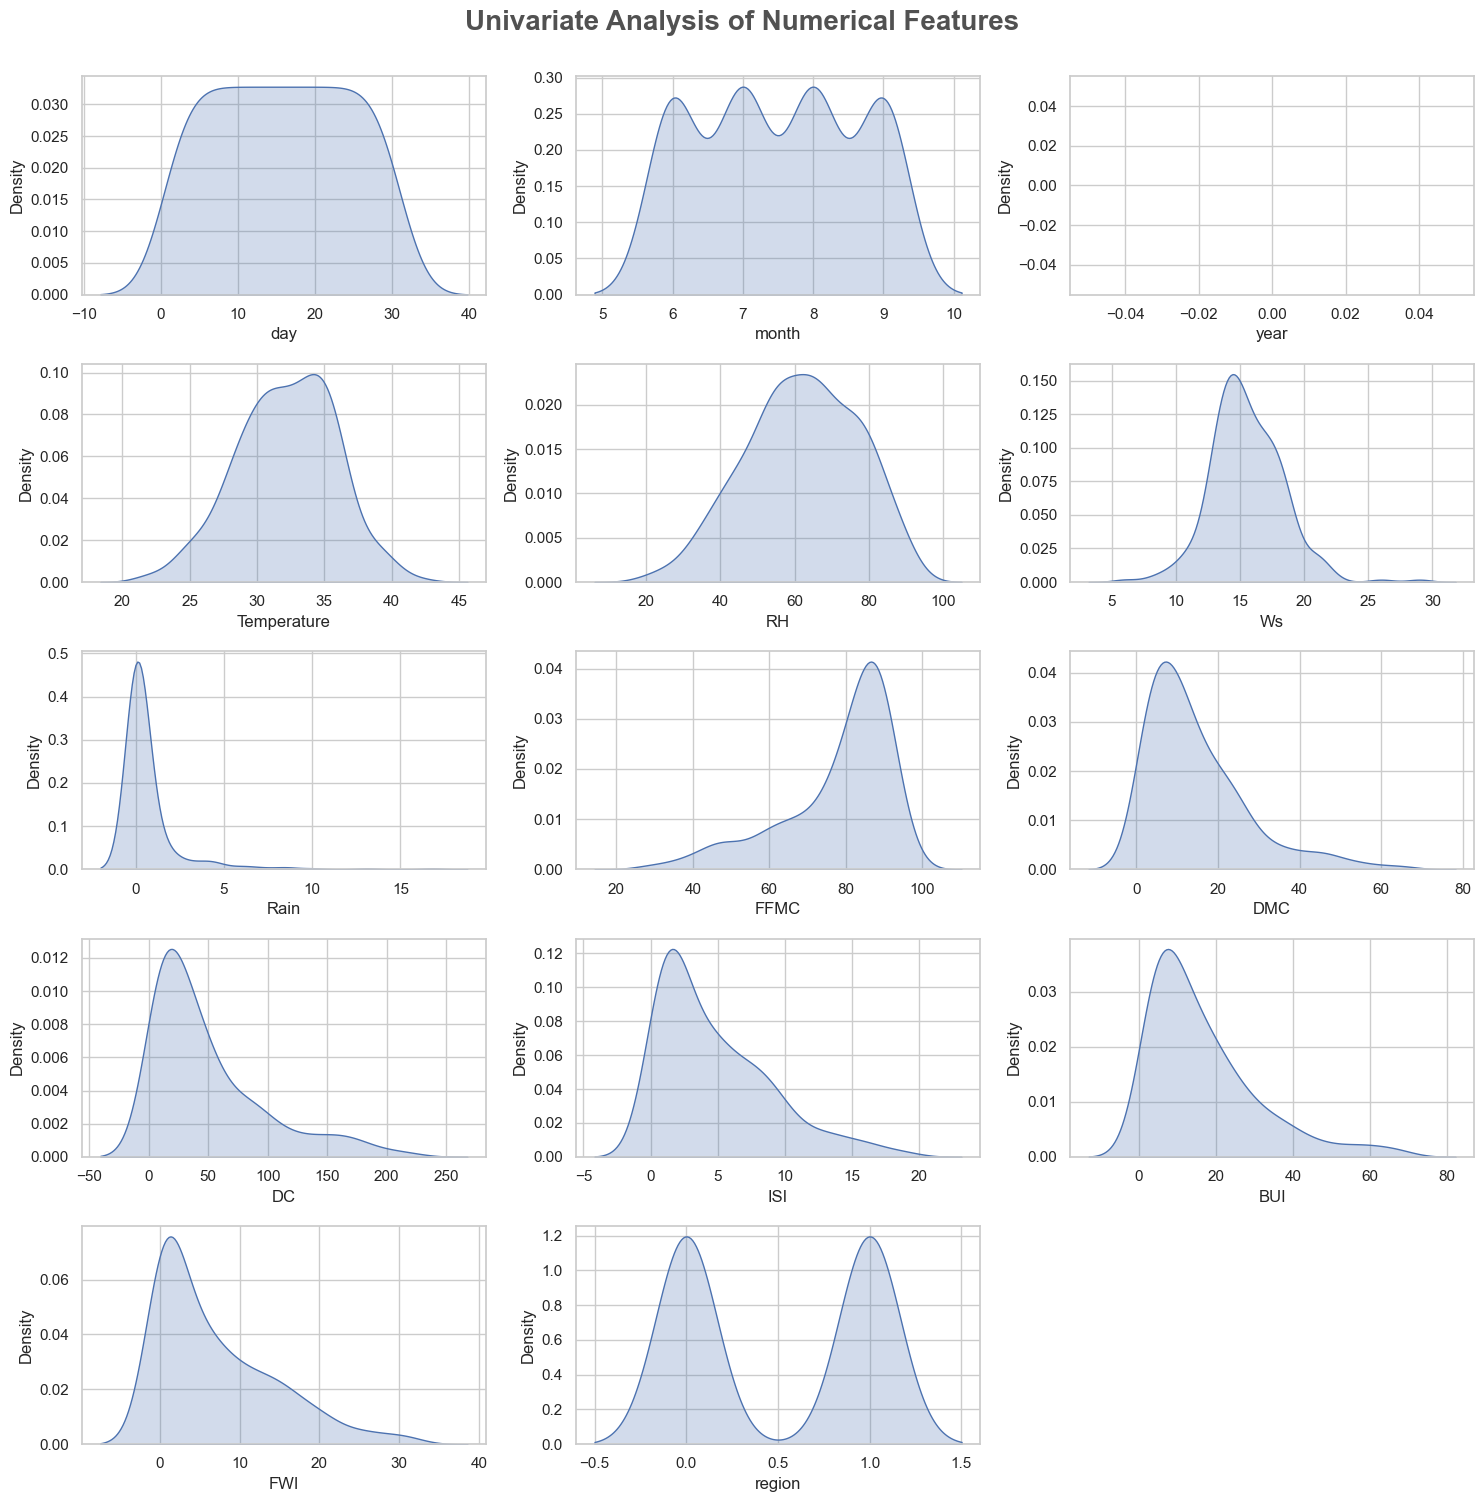

In [270]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[col_num[i]], shade=True, color='b')
    plt.xlabel(col_num[i])
    plt.tight_layout()

#### Observations :
- Rain, DMC, DC, ISI, BUI, FWI are Right Skewed or Positively Skewed.
- FFMC is Left Skewed or Negatively Skewed.
- Ws is slightly Right Skewed
- RH is slightly Left skewed
- In Rain, FMCC, DMC, DC, ISI, FWI features there are more outliers

#### Boxplot & kde

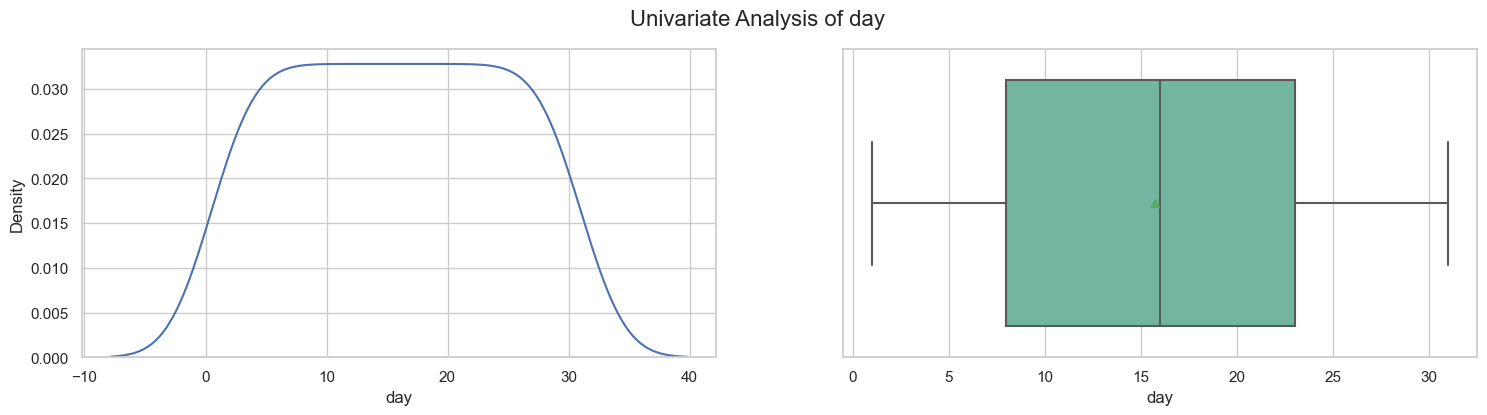

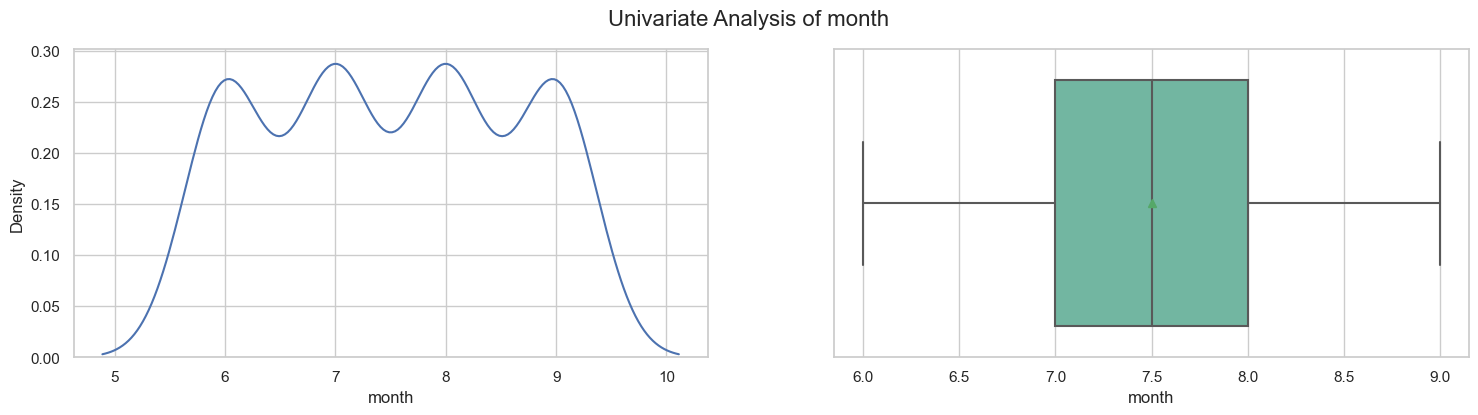

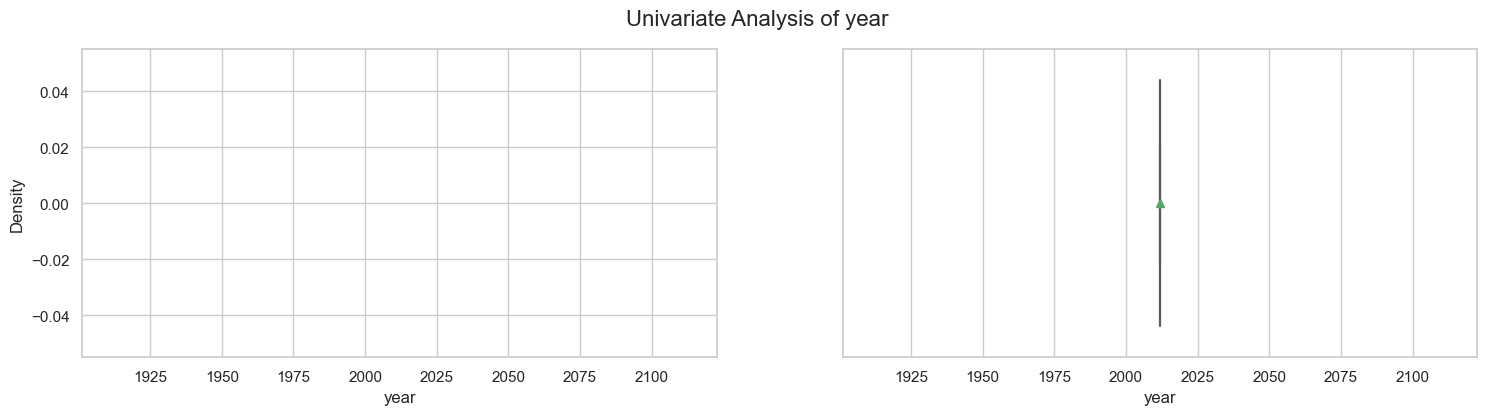

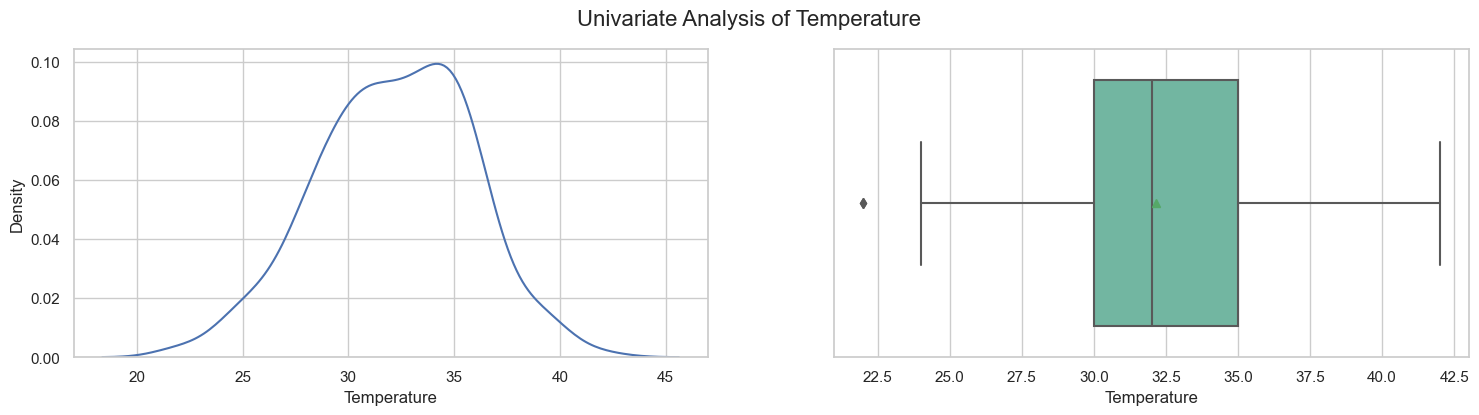

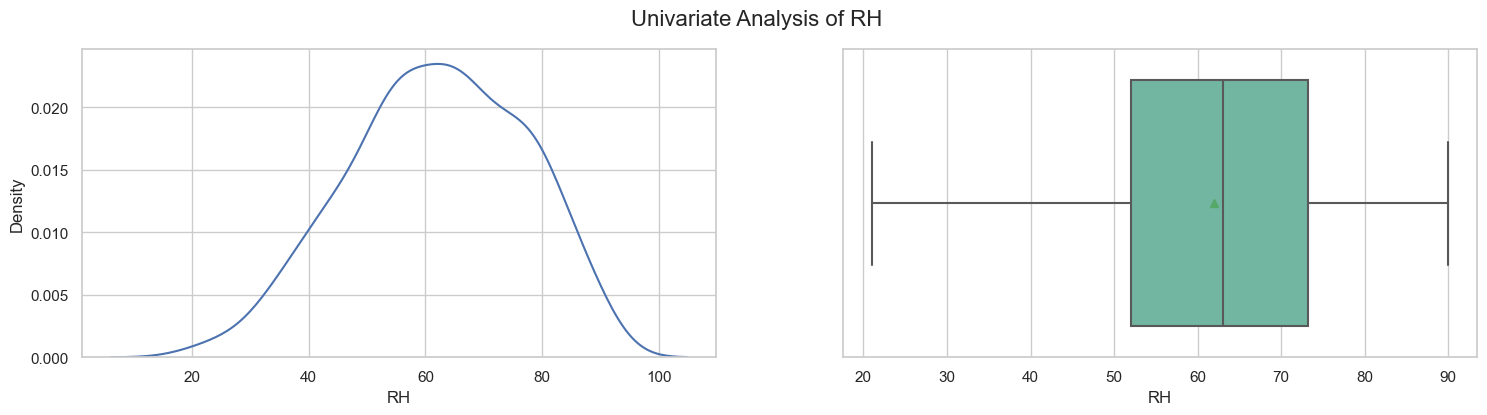

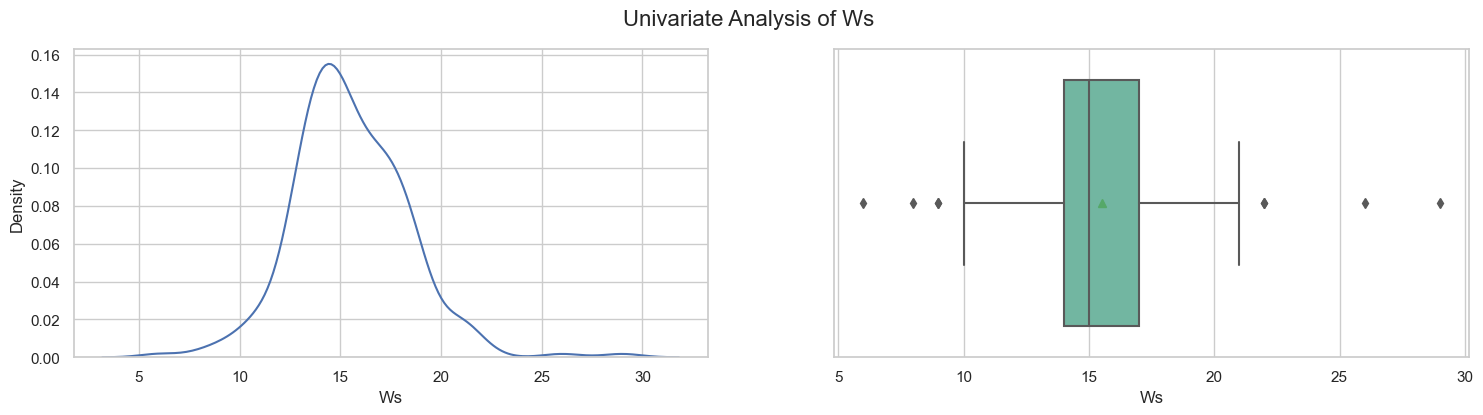

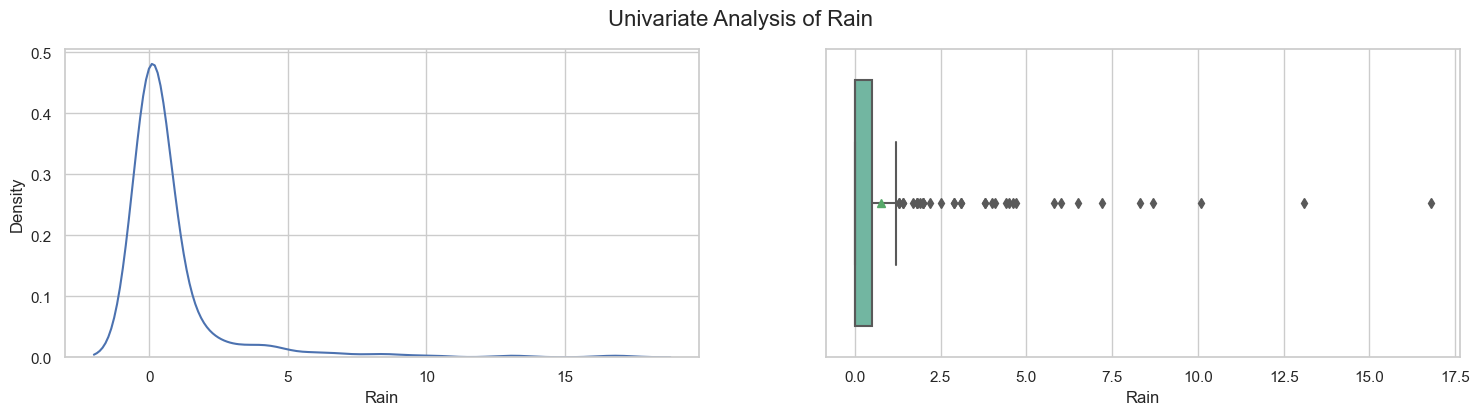

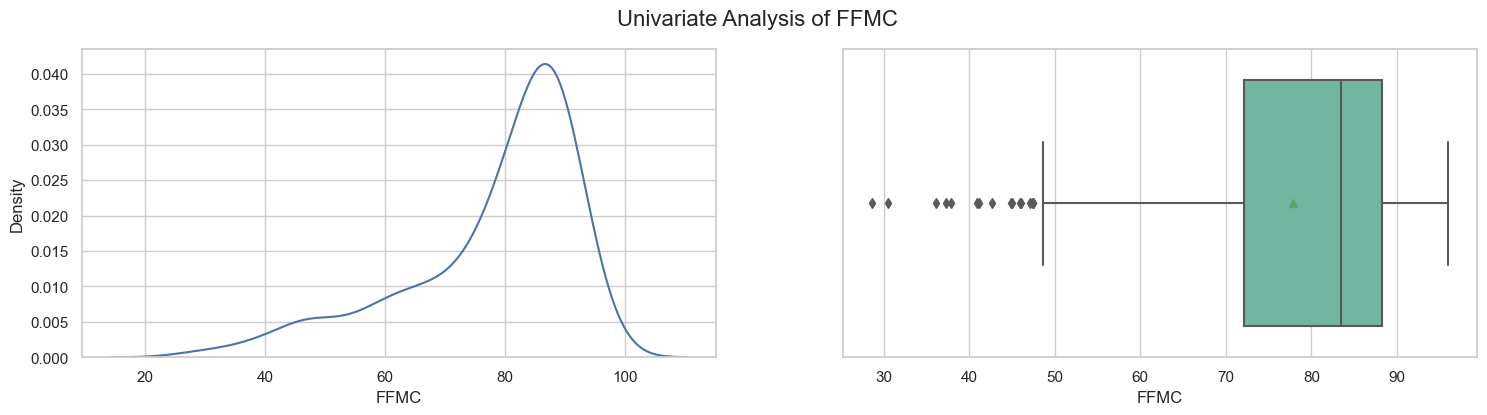

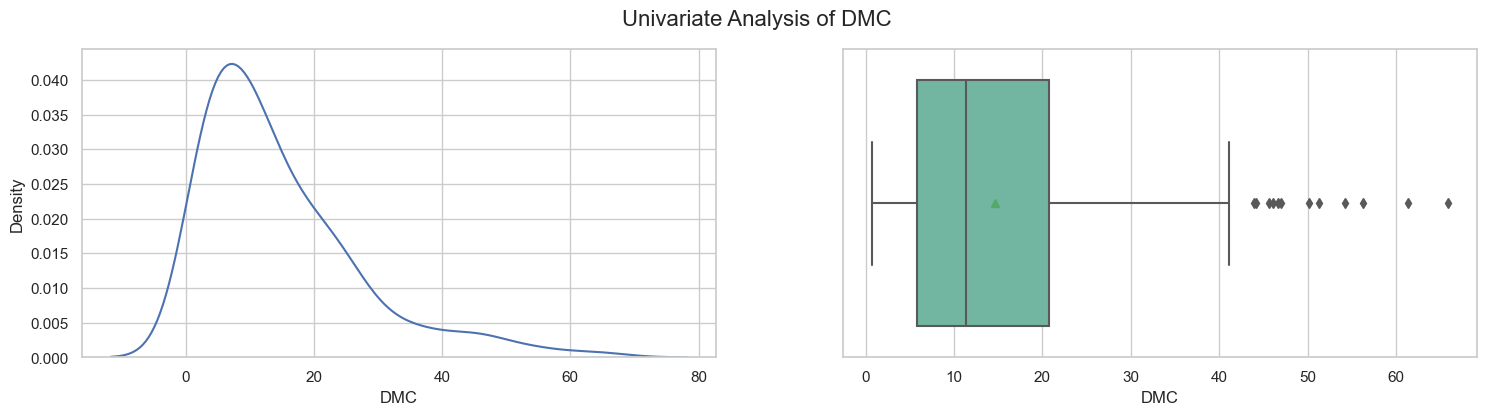

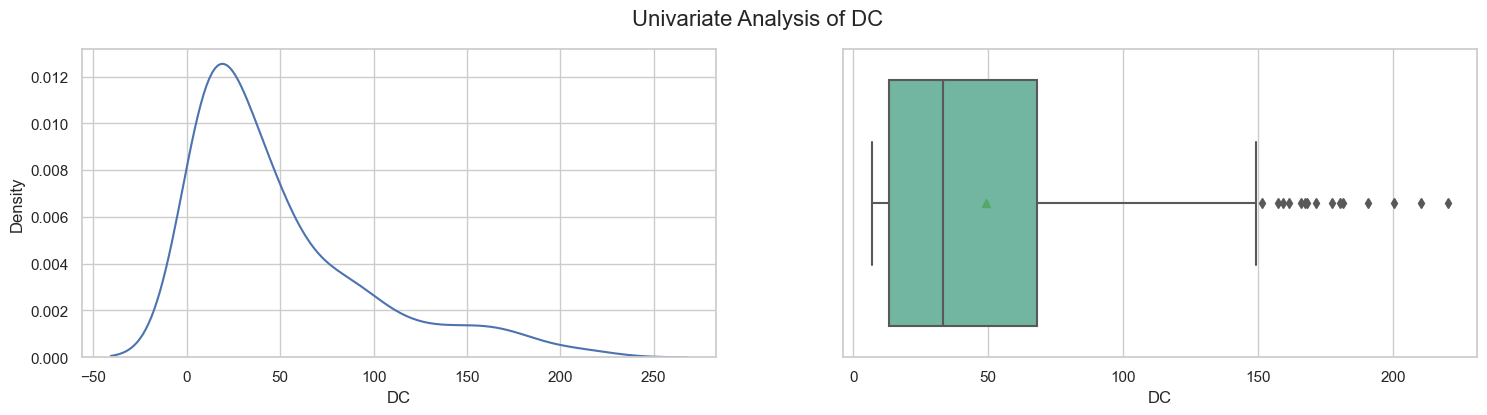

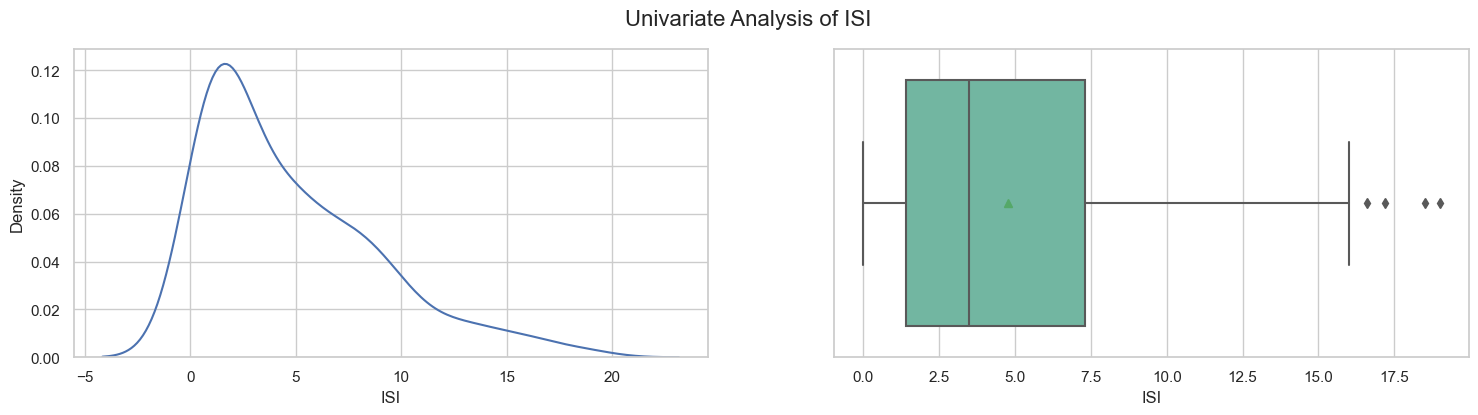

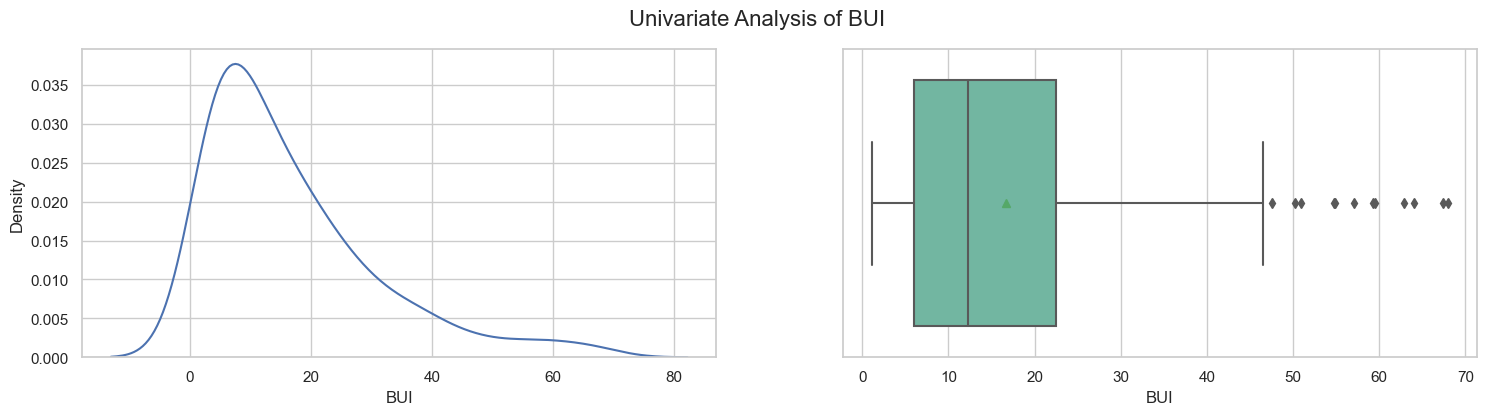

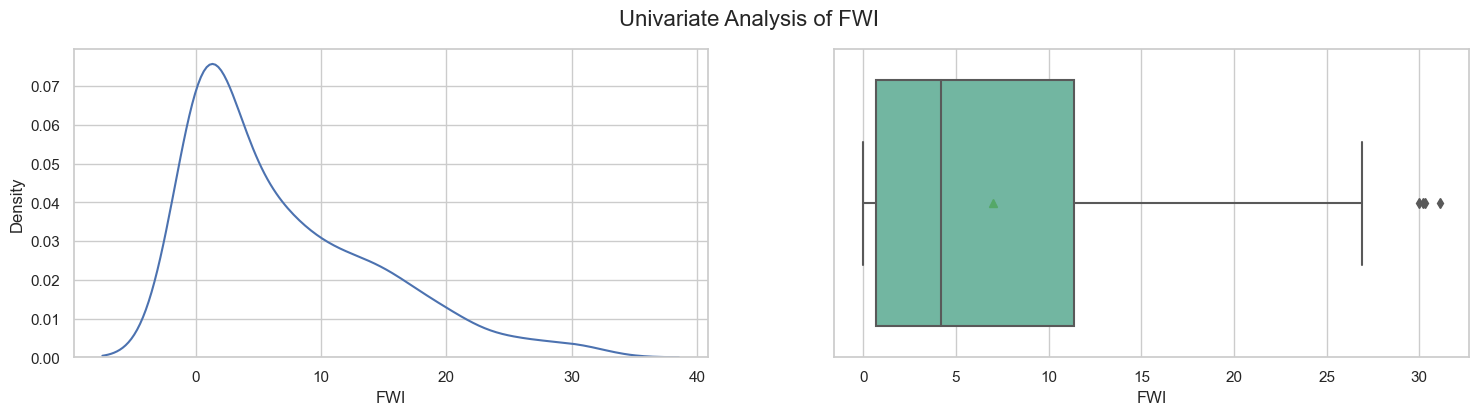

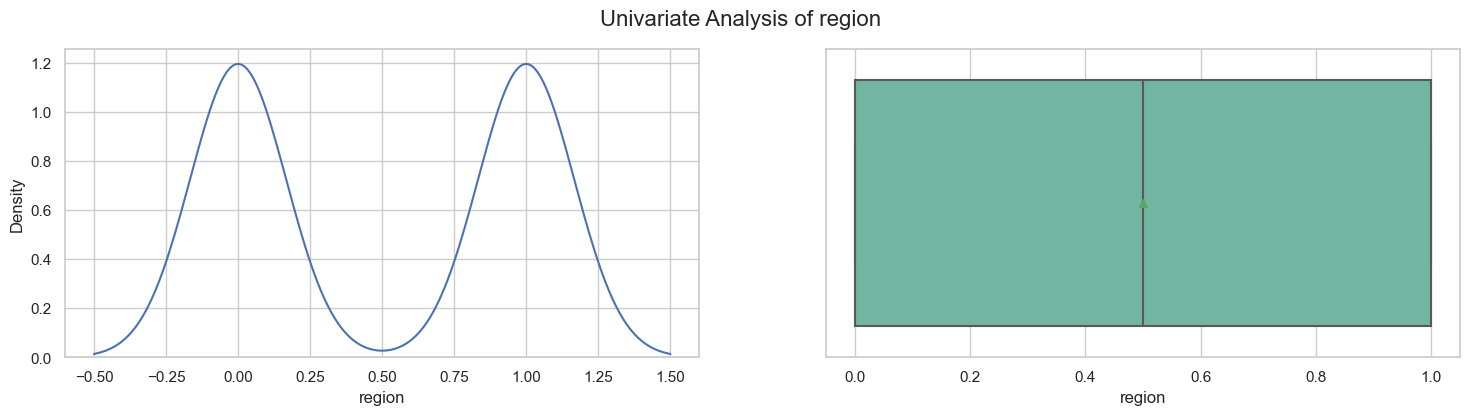

In [271]:
x_axis = col_num
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df[x], ax=axes[0], kde = True, hist=False)
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True,palette="Set2")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

##### Observations
- Index shows approxmately normal distribution and  has no outliers.
- Temperature shows  normal distribution and  has a outlier in left.
- RH shows  normal distribution but we need to concern that it is slightly skewed to left and  has no outliers.
- Ws shows approxmately normal distribution but  has a outliers in both side.
- Rain shows  right skewed distribution and  has a outlier in right.
- FFMC shows  Left skewed distribution and  has a outlier in left.
- DMC shows  right skewed distribution and  has a outlier in right.
- DC shows  right skewed distribution and  has a outlier in right.
- ISI shows approxmately right skewed distribution and  has a outlier in right.
- BUI shows approxmately right skewed distribution and  has a outlier in right.
- FWI shows right skewed distribution and  has a outlier in right.

### Scatter plot to see the trend in each numerical columns

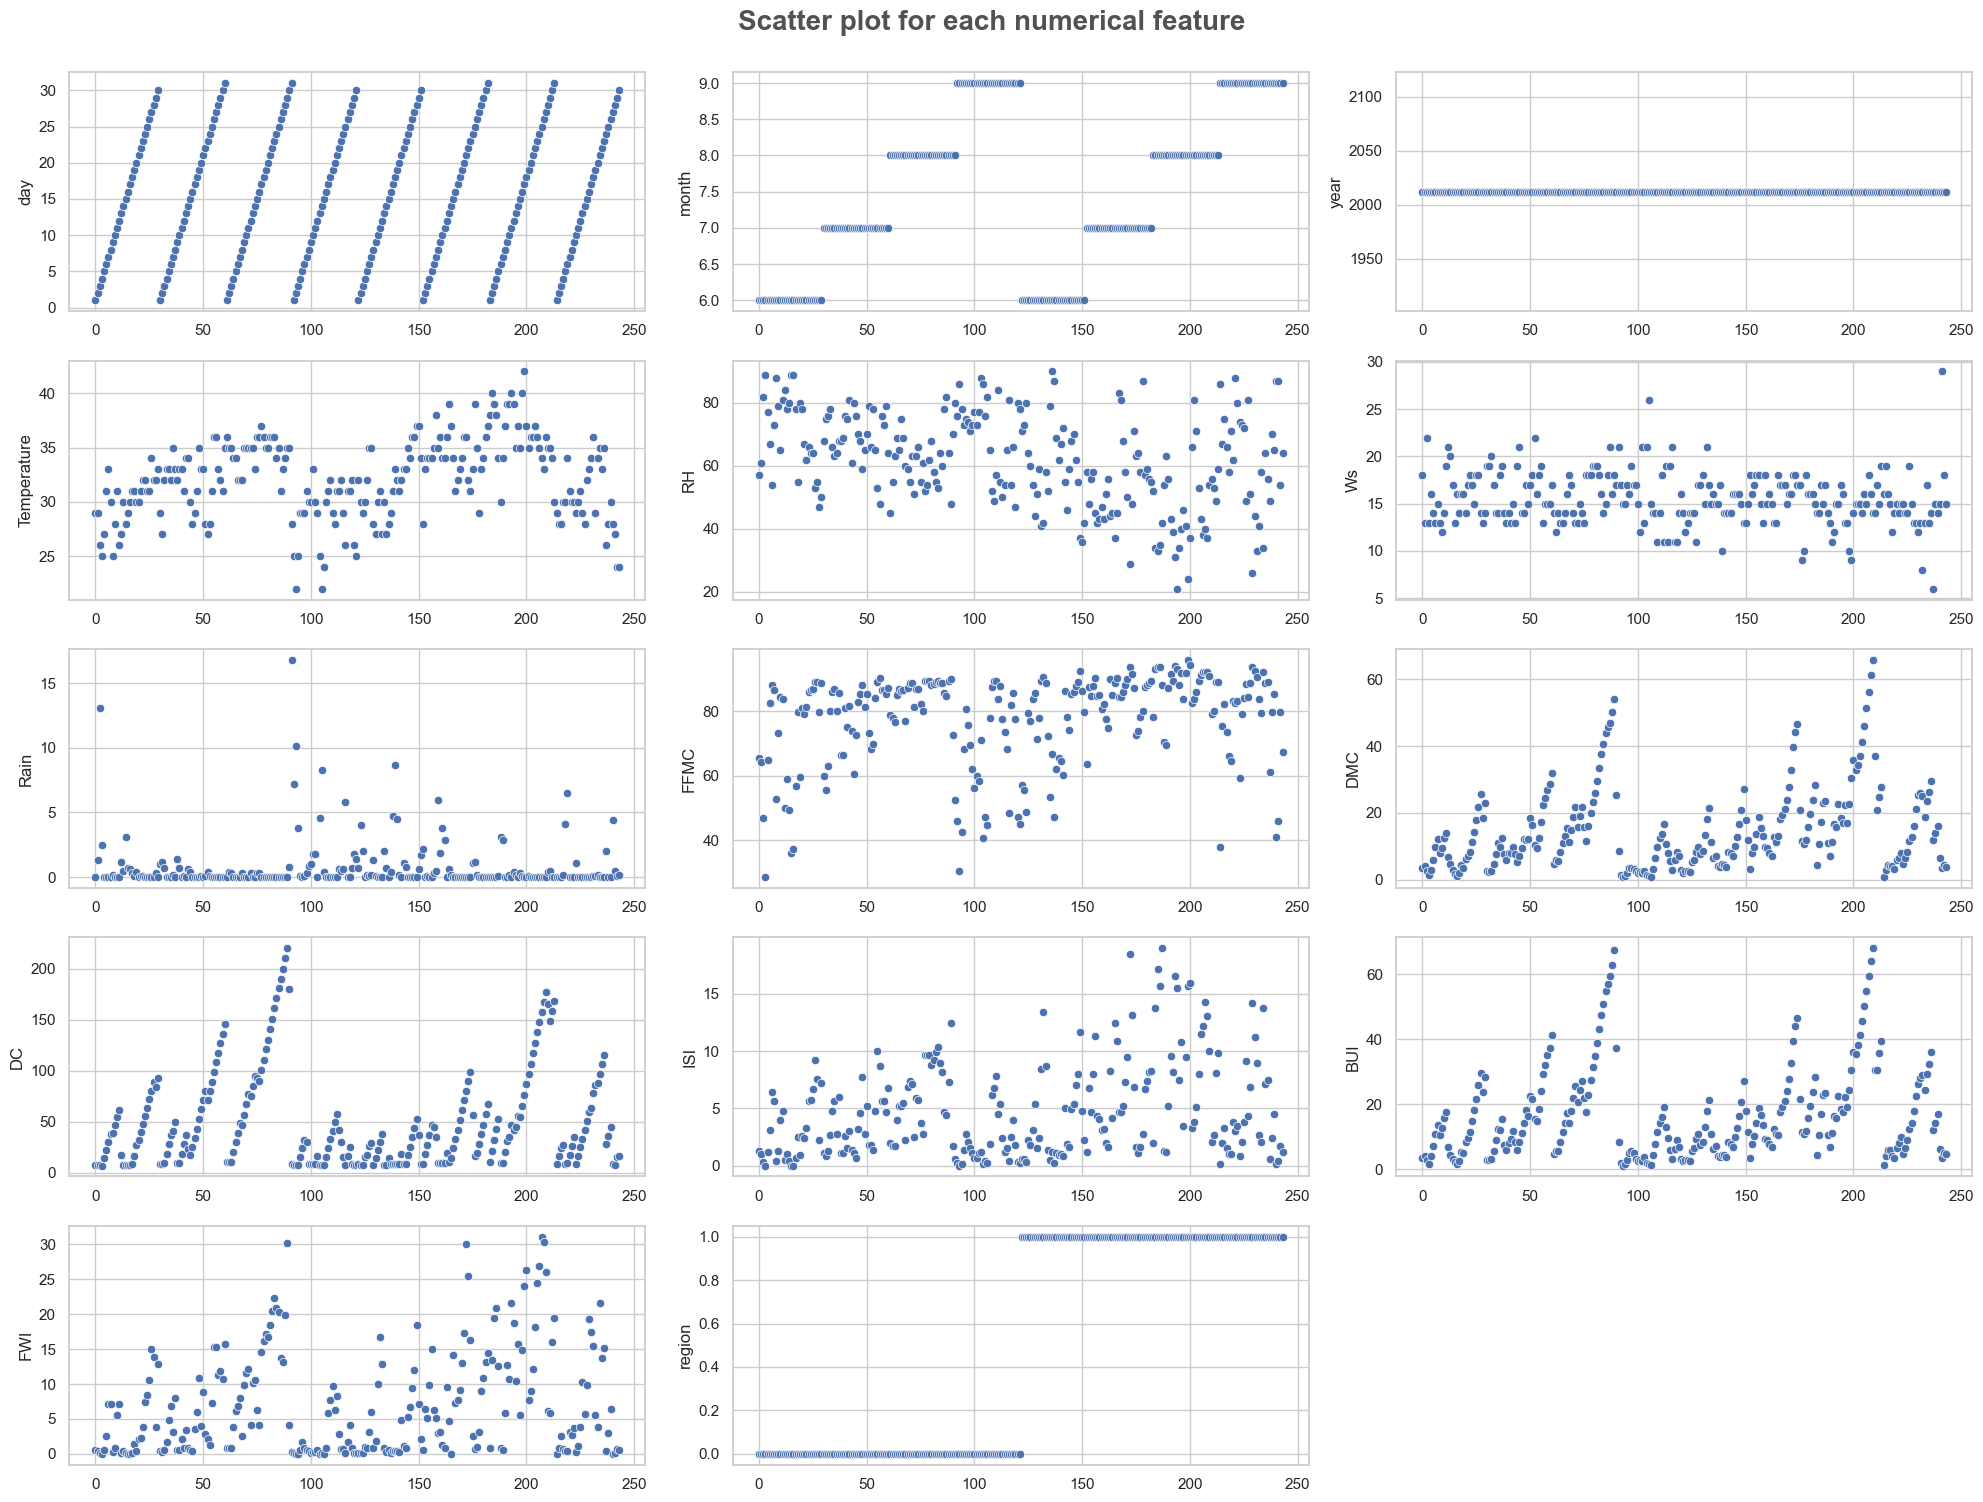

In [272]:
plt.figure(figsize=(20,15))
plt.suptitle('Scatter plot for each numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=col_num[i], x=df.index, data=df)
    plt.tight_layout()

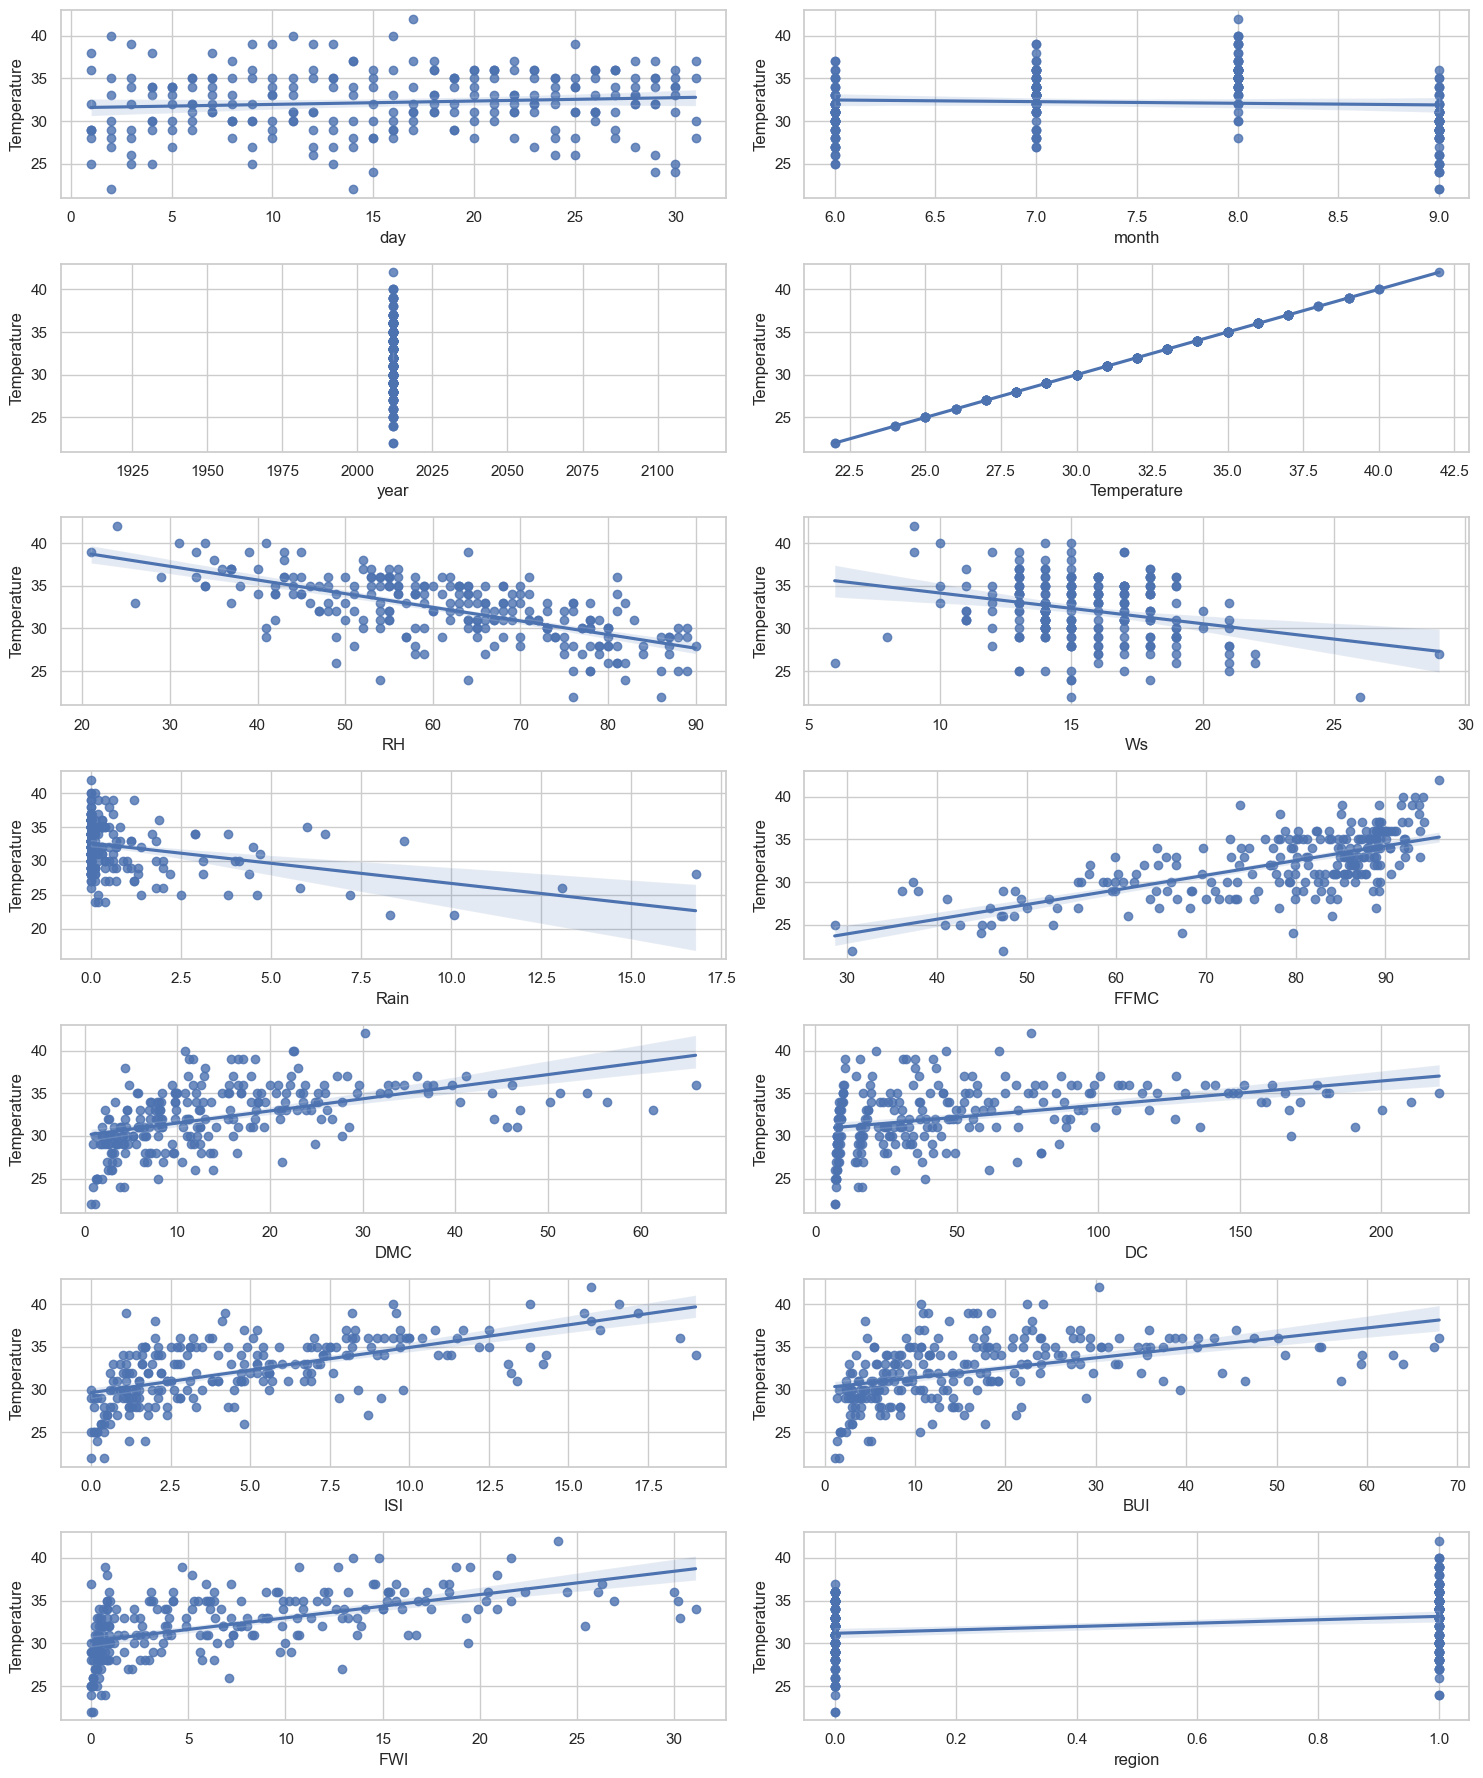

In [273]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(col_num)):
    ax = plt.subplot(8, 2, i+1)

    sns.regplot(data= df ,y='Temperature', x=col_num[i], color='b')
    
    plt.tight_layout()

##### Observations
- RH shows negative correlation with Temperature as increase in RH reduces the Temperature.
- WS shows weak negative correlation with Temperature.
- FFMC shows strong positive correlation as Temperature increases with FFMC.
- ISI shows positive correlation with Temperature.

#### Categorical Features

In [274]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI', 'Classes']
for i in range(0, len(col_cat)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_new[col_cat[i]])
    plt.xlabel(col_cat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Figure size 2000x1500 with 0 Axes>

## Bivariate Analysis
- Bivariate analysis is the analysis of two variables to find out relationship between them.

##### Line plot

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

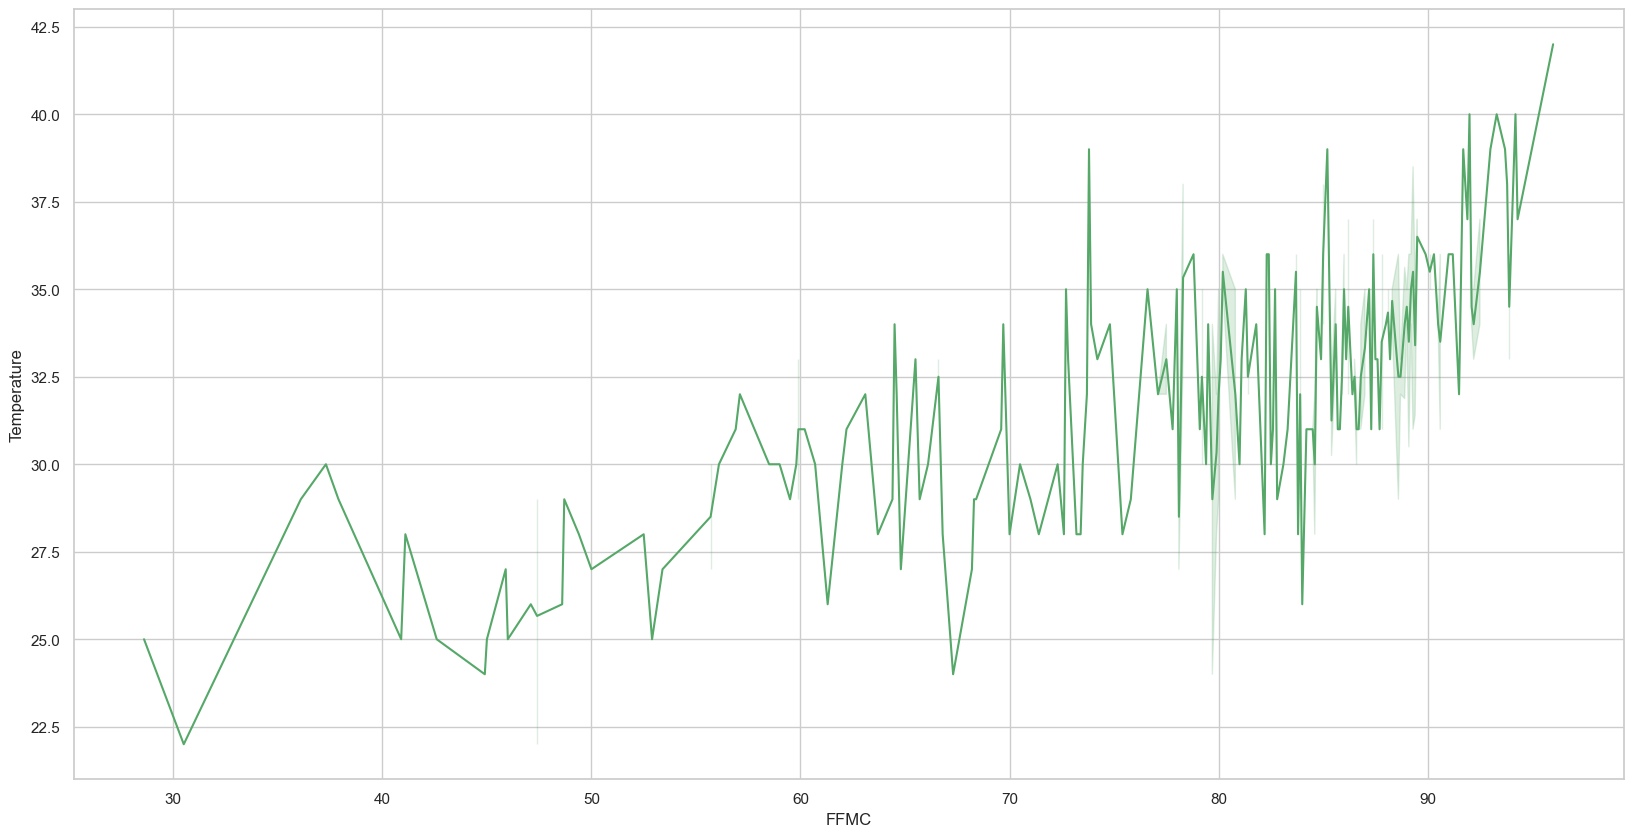

In [275]:
sns.lineplot(x='FFMC', y='Temperature', data=df, color='g')

Observation :
- There is a positive correlation between Temperature and FMCC

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

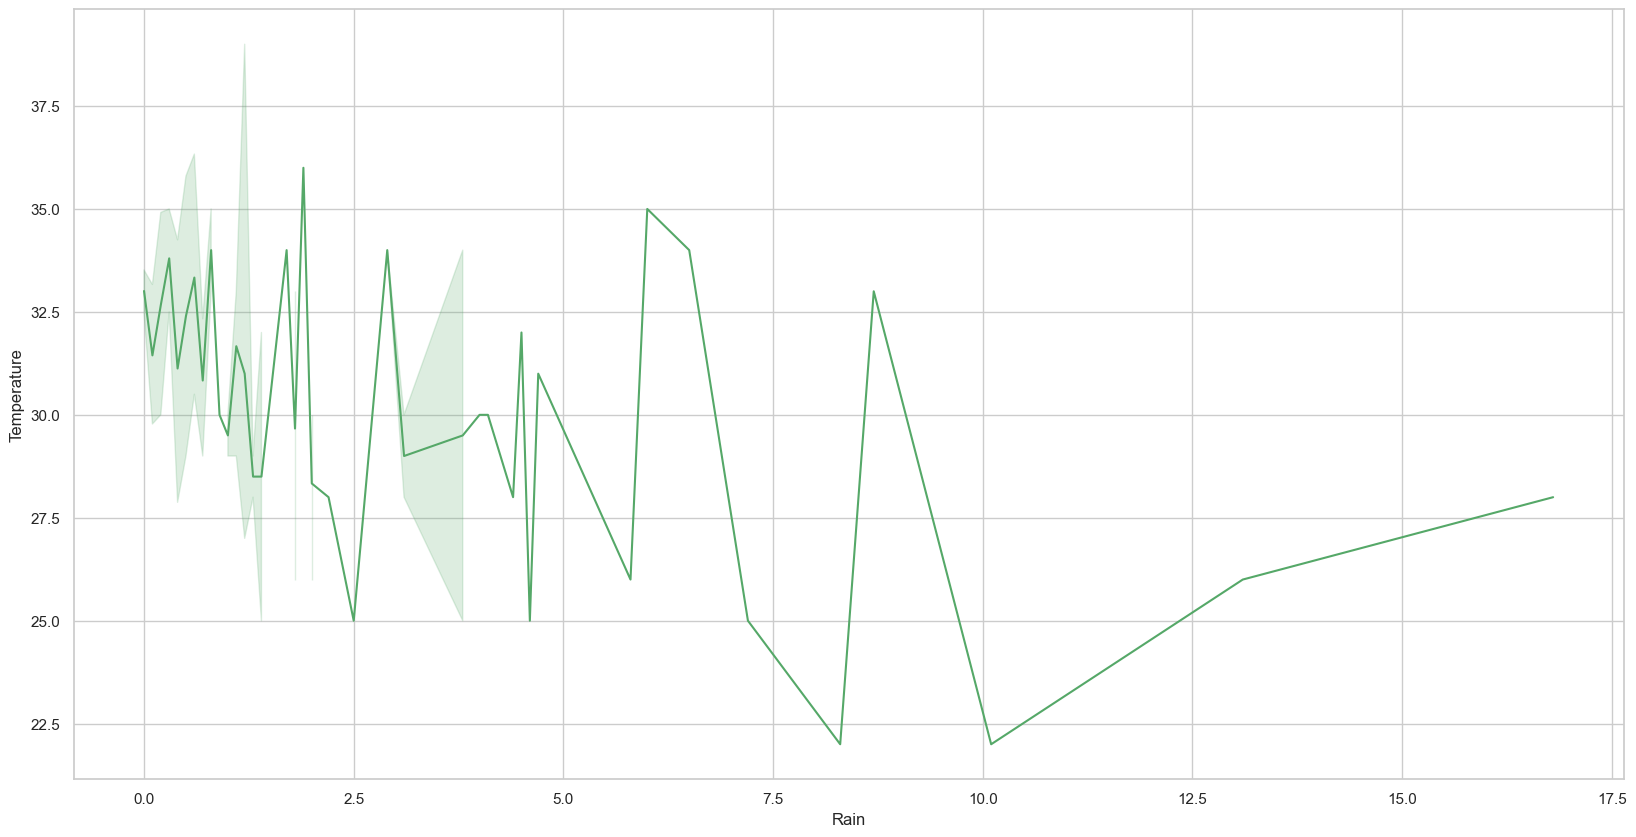

In [276]:
sns.lineplot(x='Rain', y='Temperature', data=df, color='g')

#### Observation :
There is a negative correlation in between Temperature and Rain

### Q-Q plot
To see features distribution

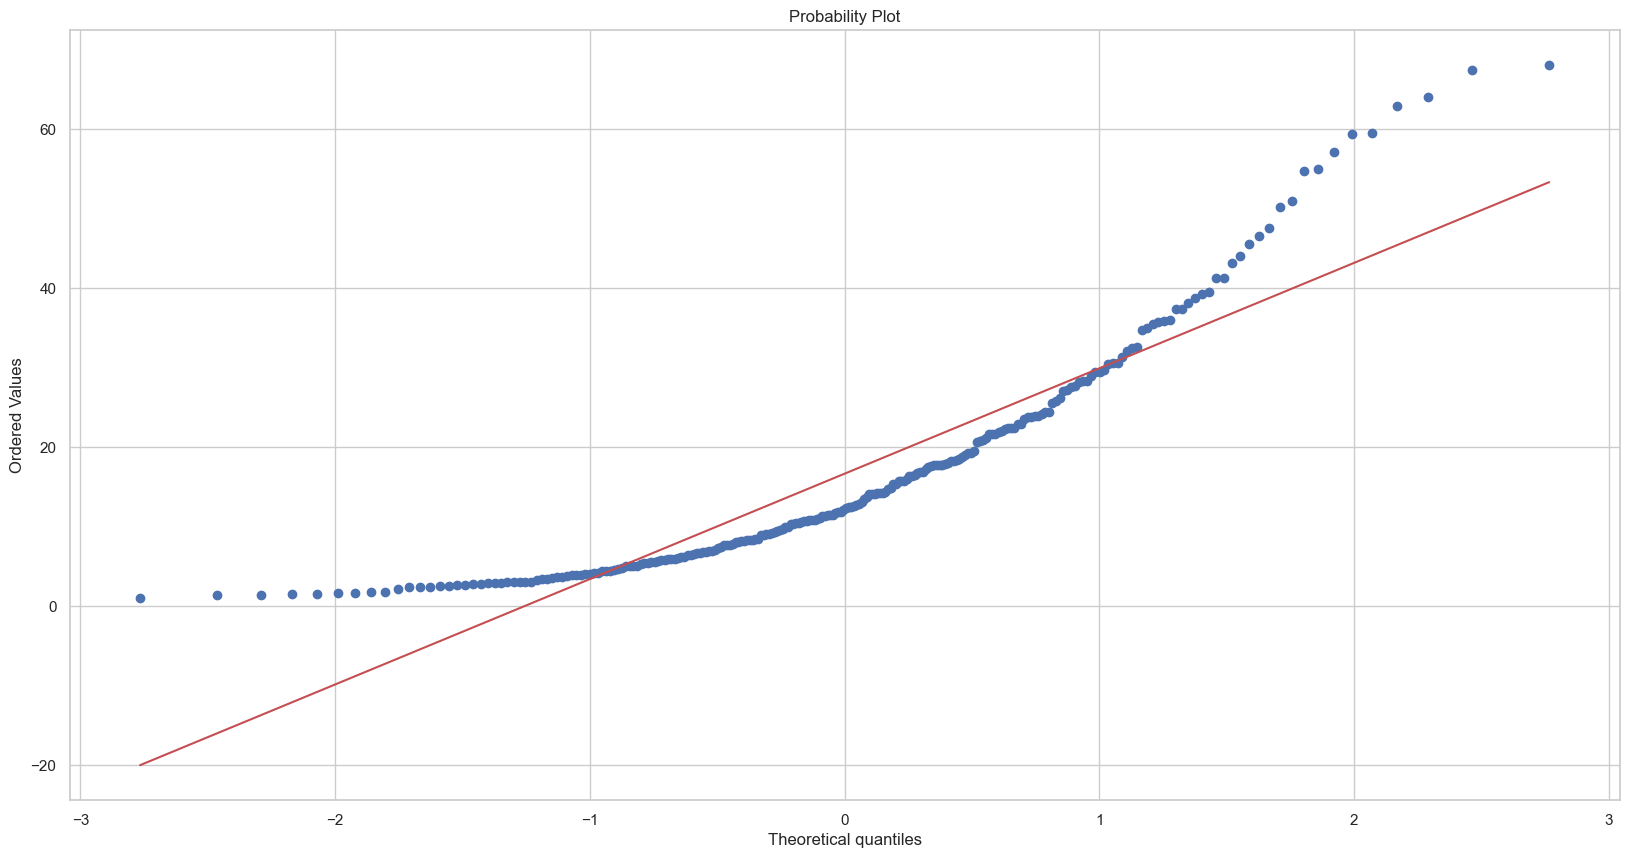

In [277]:
import scipy.stats as stats

stats.probplot(x = df['BUI'], plot=plt, dist='norm')
plt.show()

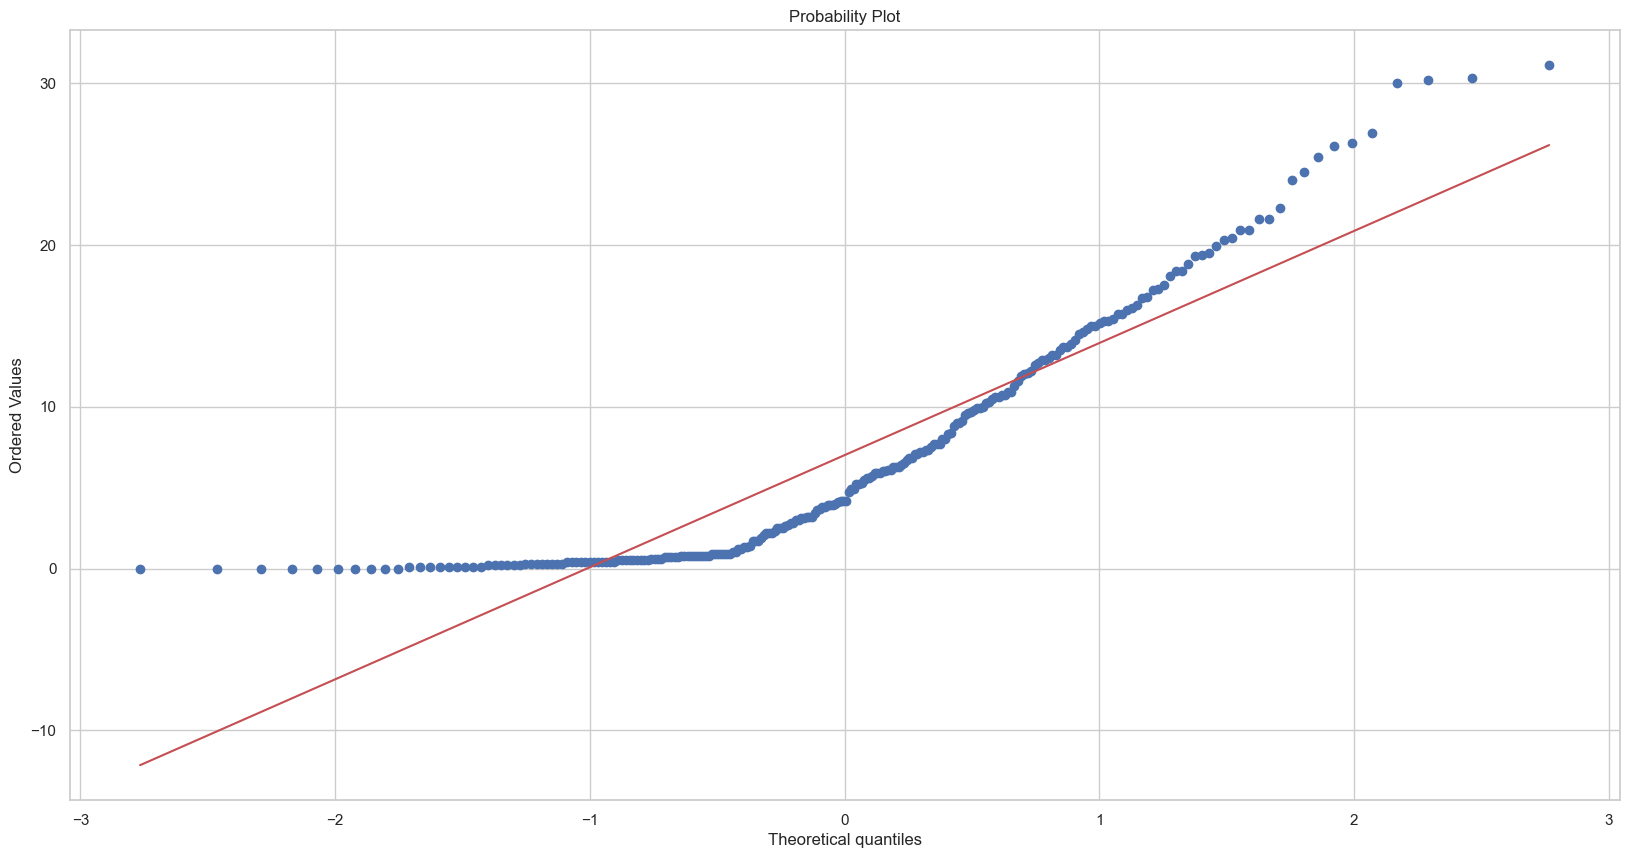

In [278]:
stats.probplot(x = df['FWI'], plot=plt, dist='norm')
plt.show()

#### Count Plot

<AxesSubplot:xlabel='Ws', ylabel='count'>

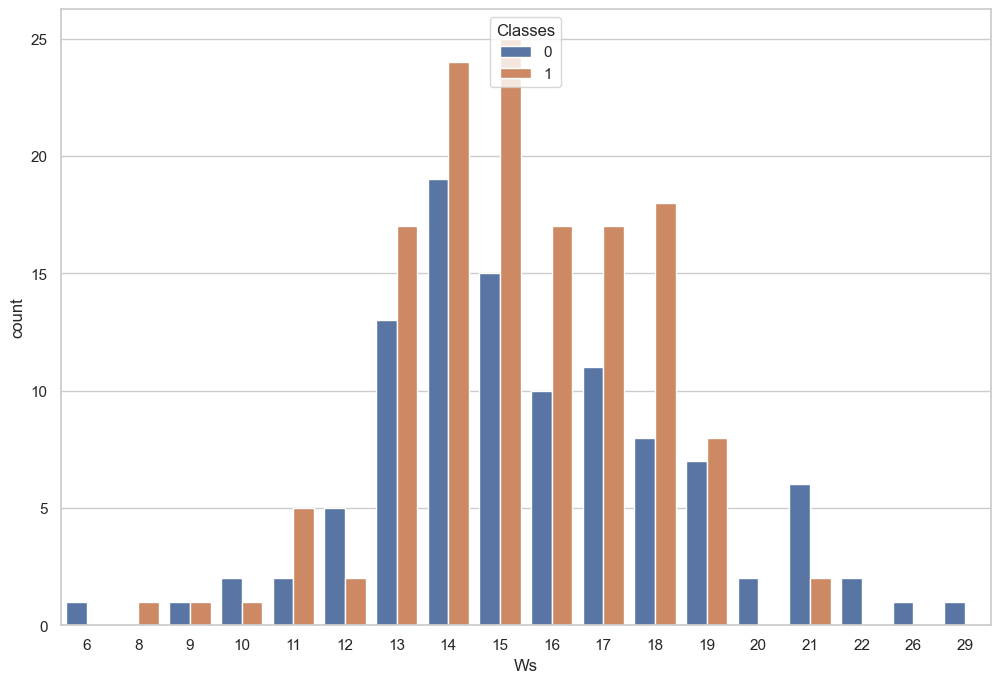

In [279]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Ws', hue='Classes')

[Text(0, 0, '21'),
 Text(1, 0, '24'),
 Text(2, 0, '26'),
 Text(3, 0, '29'),
 Text(4, 0, '31'),
 Text(5, 0, '33'),
 Text(6, 0, '34'),
 Text(7, 0, '35'),
 Text(8, 0, '36'),
 Text(9, 0, '37'),
 Text(10, 0, '38'),
 Text(11, 0, '39'),
 Text(12, 0, '40'),
 Text(13, 0, '41'),
 Text(14, 0, '42'),
 Text(15, 0, '43'),
 Text(16, 0, '44'),
 Text(17, 0, '45'),
 Text(18, 0, '46'),
 Text(19, 0, '47'),
 Text(20, 0, '48'),
 Text(21, 0, '49'),
 Text(22, 0, '50'),
 Text(23, 0, '51'),
 Text(24, 0, '52'),
 Text(25, 0, '53'),
 Text(26, 0, '54'),
 Text(27, 0, '55'),
 Text(28, 0, '56'),
 Text(29, 0, '57'),
 Text(30, 0, '58'),
 Text(31, 0, '59'),
 Text(32, 0, '60'),
 Text(33, 0, '61'),
 Text(34, 0, '62'),
 Text(35, 0, '63'),
 Text(36, 0, '64'),
 Text(37, 0, '65'),
 Text(38, 0, '66'),
 Text(39, 0, '67'),
 Text(40, 0, '68'),
 Text(41, 0, '69'),
 Text(42, 0, '70'),
 Text(43, 0, '71'),
 Text(44, 0, '72'),
 Text(45, 0, '73'),
 Text(46, 0, '74'),
 Text(47, 0, '75'),
 Text(48, 0, '76'),
 Text(49, 0, '77'),
 Text(50, 

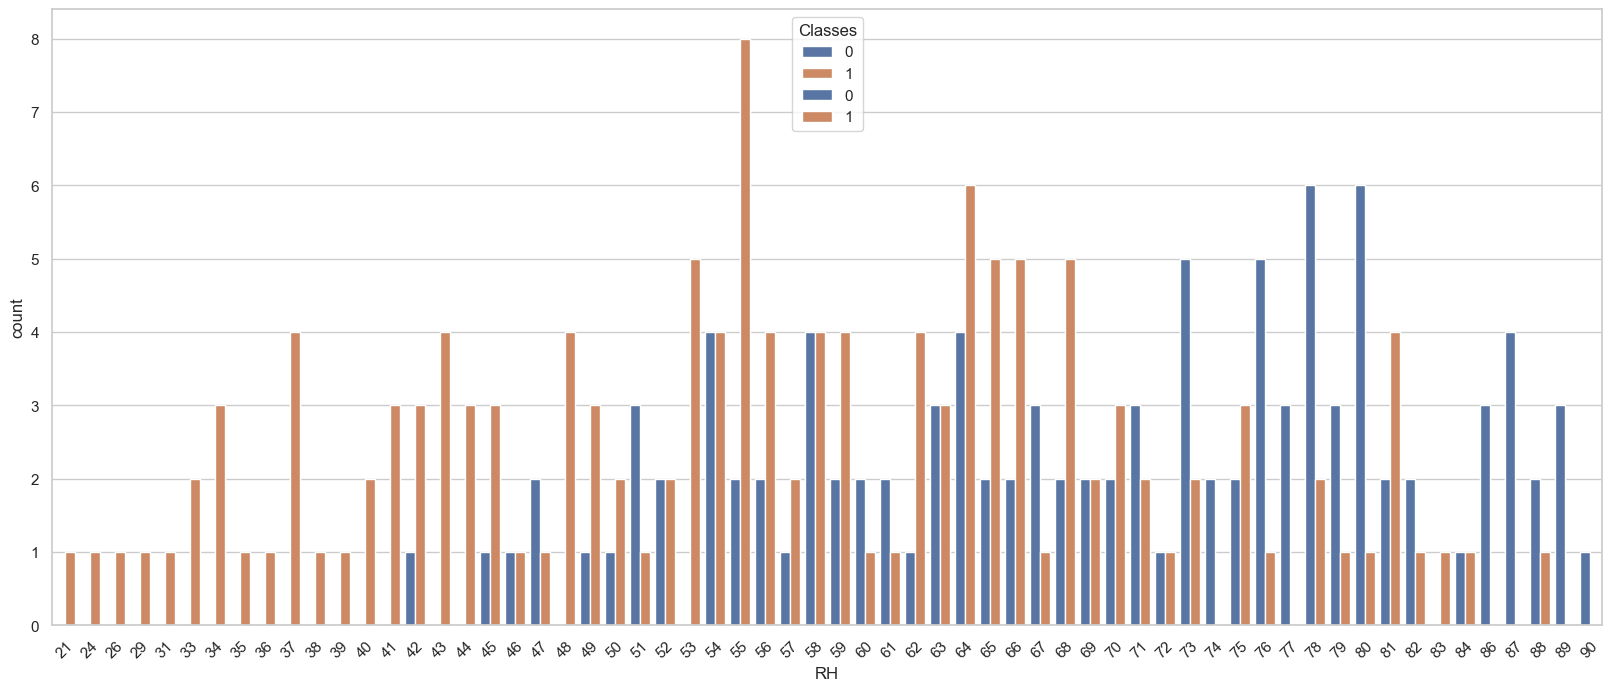

In [280]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='RH', 
              hue='Classes').set_xticklabels(sns.countplot(data=df, x='RH', hue='Classes').get_xticklabels(), rotation=45)

Text(0.5, 1.0, 'Fire Analysis Month wise')

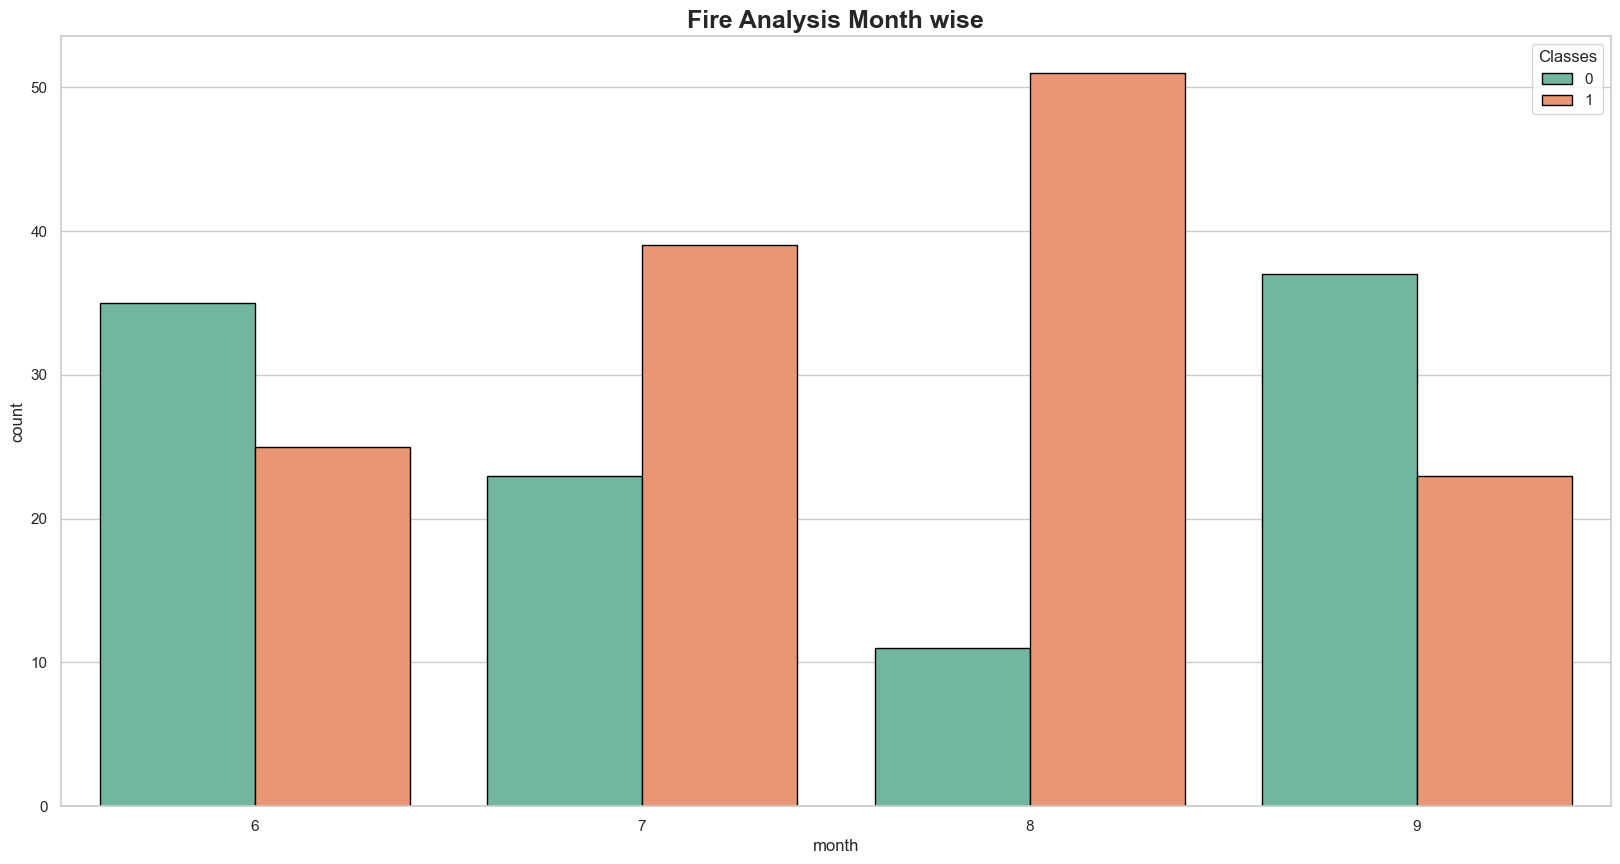

In [281]:
sns.countplot(x='month',hue='Classes',data= df,ec='black', palette= 'Set2')
plt.title('Fire Analysis Month wise', fontsize=18, weight='bold')

Text(0.5, 1.0, 'Fire Analysis Day wise')

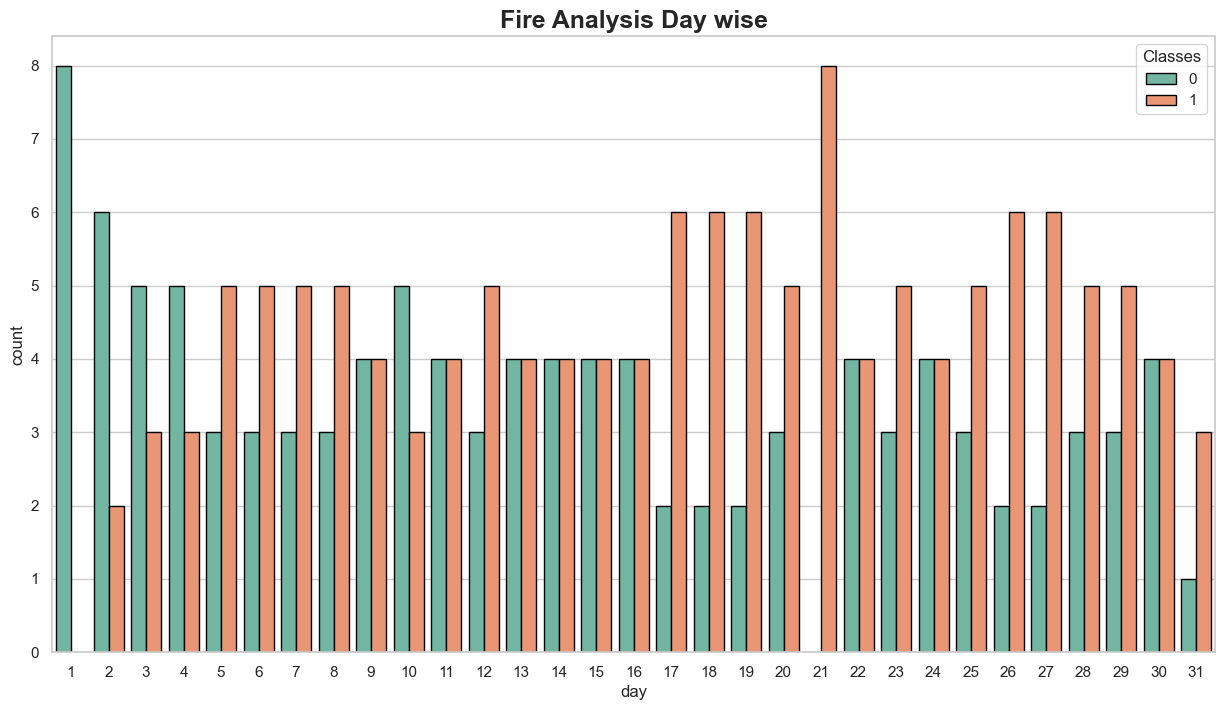

In [282]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(x='day',hue='Classes',data= df,ec='black', palette= 'Set2')
plt.title('Fire Analysis Day wise', fontsize=18, weight='bold')

##### Joint plot

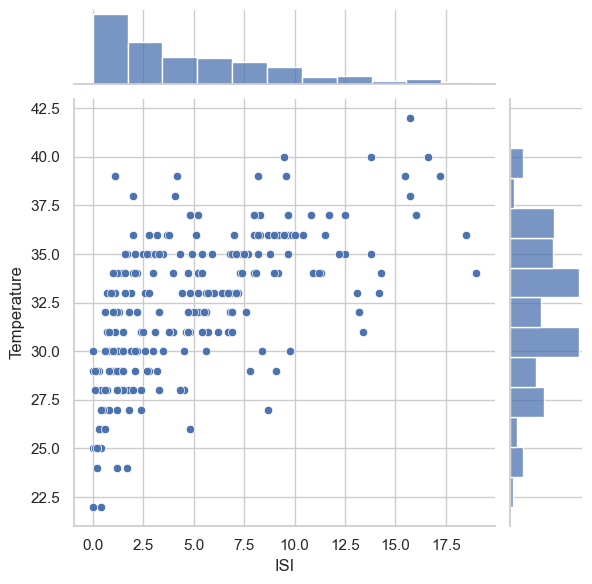

In [283]:
sns.jointplot(x='ISI', y='Temperature', data=df, color='b')

Observation :
- ISI and Temperature are partially positively related

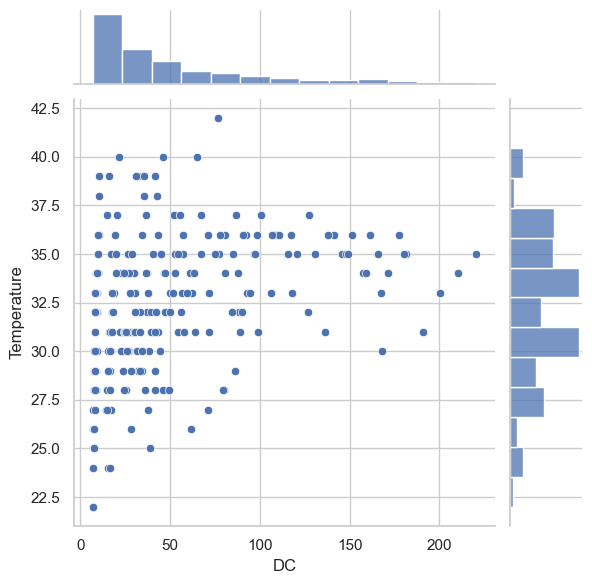

In [284]:
sns.jointplot(x='DC', y='Temperature', data=df, color='b')

In [285]:
df

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012         29.0  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012         29.0  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012         26.0  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012         25.0  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012         27.0  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
239   26      9  2012         30.0  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012         28.0  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012         27.0  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012         24.0  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012         24.0  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI  Classes  region  
0    0.5        0     0.0  
1    0.4        0     0.0  
2    0.1        0     0.0  
3    0.0        0     0.0  
4    0.5        0     0.0  
..   ...      ...     ...  
239  6.5        1     1.0  
240  0.0        0     1.0  
241  0.2        0     1.0  
242  0.7        0     1.0  
243  0.5        0     1.0  

[244 rows x 15 columns]

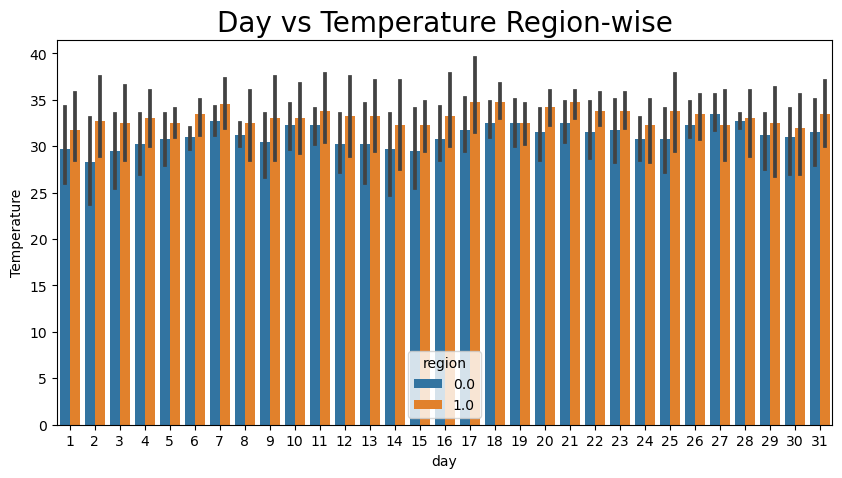

In [286]:
fig = plt.figure(figsize=(10, 5))
plt.style.use("default")
sns.barplot(df['day'],df['Temperature'],hue=df['region'])
plt.title("Day vs Temperature Region-wise",fontsize=20)
plt.show()

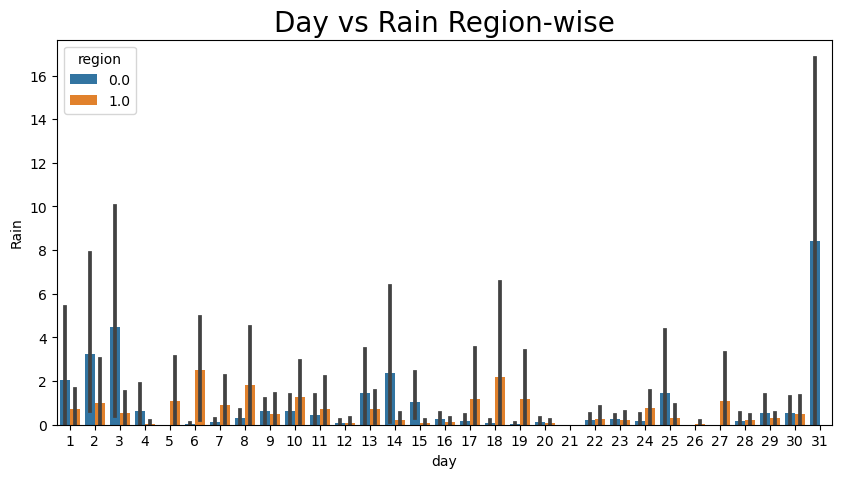

In [287]:
fig = plt.figure(figsize=(10, 5))
plt.style.use("default")
sns.barplot(df['day'],df['Rain'],hue=df['region'])
plt.title("Day vs Rain Region-wise",fontsize=20)
plt.show()

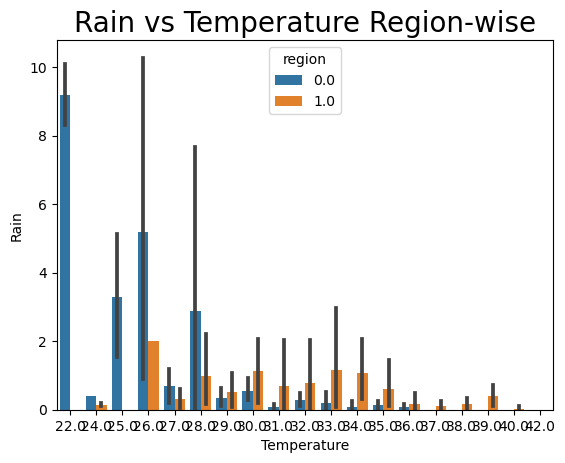

In [288]:
plt.style.use("default")
sns.barplot(df['Temperature'],df['Rain'],hue=df['region'])
plt.title("Rain vs Temperature Region-wise",fontsize=20)
plt.show()

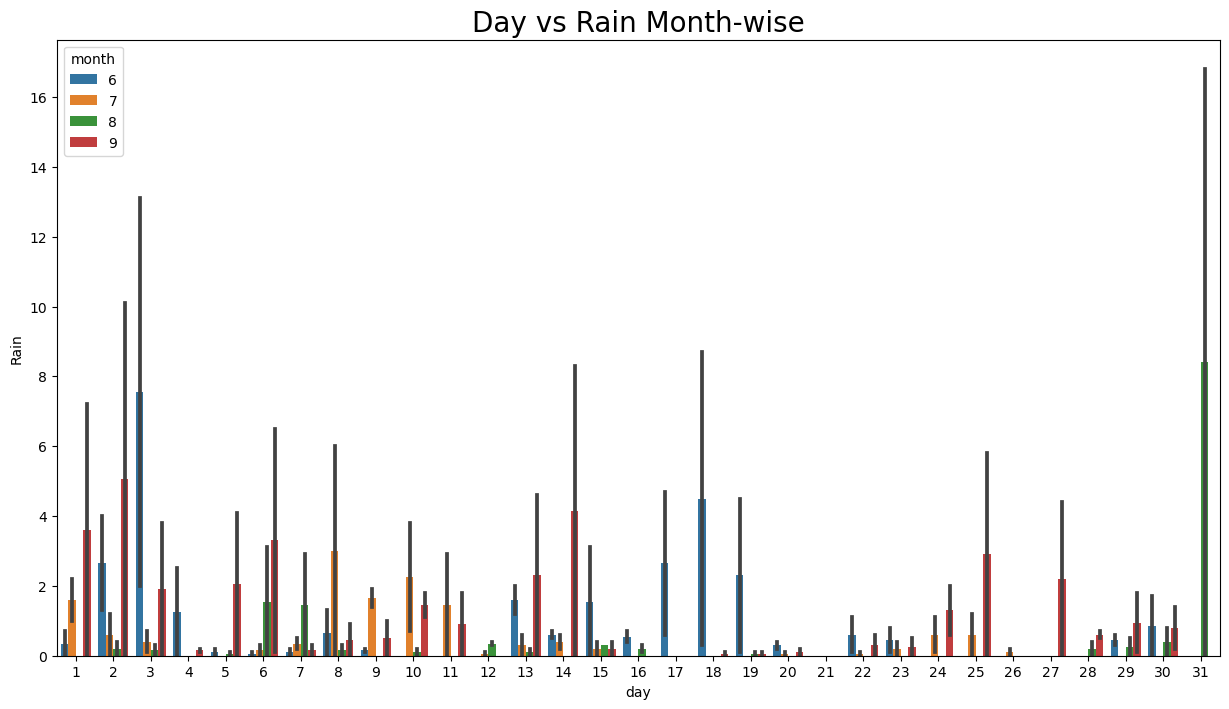

In [289]:
fig = plt.figure(figsize=(15, 8))
plt.style.use("default")
sns.barplot(df['day'],df['Rain'],hue=df['month'])
plt.title("Day vs Rain Month-wise",fontsize=20)
plt.show()

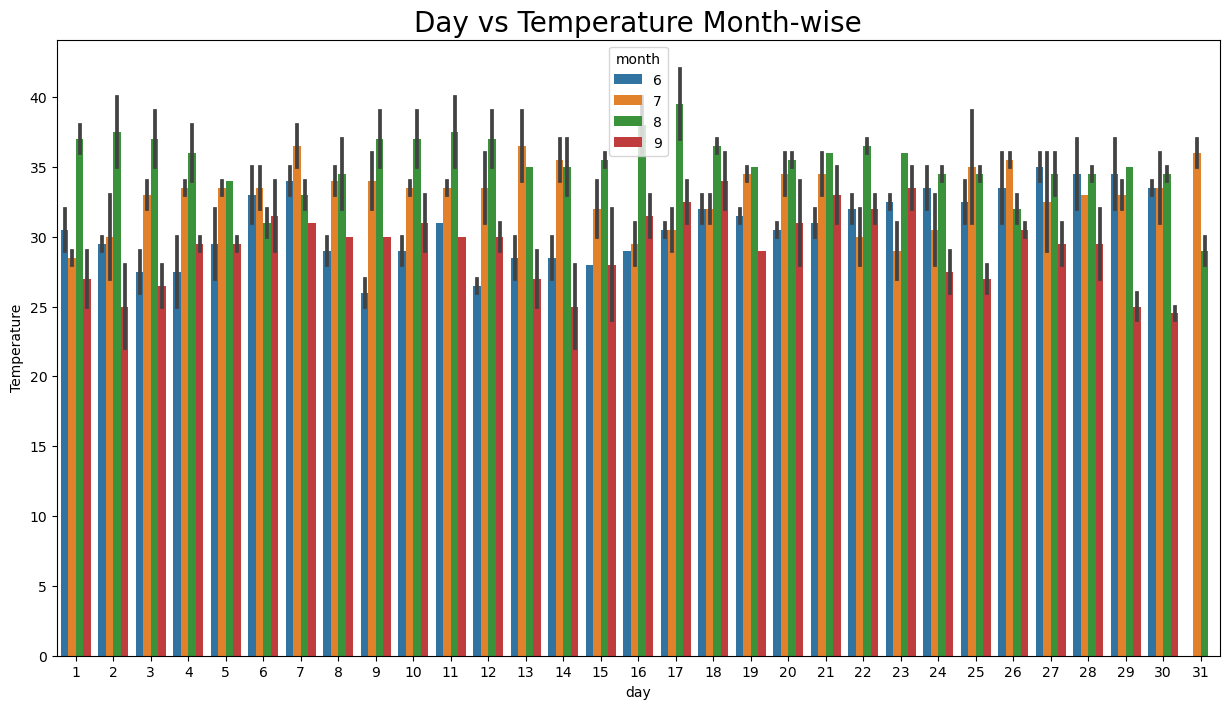

In [290]:
fig = plt.figure(figsize=(15, 8))
plt.style.use("default")
sns.barplot(df['day'],df['Temperature'],hue=df['month'])
plt.title("Day vs Temperature Month-wise",fontsize=20)
plt.show()

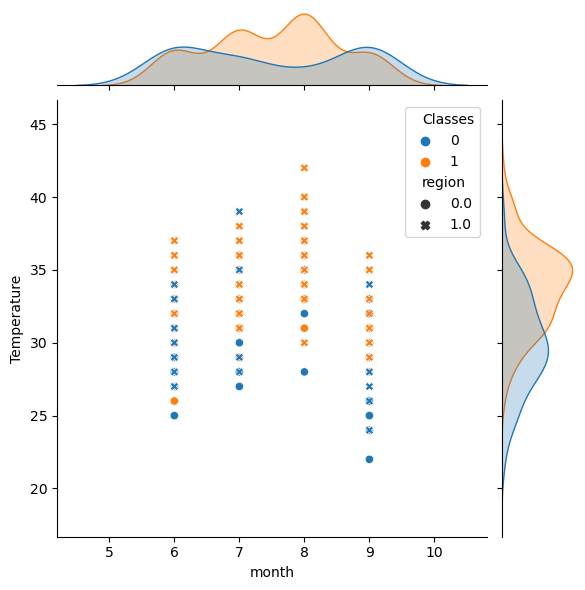

In [291]:
sns.jointplot(x='month',y='Temperature',data=df,color='r',hue='Classes',style=df['region'])

Observation :
- In the eighth month Sidi-Bel Abbes region catched maximum fire.

In [292]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

#### Scatterplot

Text(0, 0.5, 'Temperature')

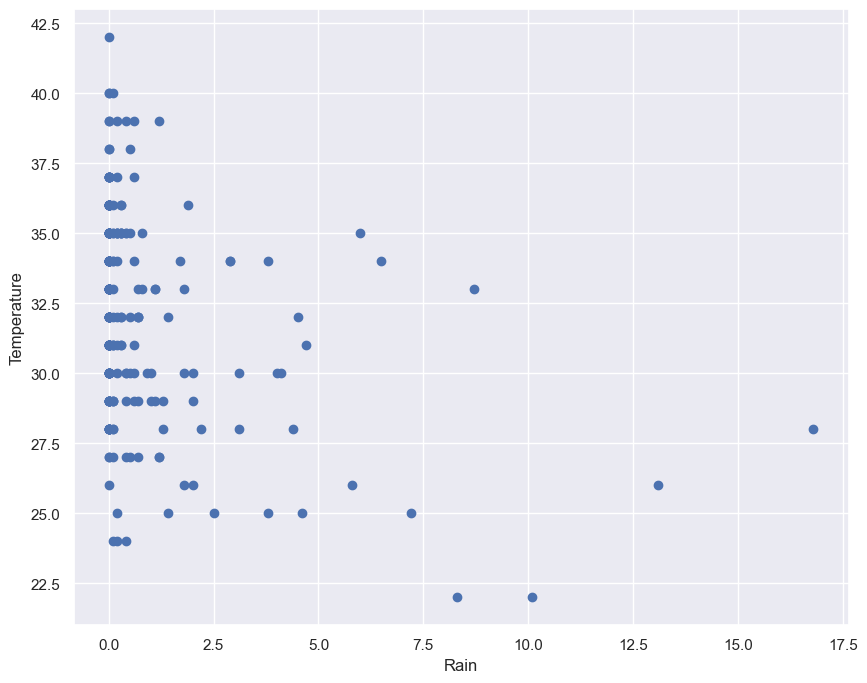

In [293]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['Rain'], df['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

#### Observation :
- There is a negative correlation between Rain and Temperature

Text(0, 0.5, 'Temperature')

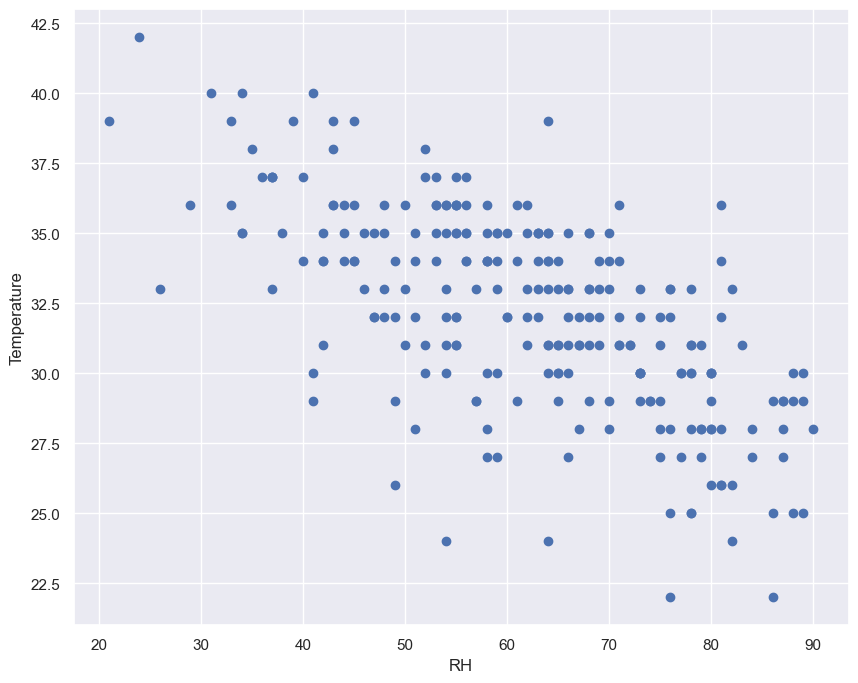

In [294]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['RH'], df['Temperature'])
plt.xlabel('RH')
plt.ylabel('Temperature')

#### Observation :
- There is a negative correlation between RH and Temperature

Text(0, 0.5, 'Temperature')

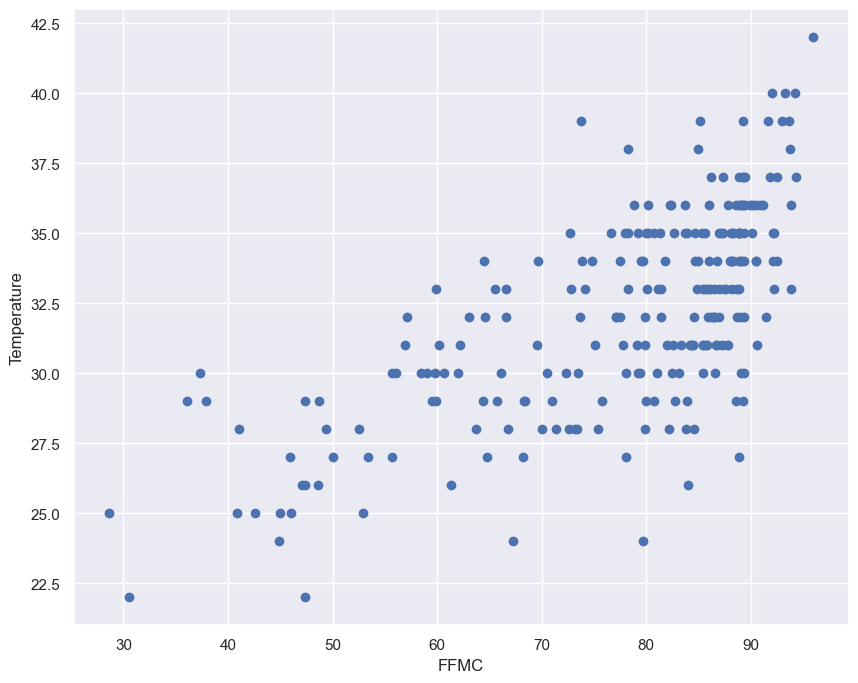

In [295]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['FFMC'], df['Temperature'])
plt.xlabel('FFMC')
plt.ylabel('Temperature')

#### Observation :
- There is a positive correlation between FFMC and Temperature

Text(0, 0.5, 'Temperature')

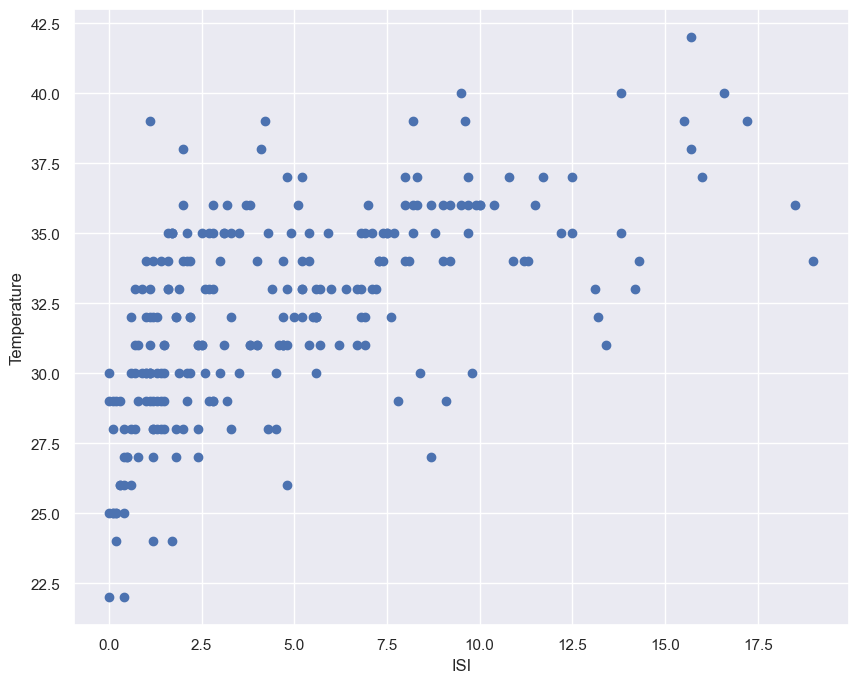

In [296]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['ISI'], df['Temperature'])
plt.xlabel('ISI')
plt.ylabel('Temperature')

#### Observation :
- There is a positive correlation between ISI and Temperature

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

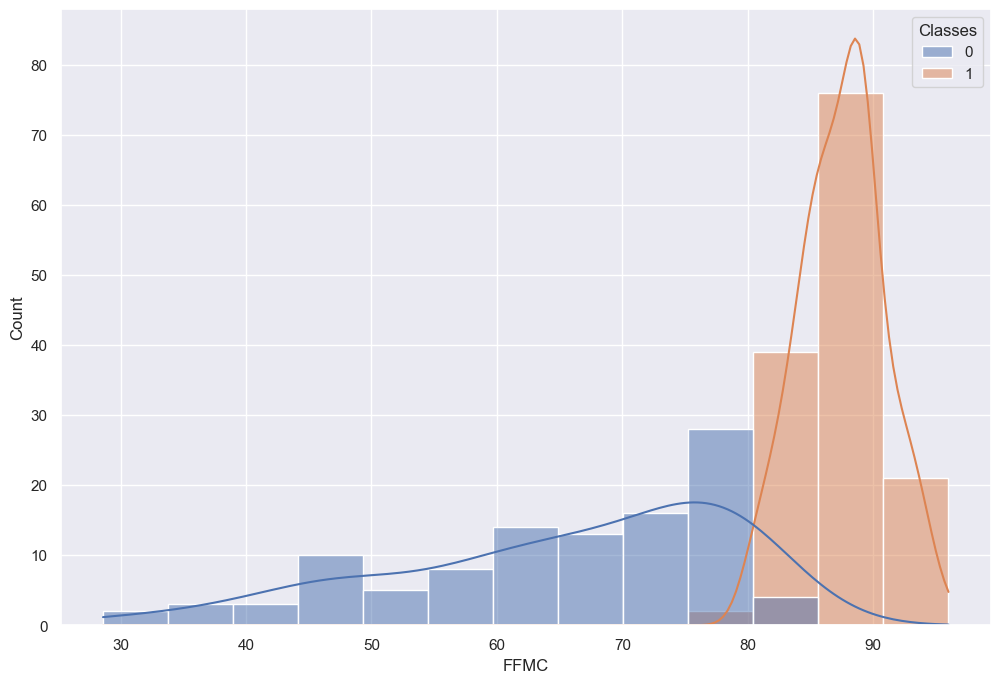

In [297]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='FFMC', kde=True, hue='Classes')

<AxesSubplot:xlabel='DMC', ylabel='Count'>

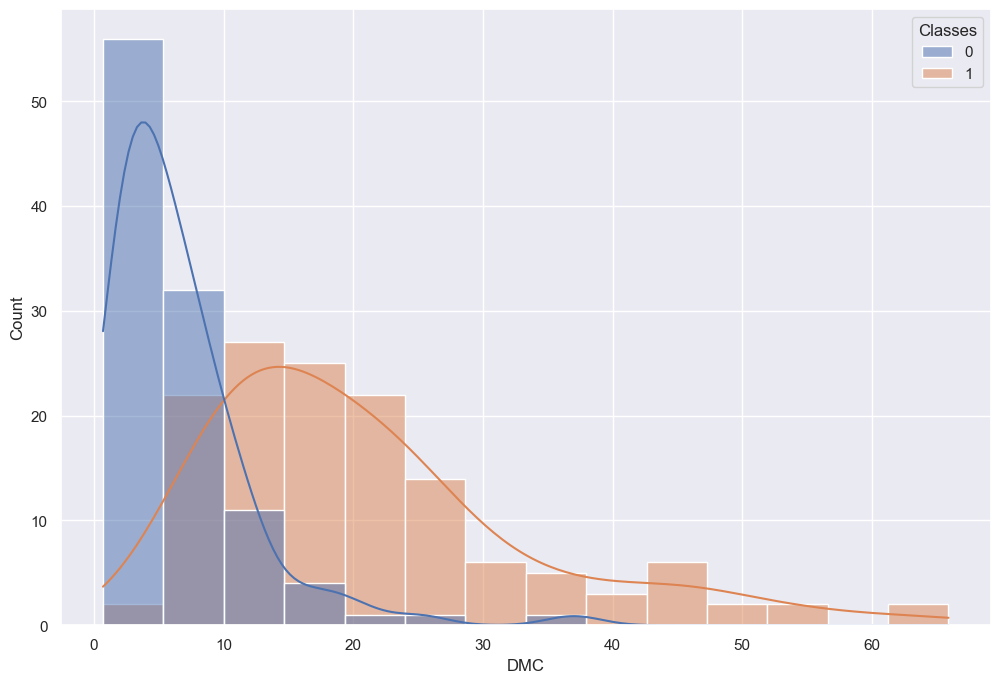

In [298]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='DMC', kde=True, hue='Classes')

## Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable.

Plots
- stripplot (categorical vs numerical)
- scatterplot/pairplot (numerical vs numerical) (check correlation)
- boxplot (outliers)
- heatmap (correlation)
- Lineplot (trend in numerical feature with time)

### Check Multicollinearity in Numerical features

In [299]:
df[list(df[col_num].columns)].corr()

day         month  year  Temperature        RH  \
day          1.000000e+00  2.232788e-17   NaN     0.095772 -0.074209   
month        2.232788e-17  1.000000e+00   NaN    -0.059017 -0.037884   
year                  NaN           NaN   NaN          NaN       NaN   
Temperature  9.577222e-02 -5.901677e-02   NaN     1.000000 -0.654443   
RH          -7.420934e-02 -3.788419e-02   NaN    -0.654443  1.000000   
Ws           4.700086e-02 -4.144673e-02   NaN    -0.278132  0.236084   
Rain        -1.122654e-01  3.532207e-02   NaN    -0.326786  0.222968   
FFMC         2.240321e-01  1.557668e-02   NaN     0.677491 -0.645658   
DMC          4.915710e-01  6.817778e-02   NaN     0.483105 -0.405133   
DC           5.279285e-01  1.276719e-01   NaN     0.370498 -0.220330   
ISI          1.777266e-01  6.168011e-02   NaN     0.607551 -0.690637   
BUI          5.172292e-01  8.582162e-02   NaN     0.455504 -0.348587   
FWI          3.508824e-01  8.420132e-02   NaN     0.558393 -0.569997   
region       4.662229e-16 -9.586232e-17   NaN     0.273496 -0.406424   

                   Ws      Rain      FFMC       DMC        DC       ISI  \
day          0.047001 -0.112265  0.224032  0.491571  0.527929  0.177727   
month       -0.041447  0.035322  0.015577  0.068178  0.127672  0.061680   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.278132 -0.326786  0.677491  0.483105  0.370498  0.607551   
RH           0.236084  0.222968 -0.645658 -0.405133 -0.220330 -0.690637   
Ws           1.000000  0.170169 -0.163255 -0.001246  0.076245  0.015248   
Rain         0.170169  1.000000 -0.544045 -0.288548 -0.296804 -0.347105   
FFMC        -0.163255 -0.544045  1.000000  0.602391  0.503910  0.739730   
DMC         -0.001246 -0.288548  0.602391  1.000000  0.875358  0.674499   
DC           0.076245 -0.296804  0.503910  0.875358  1.000000  0.498909   
ISI          0.015248 -0.347105  0.739730  0.674499  0.498909  1.000000   
BUI          0.029756 -0.299171  0.589652  0.982073  0.941904  0.635891   
FWI          0.028799 -0.322682  0.686033  0.874778  0.740189  0.907461   
region      -0.176829 -0.041080  0.224680  0.191094 -0.081489  0.268421   

                  BUI       FWI        region  
day          0.517229  0.350882  4.662229e-16  
month        0.085822  0.084201 -9.586232e-17  
year              NaN       NaN           NaN  
Temperature  0.455504  0.558393  2.734961e-01  
RH          -0.348587 -0.569997 -4.064239e-01  
Ws           0.029756  0.028799 -1.768290e-01  
Rain        -0.299171 -0.322682 -4.108006e-02  
FFMC         0.589652  0.686033  2.246798e-01  
DMC          0.982073  0.874778  1.910937e-01  
DC           0.941904  0.740189 -8.148947e-02  
ISI          0.635891  0.907461  2.684206e-01  
BUI          1.000000  0.857771  8.736964e-02  
FWI          0.857771  1.000000  1.924515e-01  
region       0.087370  0.192451  1.000000e+00

Observation :
- Temperature and RH are negatively correlated
- Temperature and FFMC are positively correlated
- Temperature and ISI are positively correlated

Heatmap  :  Correlation between features

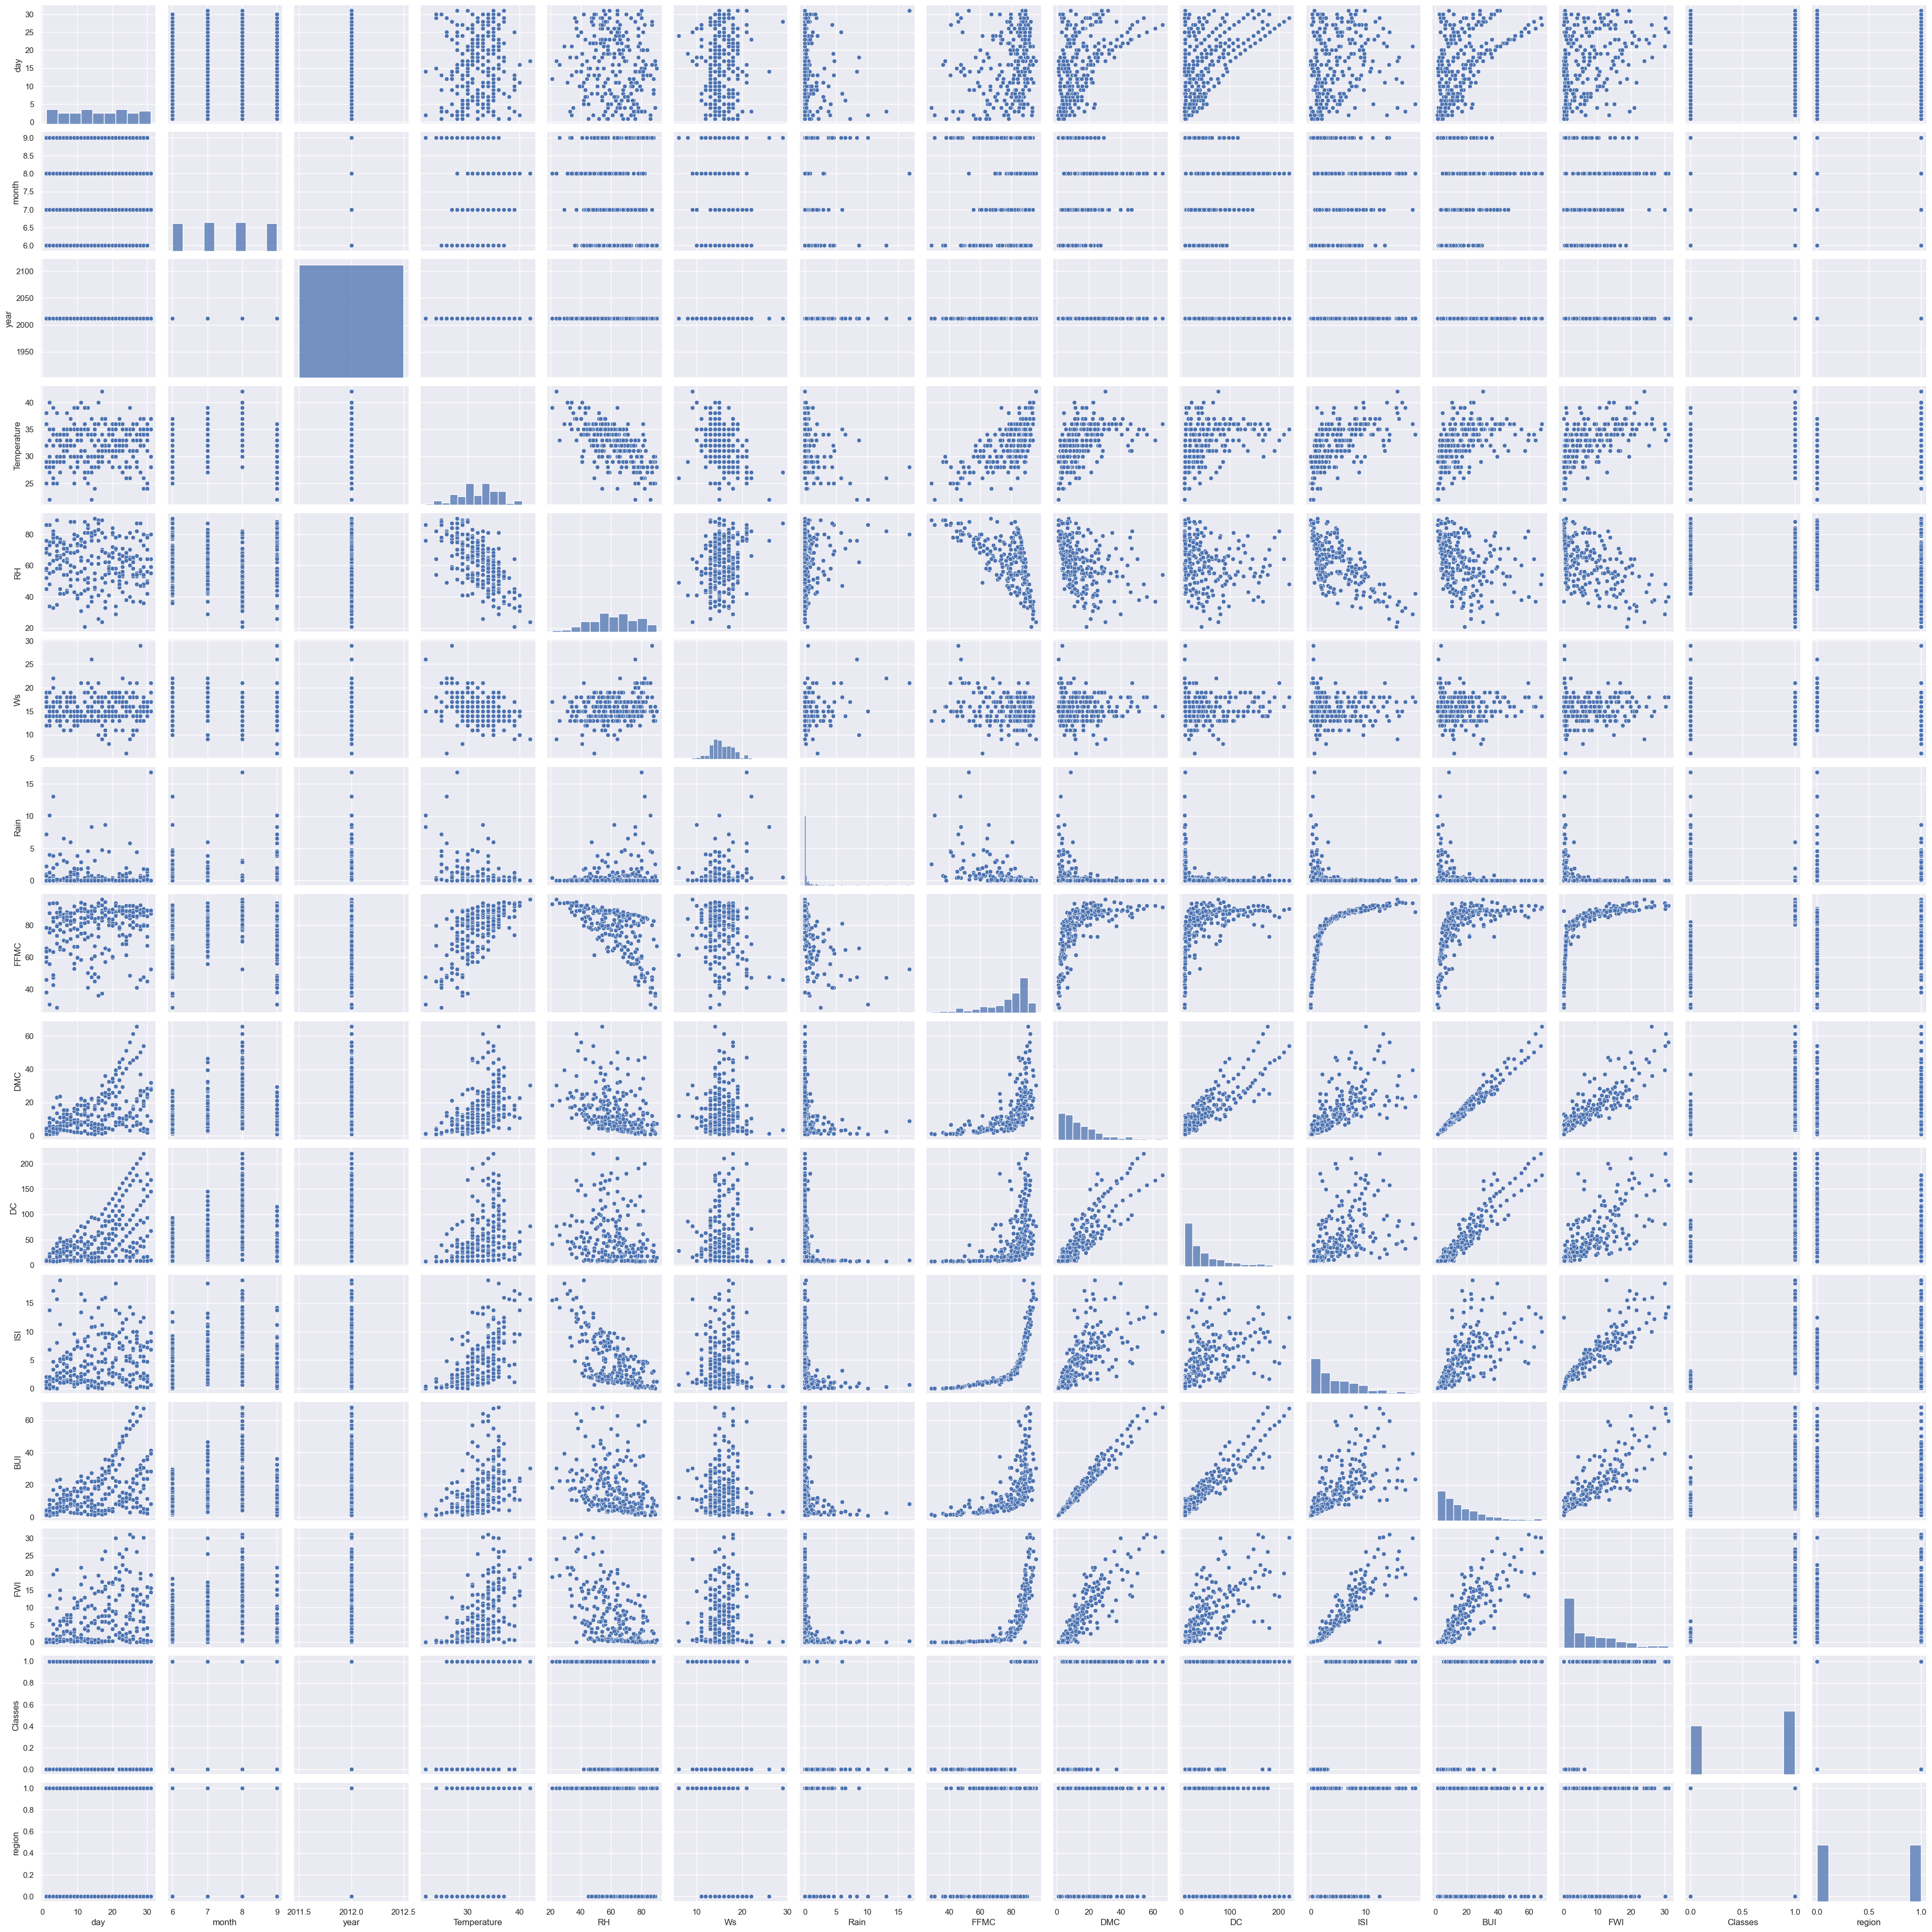

In [300]:
sns.pairplot(df)

Heatmap  :  Correlation between features

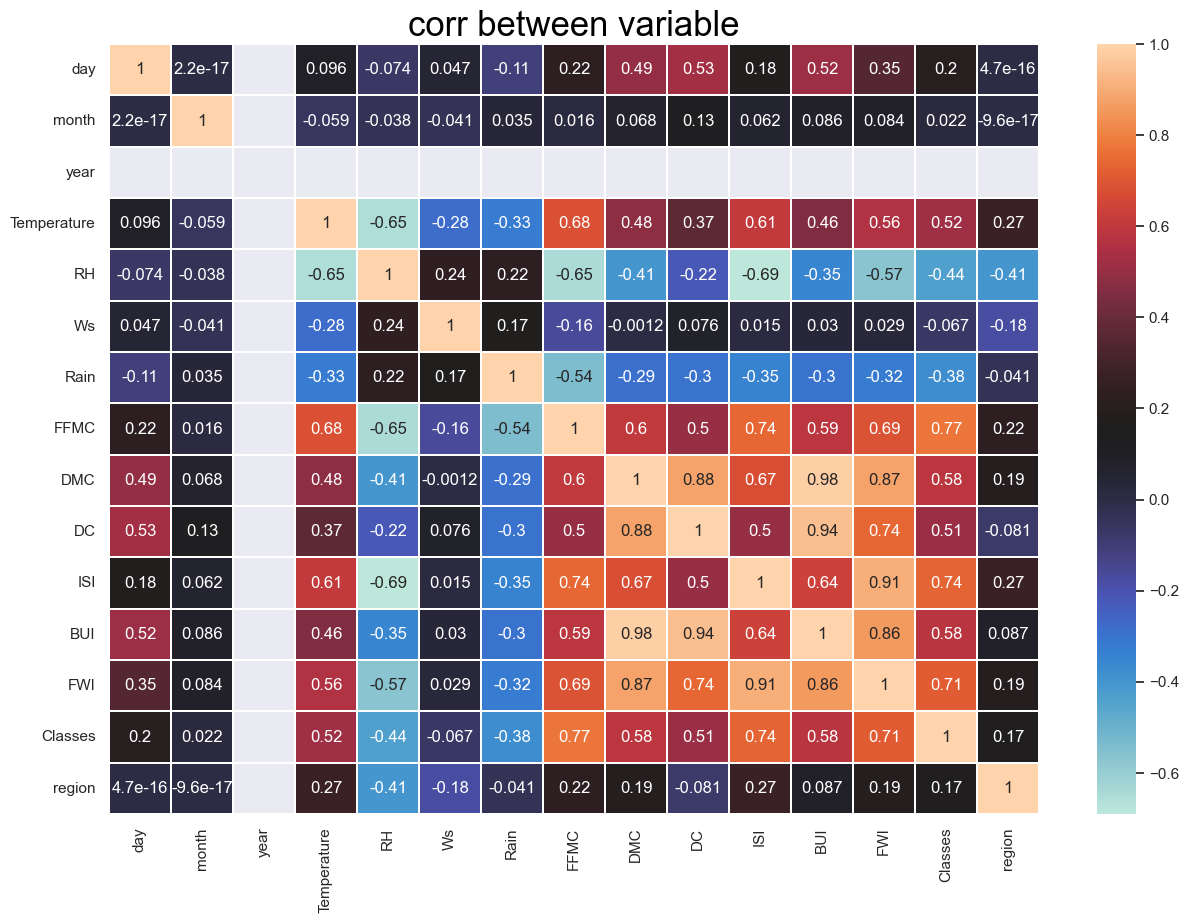

In [301]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

Observation : 
- Highly +ve correlation between DMC & BMI
- Highly -ve correlation between RH & ISI, RH & FMCC, RH & Temperature
- DC and BUI have high positive correlation.FWI and ISI

Stripplot  :  To see relationship between numerical features and target

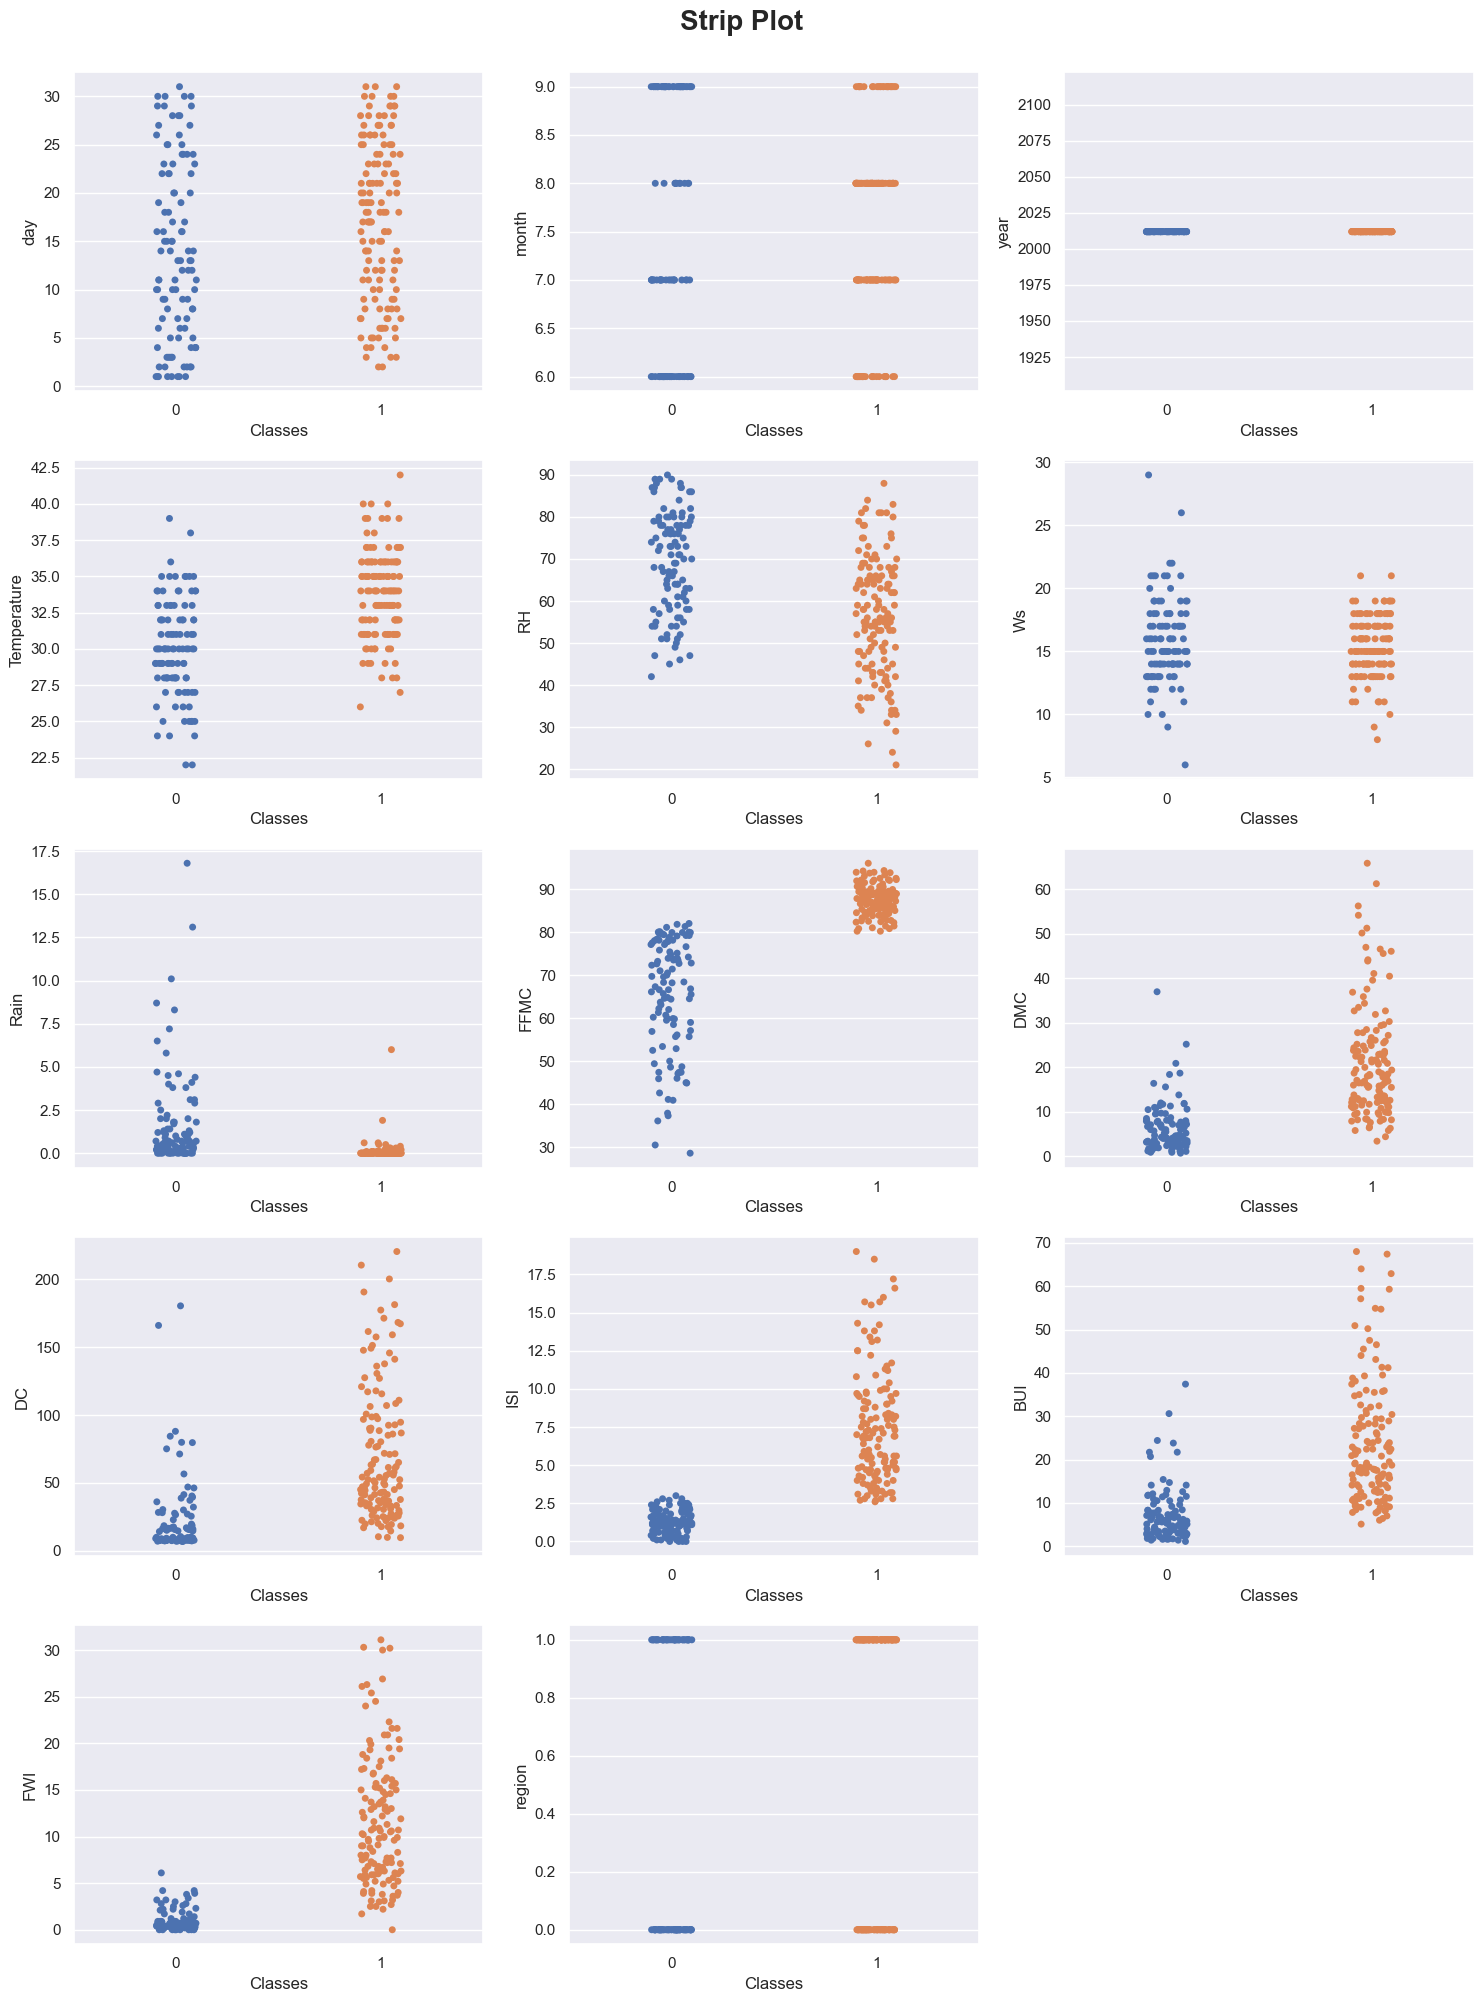

In [302]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=col_num[i], x='Classes', data=df)
    plt.tight_layout()

Observations :
- Note : 0-> Not Fire, 1-> Fire
- Places with higher temperature has fire
- Places with low humidity has fire
- Places with rain < 1.5  has fire
- Places with FFMC > 80 has fire
- Places with ISI > 2.5 has fire
- Places with BUI > 8 has fire

Box Plot  : To find outliers in the features

<AxesSubplot:>

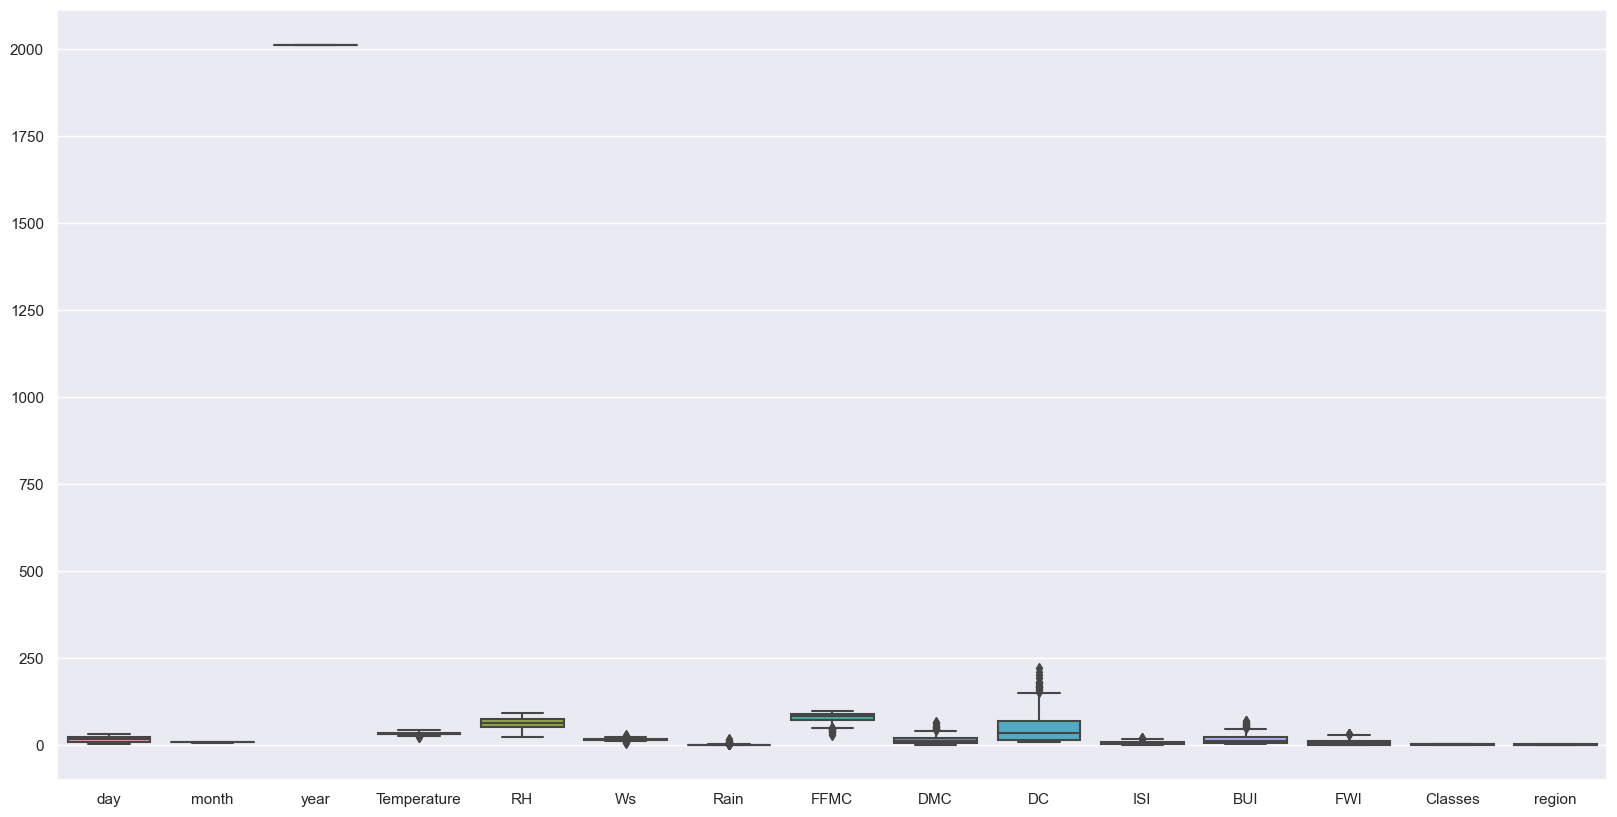

In [303]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df, orient='v')

Observation :
- FFMC, DMC, BUI Rain has more outliers
- Ws, ISI, Temprature have outliers too

##### Plotting histogram

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'region'}>, <AxesSubplot:>]],
      dtype=object)

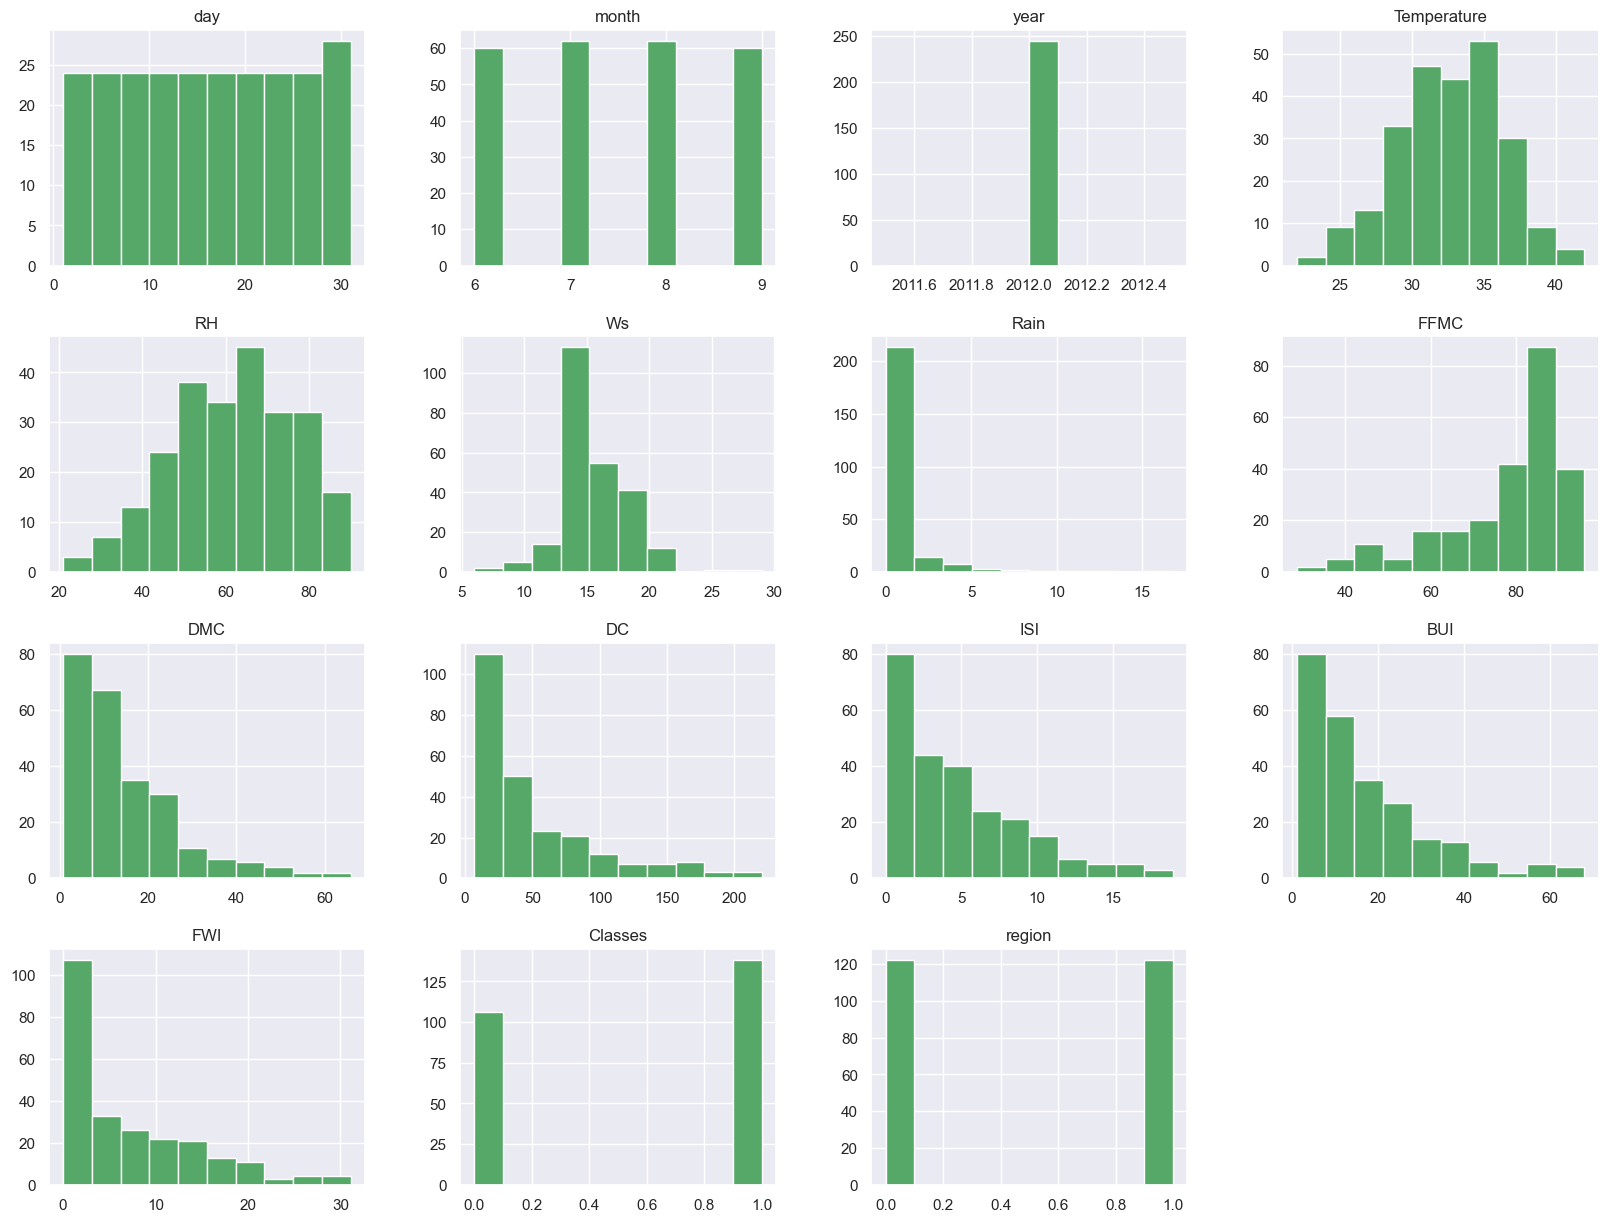

In [304]:
df.hist(figsize=(20,15), color='g')

##### Bar graph

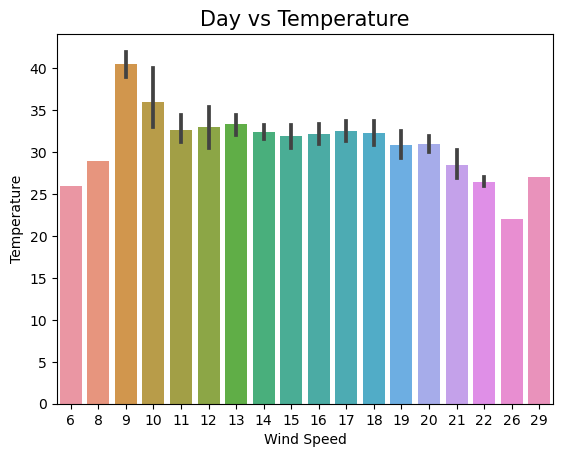

In [305]:
plt.style.use('default')
sns.barplot(x='Ws', y='Temperature', data=df)
plt.title('Day vs Temperature', fontsize=15)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()

## 4.3 Graphical Analysis

### Area having more fire ?

<AxesSubplot:xlabel='region', ylabel='Classes'>

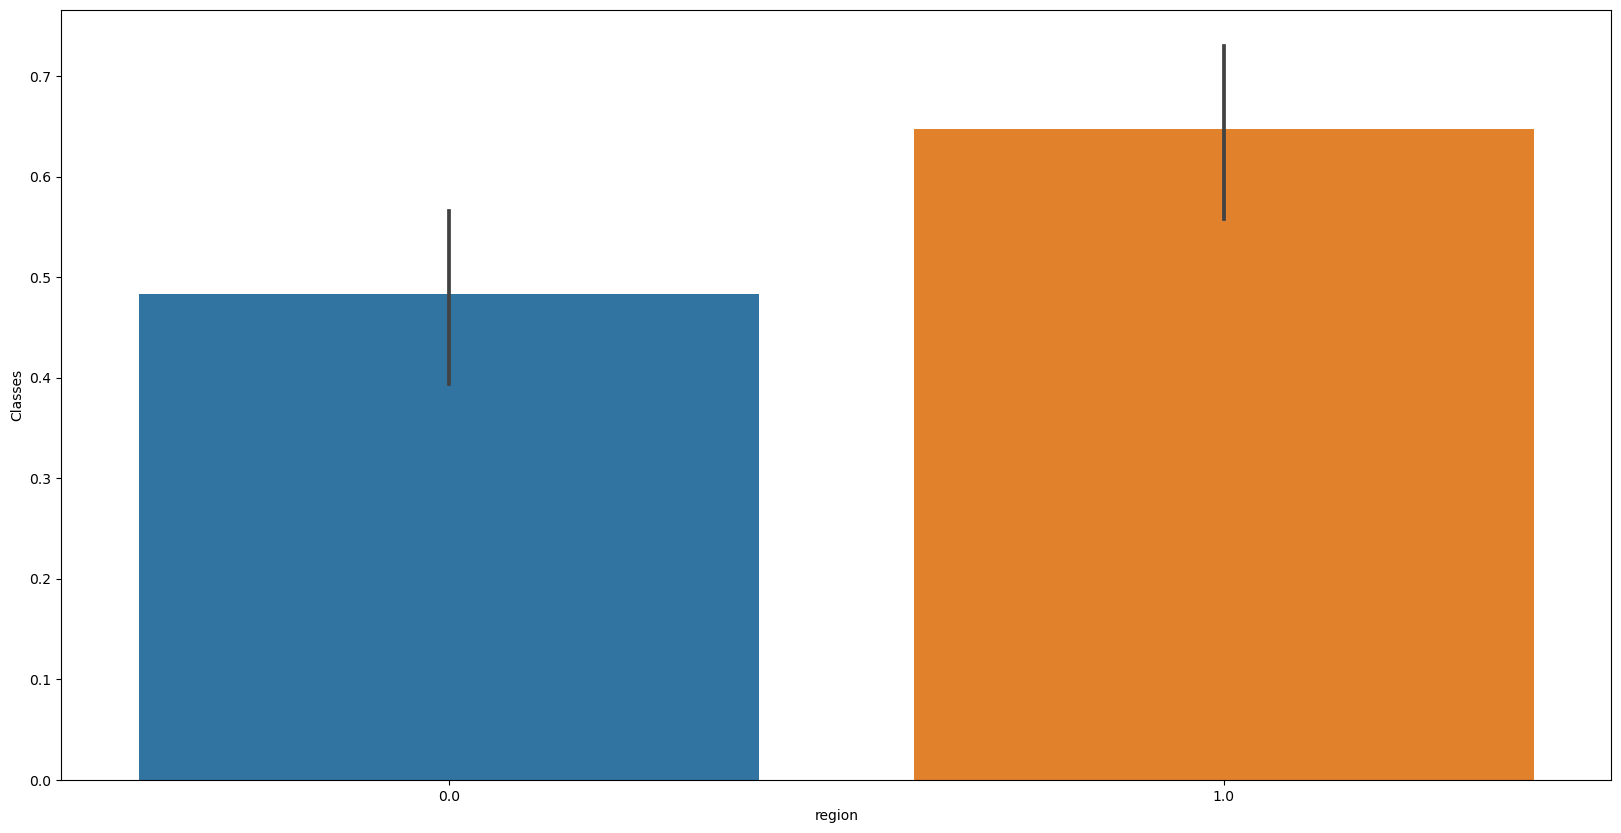

In [306]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

sns.barplot(x='region', y='Classes', data=df)

Observations :
- Sidi-Bel-Abbes ragion has more number of times fire took place

### Consistent Temperature in places

Text(0.5, 0, 'Temperature')

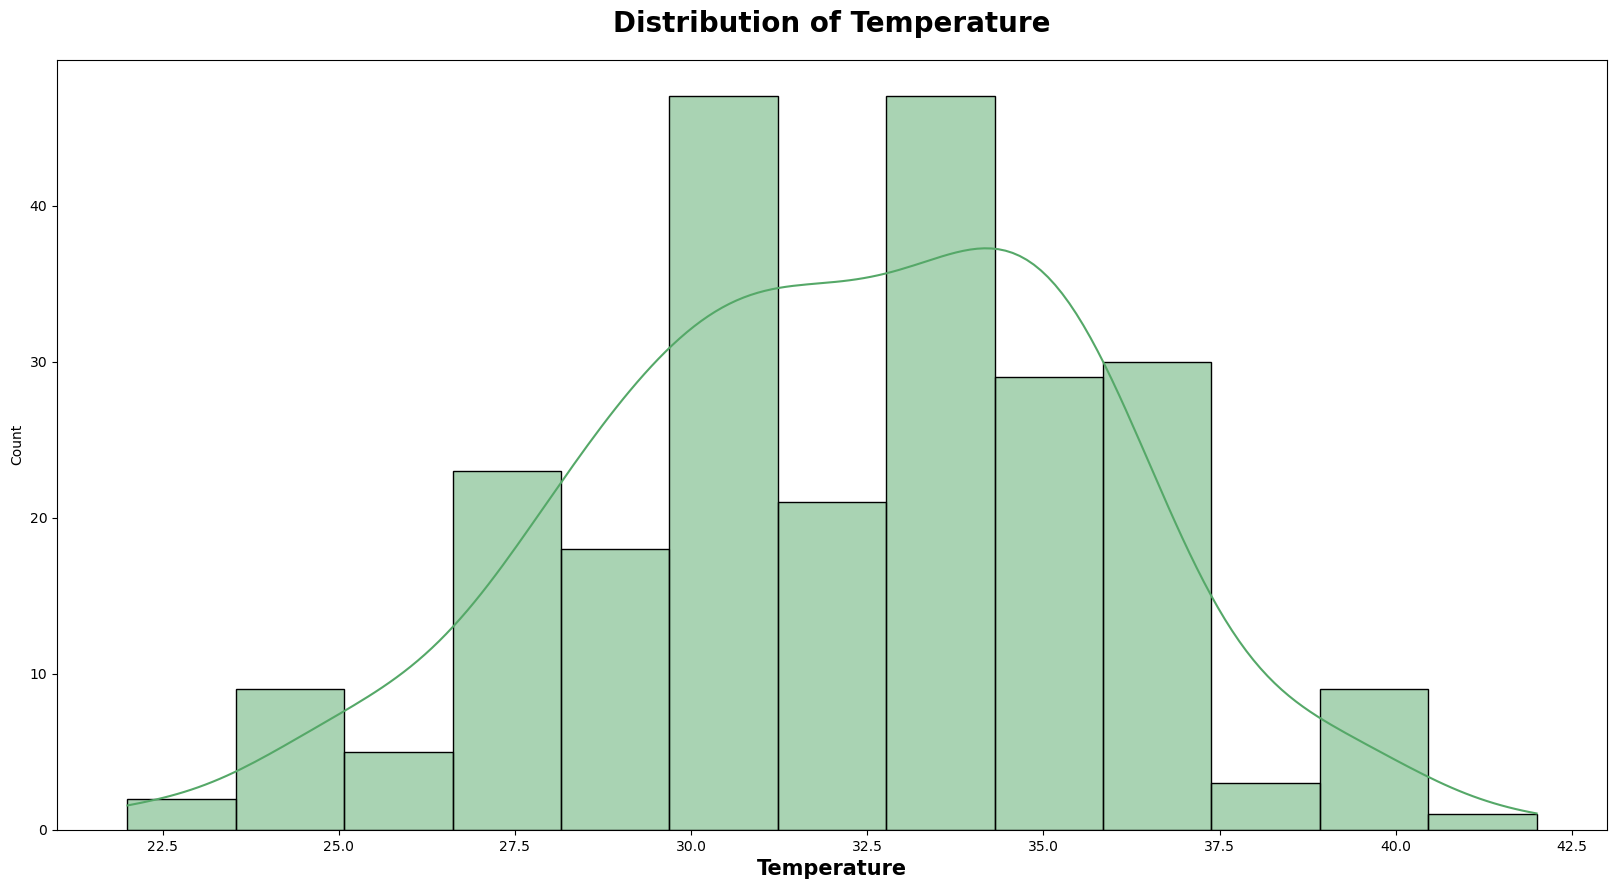

In [307]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature", x=df.Temperature, color='g', kde=True)
plt.title("Distribution of Temperature", weight='bold', fontsize=20, pad=20)
plt.xlabel('Temperature', weight='bold', fontsize=15)

Observation :
- The frequent occurring temperature ranges between 30-34

## Highest Temperature recorded
Bar Plot

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

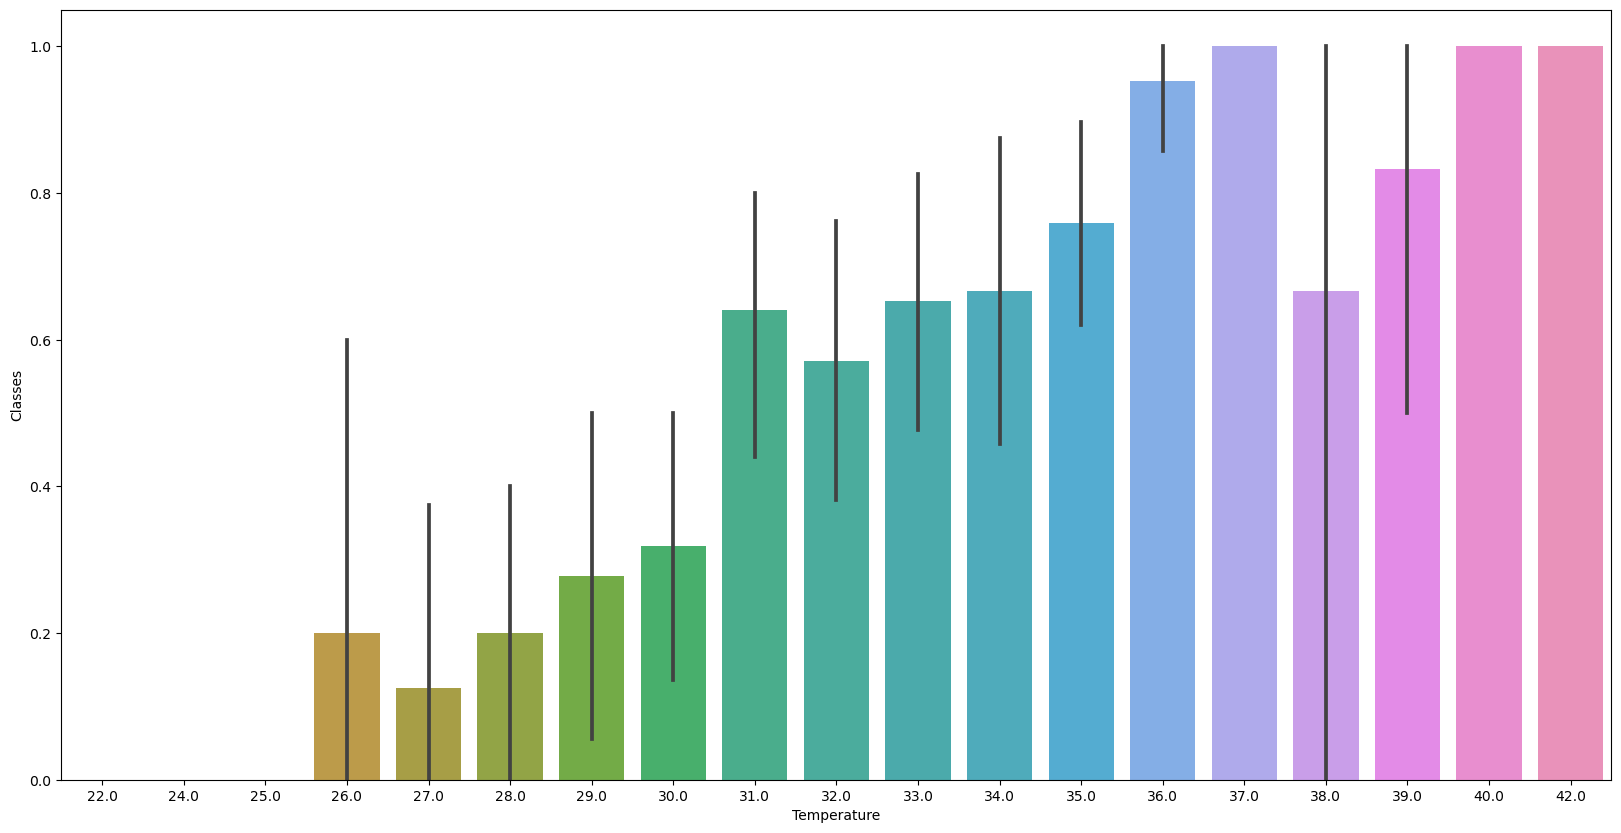

In [308]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

sns.barplot(x='Temperature', y='Classes', data=df)

Observations :
- Highest Temperature is 37, 40, 42

## The Region with more Rain

<AxesSubplot:xlabel='region', ylabel='Rain'>

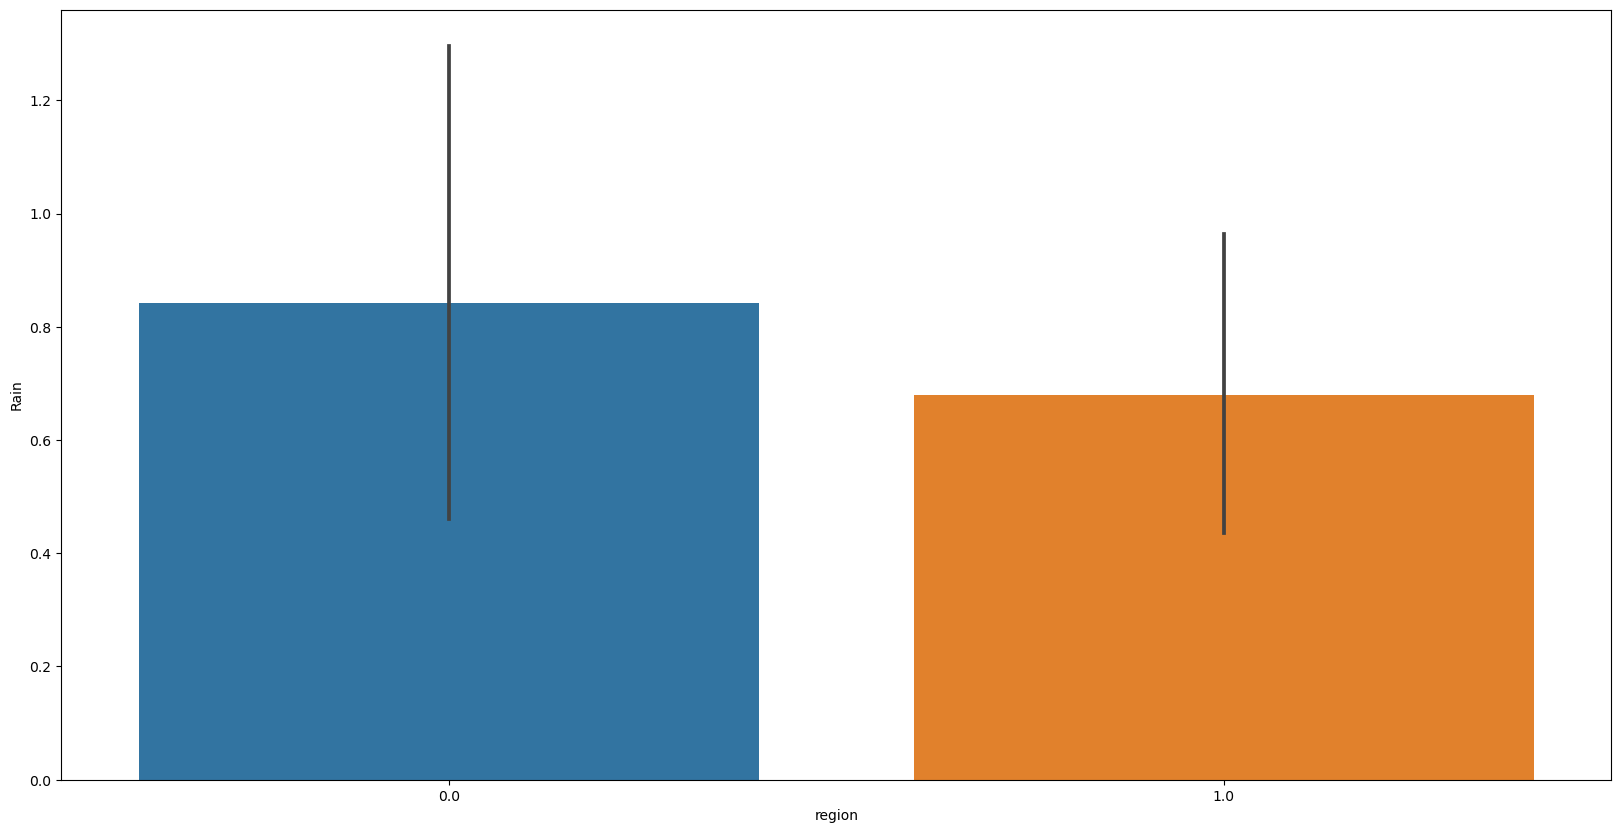

In [309]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
sns.barplot(x='region', y='Rain', data=df)

Observation :
- Bejaia is the region with more Rain

### Box plot : Classes Vs Temerature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

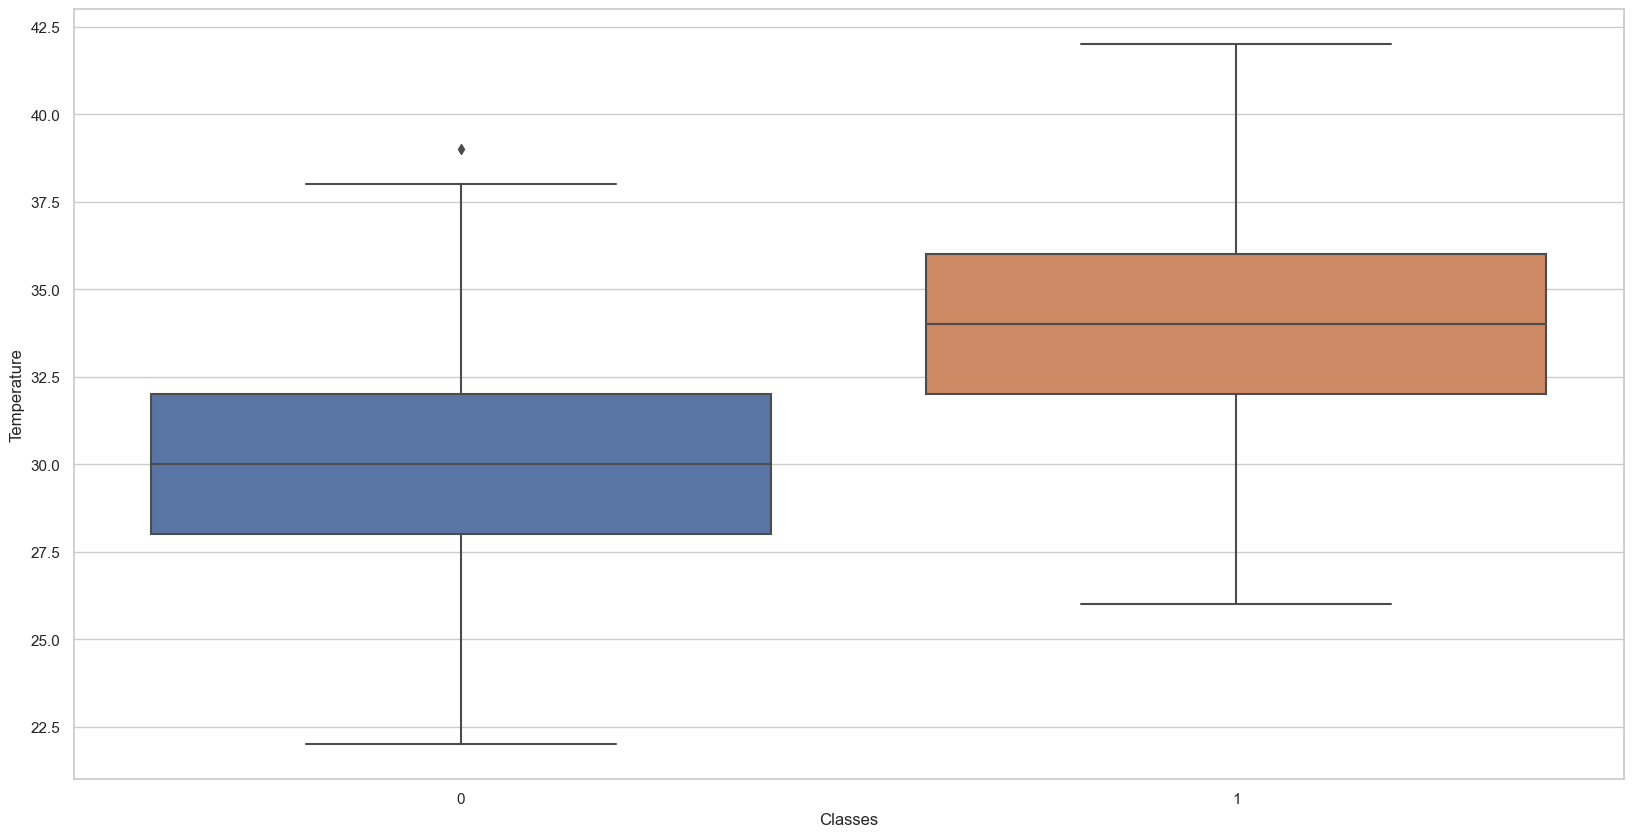

In [310]:
# Box-plot using inbuilt dataset

# importing the required module : seaborn
import seaborn

# Setting the background of the plot
seaborn.set(style='whitegrid')

# Loading Dataset
seaborn.boxplot(x='Classes', y='Temperature', data=df)

Observation :
- There is outlier on 'No Fire' plot. 

### Box plot : Classes vs Rain

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

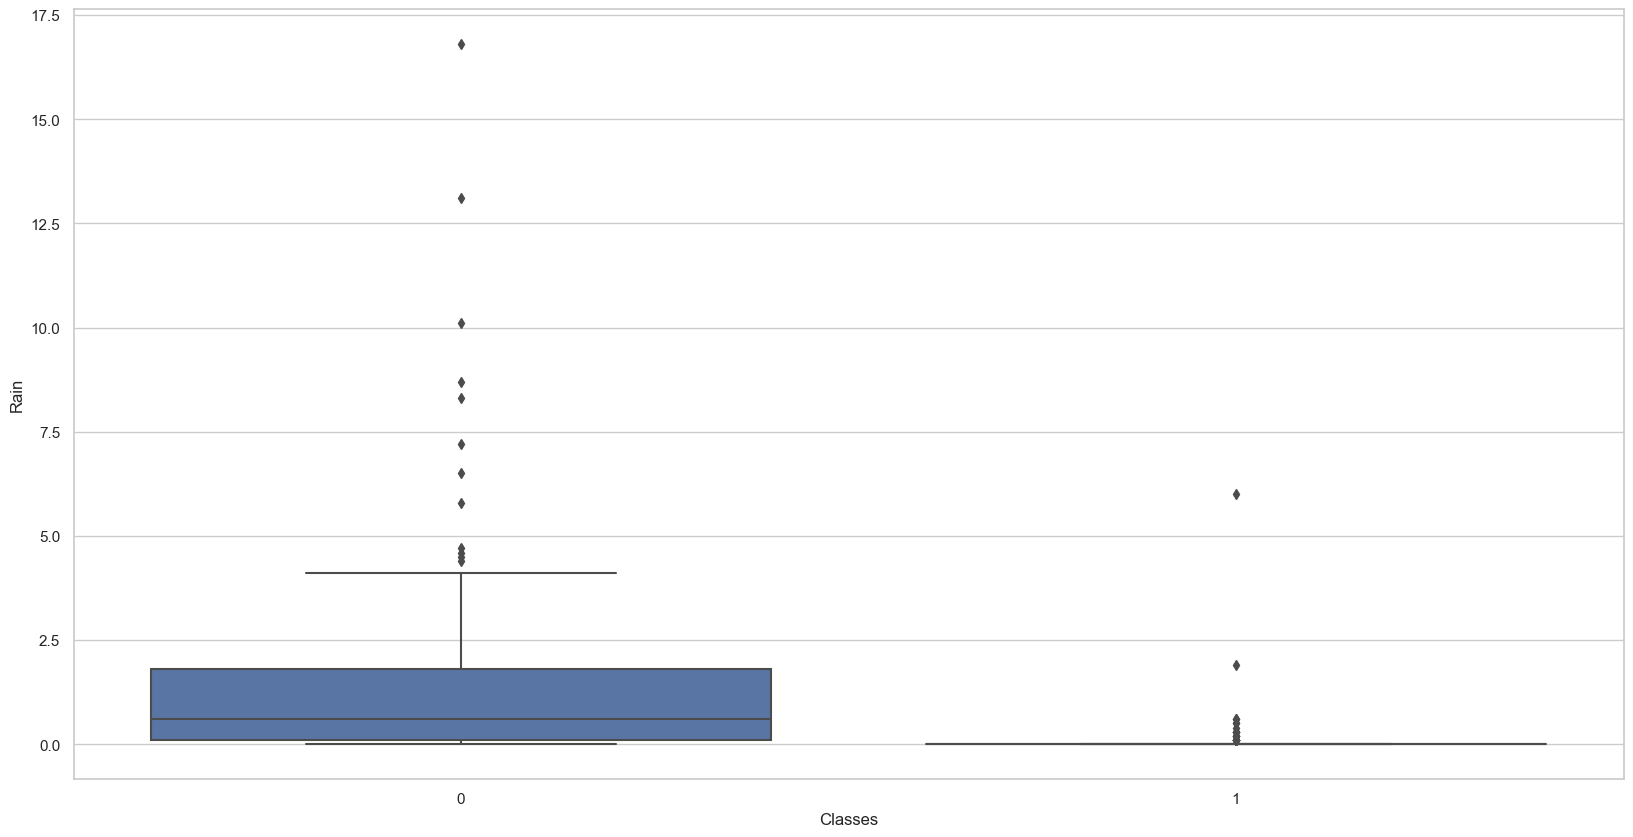

In [311]:
# Python program to illustrate
# Boxplot using inbuilt dataset

# Given in seaborn

# importing the required module
import seaborn

# setting background of the plot
seaborn.set(style='whitegrid')

# Loading dataset
seaborn.boxplot(x='Classes', y='Rain', data=df)

Observations :
- There are days with Rain where Fire in the forest

#### Box Plot : Numerical  features

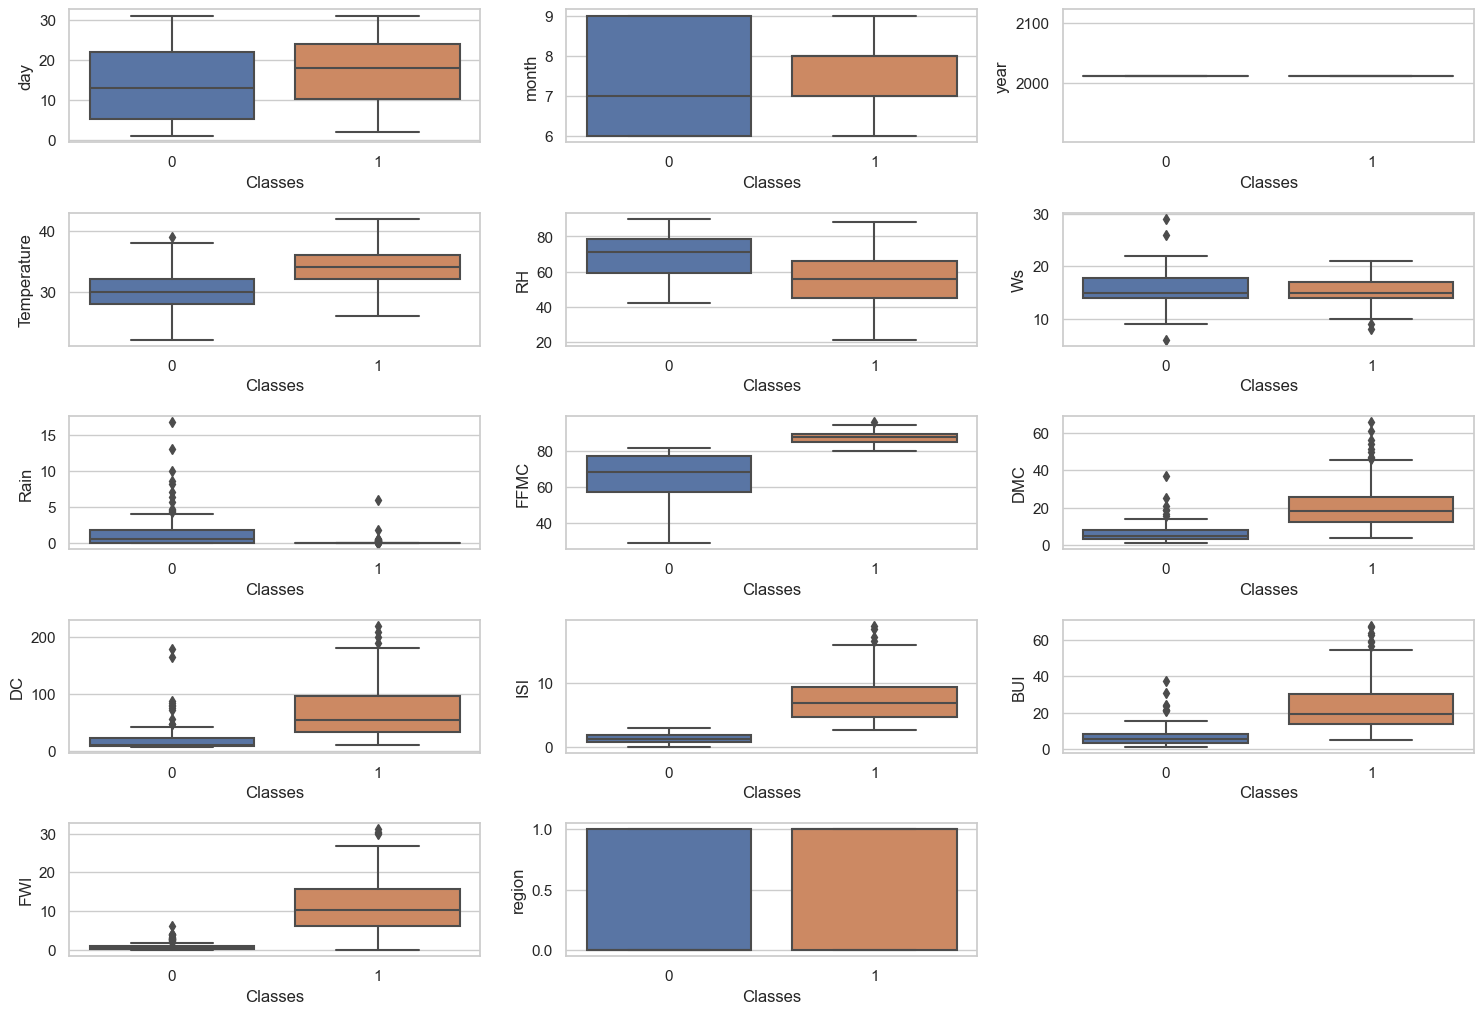

In [312]:
plt.figure(figsize=(15, 20))

for i in range(0, len(col_num)):
    ax = plt.subplot(10, 3, i+1)
    sns.boxplot(data=df, x='Classes', y=df[col_num[i]])
    plt.tight_layout()

Observation :
- 'Not Fire' plot has outliers 

### Splitting the data into input features (X) and output label (y)

In [313]:
## Independent and Dependent feature
X = df.drop(['Classes'], axis=1)
y = df['Classes']

In [314]:
X.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012         29.0  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012         29.0  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012         26.0  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012         25.0  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012         27.0  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  region  
0  0.5     0.0  
1  0.4     0.0  
2  0.1     0.0  
3  0.0     0.0  
4  0.5     0.0

In [315]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

## Train Test split

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=18)

In [318]:
X_train.shape , X_test.shape

((163, 14), (81, 14))

In [319]:
y_train.shape, y_test.shape

((163,), (81,))

## Variance Inflation Factor (VIF)
Variance Inflation Factor measures how much the independent variable got affected due to interaction or correlation with other variable.

In [320]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [321]:
# Check multicollinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

vif     Features
0     1.483721          day
1     1.093776        month
2   518.642422         year
3     2.434045  Temperature
4     2.895684           RH
5     1.314719           Ws
6     1.551807         Rain
7     3.929051         FFMC
8    83.460823          DMC
9    25.676007           DC
10   15.220428          ISI
11  173.599309          BUI
12   25.497727          FWI
13    1.620173       region

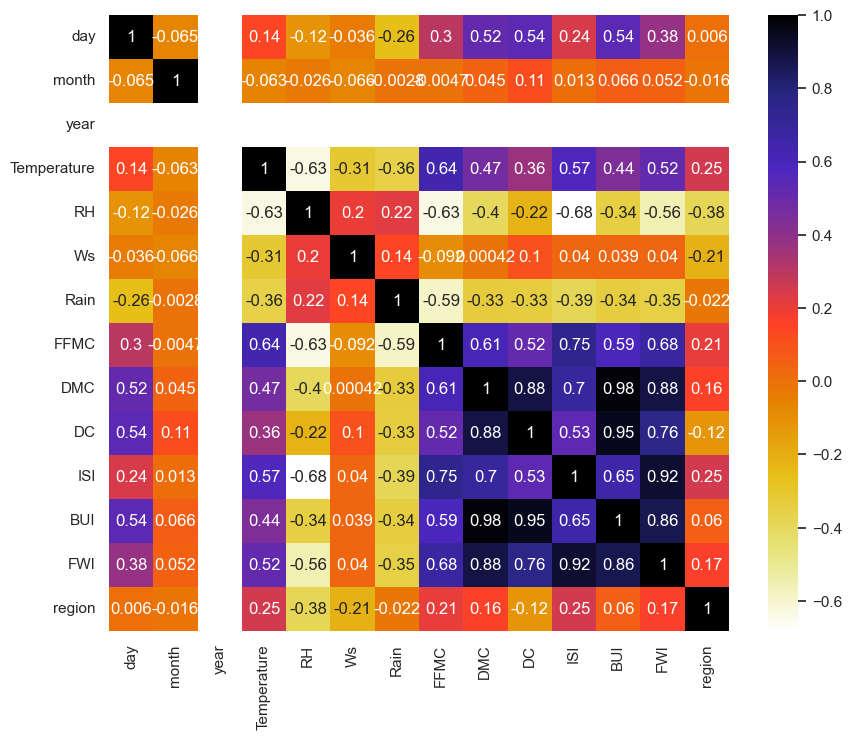

In [322]:
# Heatmap : To check correlation

plt.figure(figsize=(10,8))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [323]:
X_train.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  \
142   21      6  2012         32.0  55  14   0.0  86.2   8.3   18.4  5.0   
168   17      7  2012         32.0  81  17   0.0  84.6  21.1   42.3  4.7   
204   22      8  2012         37.0  53  14   0.0  89.5  41.1  127.5  8.0   
10    11      6  2012         31.0  65  14   0.0  84.5  12.5   54.3  4.0   
62     2      8  2012         35.0  55  12   0.4  78.0   5.8   10.0  1.7   

      BUI   FWI  region  
142   8.2   4.9     1.0  
168  20.9   7.7     1.0  
204  45.5  18.1     1.0  
10   15.8   5.6     0.0  
62    5.5   0.8     0.0

In [324]:
X_test.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  \
91    31      8  2012         28.0  80  21  16.8  52.5   8.7    8.7  0.6   
181   30      7  2012         36.0  56  16   0.0  88.9  23.8   57.1  8.2   
125    4      6  2012         30.0  64  14   0.0  79.4   5.2   15.4  2.2   
58    29      7  2012         32.0  73  15   0.0  86.6  26.7  127.0  5.6   
148   27      6  2012         36.0  55  15   0.0  89.1  20.9   43.3  8.0   

      BUI   FWI  region  
91    8.3   0.3     0.0  
181  23.8  13.2     1.0  
125   5.6   1.0     1.0  
58   35.0  11.9     0.0  
148  20.8  12.0     1.0

## Standardize or feature scaling the dataset

In [325]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

- fit() is used to compute mean and standard deviation to a given feature to be under feature, used for scaling further
- transform() is used to perform feature scaling using mean and std. dev. computed by fit().
- fit_transform() iperforms both the operation

In [326]:
X_train_scaled = scaler.fit_transform(X_train)

In [327]:
X_test_scaled = scaler.transform(X_test)

In [328]:
X_train_scaled

array([[ 0.57192037, -1.38738252,  0.        , ..., -0.6248808 ,
        -0.31516399,  0.95793896],
       [ 0.10696765, -0.48998827,  0.        , ...,  0.21172879,
         0.046336  ,  0.95793896],
       [ 0.68815855,  0.40740598,  0.        , ...,  1.83224814,
         1.38905023,  0.95793896],
       ...,
       [ 1.50182581,  1.30480023,  0.        , ..., -0.96742961,
        -0.93487825, -1.04390785],
       [ 0.45568219, -1.38738252,  0.        , ..., -0.82909259,
        -0.89614611, -1.04390785],
       [-0.35798507, -0.48998827,  0.        , ..., -0.3943191 ,
        -0.50882469, -1.04390785]])

In [329]:
X_test_scaled

array([[ 1.73430217,  0.40740598,  0.        , ..., -0.61829332,
        -0.90905682, -1.04390785],
       [ 1.61806399, -0.48998827,  0.        , ...,  0.40276562,
         0.75642525,  0.95793896],
       [-1.40412869, -1.38738252,  0.        , ..., -0.7961552 ,
        -0.81868182,  0.95793896],
       ...,
       [-0.00927053, -0.48998827,  0.        , ..., -0.61829332,
        -0.89614611, -1.04390785],
       [-1.28789051, -0.48998827,  0.        , ..., -0.56559351,
        -0.31516399, -1.04390785],
       [-1.63660505, -1.38738252,  0.        , ..., -0.90814231,
        -0.89614611, -1.04390785]])

Text(0.5, 1.0, 'X_train : After Scaling')

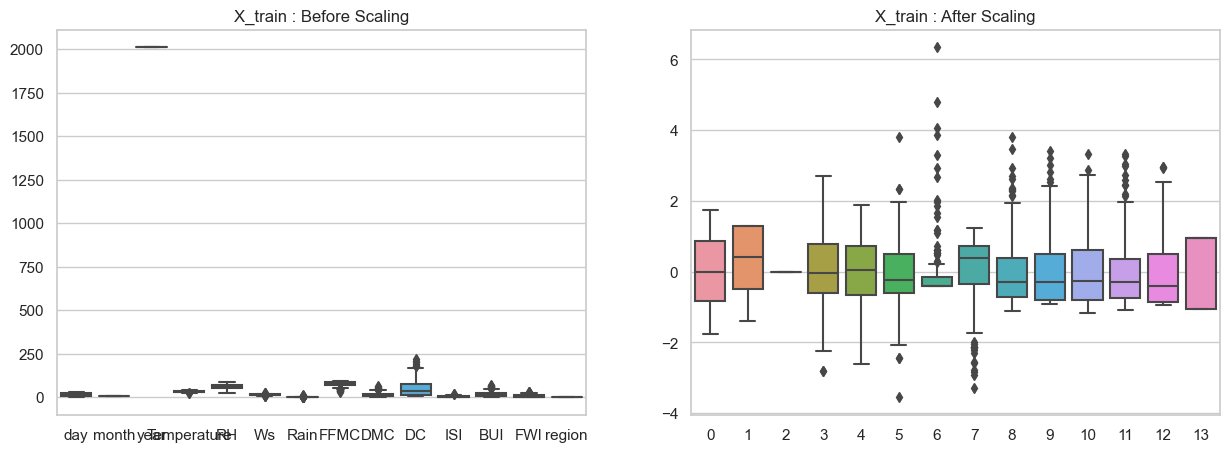

In [330]:
# Comparing the Train and Test data after standardization 
# fit_transform()

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train : Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train : After Scaling')

Text(0.5, 1.0, 'X_test : After Scaling')

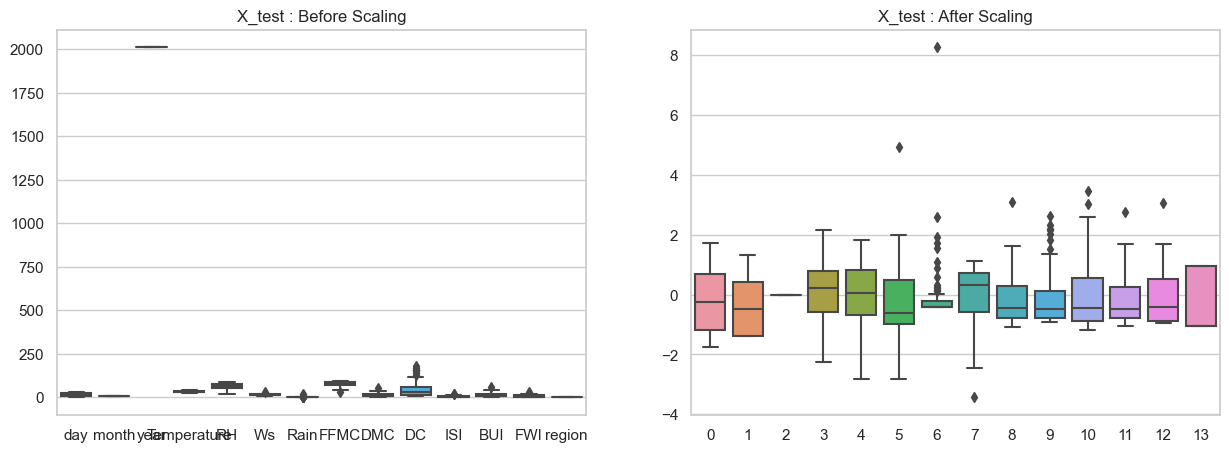

In [331]:
# transform()

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_test)
plt.title('X_test : Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test_scaled)
plt.title('X_test : After Scaling')

# Model Training

## Model 1: Using Logistic Regression

In [332]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [333]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [334]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [335]:
# Model saving/ pickling the model
# Converting the mathematical equation to serialized value

import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
# Standard Scaler object  
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [336]:
# model saving or pickling of our model

import pickle
# Writing different model files to file
with open( 'AlgerianForestFire.pkl', 'wb') as f:
    pickle.dump(log_reg,f)
    
# Standard Scaler object  
with open('AlgerianScalar.pkl', 'wb') as f:
    pickle.dump(scaler,f)

### Loading file

In [337]:
#with open('logreg.pkl', 'rb') as f:
#    pickle.load(f)
model = pickle.load(open('AlgerianForestFire.pkl', 'rb'))

#### Prediction from loaded file

In [338]:
df[120:130]

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
120   29      9  2012         26.0  80  16   1.8  47.4  2.9   7.7  0.3   3.0   
121   30      9  2012         25.0  78  14   1.4  45.0  1.9   7.5  0.2   2.4   
122    1      6  2012         32.0  71  12   0.7  57.1  2.5   8.2  0.6   2.8   
123    2      6  2012         30.0  73  13   4.0  55.7  2.7   7.8  0.6   2.9   
124    3      6  2012         29.0  80  14   2.0  48.7  2.2   7.6  0.3   2.6   
125    4      6  2012         30.0  64  14   0.0  79.4  5.2  15.4  2.2   5.6   
126    5      6  2012         32.0  60  14   0.2  77.1  6.0  17.6  1.8   6.5   
127    6      6  2012         35.0  54  11   0.1  83.7  8.4  26.3  3.1   9.3   
128    7      6  2012         35.0  44  17   0.2  85.6  9.9  28.9  5.4  10.7   
129    8      6  2012         28.0  51  17   1.3  71.4  7.7   7.4  1.5   7.3   

     FWI  Classes  region  
120  0.1        0     0.0  
121  0.1        0     0.0  
122  0.2        0     1.0  
123  0.2        0     1.0  
124  0.1        0     1.0  
125  1.0        0     1.0  
126  0.9        0     1.0  
127  3.1        1     1.0  
128  6.0        1     1.0  
129  0.8        0     1.0

In [339]:
# For prediction considering features 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC' , 'ISI', 'BUI', 'FWI', 'region' 
# considering the similar scaled data for the model

test1 = scaler.transform([[29,9,2012,26.0,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0.0]])
test2 = scaler.transform([[7,6,2012,35.0,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,1.0]])

In [340]:
model.predict(test1)

array([0], dtype=int64)

In [341]:
model.predict(test2)

array([1], dtype=int64)

In [342]:
log_reg.predict(test1)

array([0], dtype=int64)

In [343]:
log_reg.predict(test2)

array([1], dtype=int64)

In [344]:
#with open('logreg.pkl', 'rb') as f:
#    pickle.load(f)

In [345]:
# print the coefficients

print(log_reg.coef_)

[[-0.42573978 -0.13658613  0.         -0.06362536  0.41062303 -0.07936613
   0.10629377  2.35437996 -0.05088184  0.56713377  2.30410473  0.07987979
   1.6162999   0.15873314]]


In [346]:
# print  the intercept

print(log_reg.intercept_)

[1.63514475]


In [347]:
print("Training Score:",log_reg.score(X_train_scaled, y_train))
print("Test Score:",log_reg.score(X_test_scaled,y_test))

Training Score: 0.9754601226993865
Test Score: 0.9753086419753086


In [348]:
# Prediction for the test data

y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [349]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
predictions

Actual  Predicted
91        0          0
181       1          1
125       0          0
58        1          1
148       1          1
..      ...        ...
65        1          1
116       0          0
45        0          0
34        1          1
1         0          0

[81 rows x 2 columns]

In [350]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9753086419753086

In [351]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[36,  2],
       [ 0, 43]], dtype=int64)

In [352]:
true_positive = conf_mat[0][0]
true_positive

36

In [353]:
false_positive = conf_mat[0][1]
false_positive

2

In [354]:
false_negative = conf_mat[1][0]
false_negative

0

In [355]:
true_negative = conf_mat[1][1]
true_negative

43

In [356]:
# Calculating the Accuracy from confusion matrix value

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9753086419753086

In [357]:
# Precison

Precision = true_positive/(true_positive+false_positive)
Precision

0.9473684210526315

In [358]:
# Recall

Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [359]:
# F1 Score

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.972972972972973

In [360]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [361]:
Classification_Report = classification_report(y_test,y_pred)  #classification report is a performance evaluation metric.It is used to show 
print (Classification_Report)                                 #the precision, recall, F1 Score, and support of your trained classification model

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.96      1.00      0.98        43

    accuracy                           0.98        81
   macro avg       0.98      0.97      0.98        81
weighted avg       0.98      0.98      0.98        81



In [362]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 500x500 with 0 Axes>

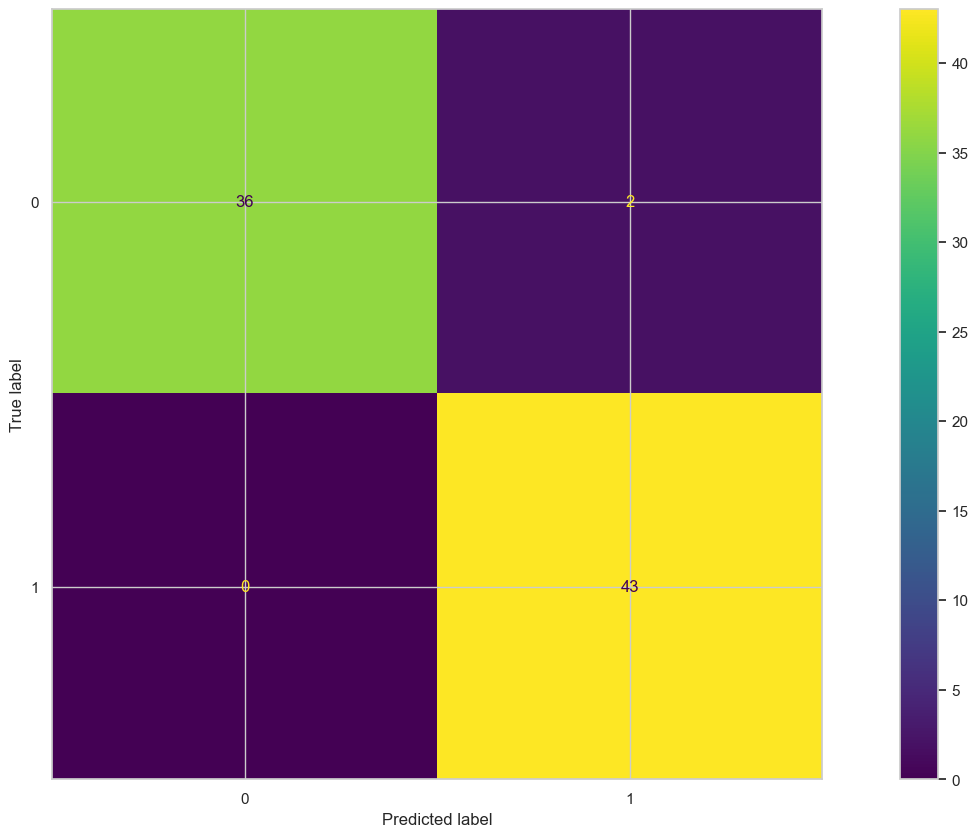

In [363]:
# Confusion matrix display
plt.figure(figsize=(5,5))
plot_confusion_matrix(log_reg, X_test_scaled, y_test)  
plt.show()

Precision or Recall : it depends on the business requirement and type of Business .For example, if you are predicting fire, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision. Can we maximise both at the same time? No,So, there is a need for a better metric then?Yes. And it’s called an F1 Score

# Creating a model from imbalanced data by handling:
1.Use the right evaluation metrics:Confusion Matrix,Precision,Recall,F1score

2.Undersampling

3.Oversampling

4.Creating synthetic data

5.Cost sensitive learning

6.Ensemble methods

Before changing the dataset, we must split the dataset into training and testing because the change is only for the training purpose.

### Undersampling
resamples the majority class points in the data to make them equal to the minority class points. We will be creating a new dataset out of the original dataset using undersampling.

In [364]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 45)

In [365]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_US,Y_train_US =rus.fit_resample(X_train, y_train)

In [366]:
X_train_US,y_train_US = rus.fit_resample(X_train, y_train)

In [367]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)


In [368]:
X_train_US,y_train_US =rus.fit_resample(X_train, y_train)

In [369]:
X_train_US.shape , X_test.shape

((160, 14), (61, 14))

In [370]:
y_train_US.shape , y_test.shape

((160,), (61,))

Now, we can see that the X_train has fewer observations(154) than the original one (182)

In [371]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_US)
X_test=scaler.transform(X_test)
log_reg = LogisticRegression()

log_reg.fit(X_train_US,Y_train_US)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [372]:
X_train_US

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
0      9      9  2012         30.0  77  15   1.0  56.1   2.1    8.4   0.7   
1      9      6  2012         27.0  59  18   0.1  78.1   8.5   14.7   2.4   
2     12      8  2012         35.0  51  13   0.3  81.3  15.6   75.1   2.5   
3     30      6  2012         34.0  42  15   1.7  79.7  12.0    8.5   2.2   
4     22      6  2012         31.0  67  17   0.1  79.1   7.0   39.5   2.4   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...    ...   ...   
155   10      6  2012         30.0  41  15   0.0  89.4  13.3   22.5   8.4   
156    7      7  2012         38.0  43  13   0.5  85.0  13.0   35.4   4.1   
157   31      7  2012         35.0  64  17   0.0  87.2  31.9  145.7   6.8   
158   22      7  2012         32.0  48  18   0.0  91.5  44.2   90.1  13.2   
159    5      8  2012         34.0  65  13   0.0  86.8  11.1   29.7   5.2   

      BUI   FWI  region  
0     2.6   0.2     0.0  
1     8.3   1.9     1.0  
2    20.7   4.2     0.0  
3    11.5   2.2     1.0  
4     9.7   2.3     0.0  
..    ...   ...     ...  
155  13.1  10.0     1.0  
156  13.7   5.2     1.0  
157  41.2  15.7     0.0  
158  44.0  25.4     1.0  
159  11.5   6.1     0.0  

[160 rows x 14 columns]

In [373]:
X_test

array([[-0.97768203,  1.40486475,  0.        , -0.24792139, -0.04384417,
        -0.22322307, -0.39118837,  0.46378032, -0.64807688, -0.61651821,
        -0.16275158, -0.65738622, -0.42911317,  0.98757716],
       [-0.75162838, -0.37909049,  0.        ,  0.01477677,  0.34588178,
        -0.57337692,  0.23248561, -0.64020276, -0.49946454, -0.79692245,
        -0.78771762, -0.58810107, -0.77023887, -1.01257911],
       [-0.75162838,  0.51288713,  0.        ,  0.80287124, -0.23870715,
         0.47708461, -0.39118837,  0.73481808,  0.05587628,  0.21758608,
         0.55480204,  0.13939307,  0.44994152, -1.01257911],
       [-0.07346744,  1.40486475,  0.        ,  0.01477677, -0.75834175,
        -0.92353076, -0.39118837,  0.82075688,  0.1497367 ,  0.07326269,
         0.55480204,  0.13246456,  0.4368213 ,  0.98757716],
       [-1.54281616,  0.51288713,  0.        ,  2.11636203, -1.86256528,
        -0.57337692, -0.39118837,  1.12484803, -0.25699179, -0.53798931,
         2.15193749, -0.36

In [374]:
y_pred_US = log_reg.predict(X_test)

In [375]:
y_pred_US

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

#### Performace Matrics for Logistic Regression:Imbalance data handling using Undersampling

In [376]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_US)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [377]:
print(true_positive, false_positive, false_negative, true_negative)

24 2 3 32


In [378]:
# Breaking down the formula for Accuracy

Accuracy_US = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy_US',Accuracy_US)

Accuracy_US 0.9180327868852459


In [379]:
# Precison

Precision_US = true_positive/(true_positive+false_positive)
print('Precision_US',Precision_US)

Precision_US 0.9230769230769231


In [380]:
# Recall

Recall = true_positive/(true_positive+false_negative)
print('Recall',Recall)

Recall 0.8888888888888888


In [381]:
# F1 Score

F1_Score_US = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score_US',F1_Score_US)

F1_Score_US 0.9171974522292994


#### observation for Undersampling:
- Accuracy is decreased to 0.95 and it is more meaningful now,precision become 0.89 which means out of all actual values how many are correctly predicted and F1_score 0.96.
- The major disadvantage of undersampling is that we do not use a significant chunk of the data, which contains some information. Therefore, we are losing information, and as a result, we will not get significant results.

In [382]:
import pickle
# Writing different model files to file
with open( 'log_regress_US_modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

##### Undersampling : 
In random undersampling method, we balance the imbalanced class distribution by choosing and eliminating observations from majority class to make the dataset balanced.
#### Advantages
- If the dataset is huge, we might face run time and storage problems. Undersampling can help to handle these problems successfully by improving run time and storage problems by reducing the number of training data samples. #### Disadvantages

- This method can discard potentially useful information which could be important for building the classifiers.

- The sample chosen by random under sampling may be a biased one. It may not be an accurate representation of the population. So, it results in inaccurate results with the actual dataset.

#### Balanced dataset from imbalanced dataset using Oversampling
- Oversampling refers to the resampling of the minority class points to equal the total number of majority points. Repetition of the minority class points is one such type of oversampling technique.

- Apart from repetition, we can provide the class weights to both the class. Providing the large weights to the minority class will give the same result as from that of repetition.

In [383]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 45)

In [384]:
##importing library 

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_OS,y_train_OS = ros.fit_resample(X_train, y_train)

In [385]:
X_train_OS.shape

(206, 14)

In [386]:
y_train_OS.shape

(206,)

#### * Now, we can see that the new X_train has more (210)observations than the original one(182)

Over-sampling increases the number of minority class members in the training set.

In [387]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_OS)
X_test=scaler.transform(X_test)
log_reg = LogisticRegression()

log_reg.fit(X_train_OS,y_train_OS)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [388]:
y_pred_OS = log_reg.predict(X_test)

In [389]:
y_pred_OS

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

Performace Matrics for Logistic Regression:Imbalance data handling using Oversampling

In [390]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test,y_pred_OS)
print('conf_mat\n',conf_mat)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

conf_mat
 [[25  1]
 [ 8 27]]


In [391]:
print(true_positive, false_positive, false_negative, true_negative)

25 1 8 27


In [392]:
# Breaking down the formula for Accuracy

Accuracy_OS = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy_OS',Accuracy_OS)

Accuracy_OS 0.8524590163934426


In [393]:
# Precison

Precision_OS = true_positive/(true_positive+false_positive)
print('Precision_OS',Precision_OS)

Precision_OS 0.9615384615384616


In [394]:
# Recall

Recall_OS = true_positive/(true_positive+false_negative)
print('Recall_OS',Recall_OS)

Recall_OS 0.7575757575757576


In [395]:
# F1 Score

F1_Score_OS = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score_OS',F1_Score_OS)

F1_Score_OS 0.9171974522292994


In [396]:
###saving the model
import pickle
# Writing different model files to file
with open( 'log_regress_OS_modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

*Accuracy =0.9344 is slightly decreased now it is more meaningful now. precision is 0.86,F1 score 0.9642

#### Random oversampling: 
In random oversampling, we balance the data by randomly oversampling the minority class.

- Advantages : An advantage of this method is that it leads to no information loss.This method outperform under sampling.

- Disadvantages : This method increases the likelihood of overfitting as it replicates the minority class labels.

#### Creating synthetic data: Synthetic Minority Oversampling Technique
- The problem with repeating the data is that it does not provide any extra information. One way to increase the information about the data is by creating synthetic data points.
- One such technique is the SMOTE (Synthetic Minority Oversampling technique). As the name suggests, SMOTE is an oversampling technique. In layman terms, SMOTE will create synthetic data points for the minority class. It creates new instances between the points of the minority class.
- In the context of synthetic data generation, there is a powerful and widely used method known as synthetic minority oversampling technique or SMOTE. Under this technique, artificial data is created based on feature space. Artificial data is generated with bootstrapping and k-nearest neighbours algorithm.

In [397]:
from imblearn.over_sampling import SMOTE

In [398]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 45)

In [399]:
smote = SMOTE()
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train,y_train)

In [400]:
X_train_SMOTE

day  month  year  Temperature  RH  Ws      Rain       FFMC        DMC  \
0      9      9  2012    30.000000  77  15  1.000000  56.100000   2.100000   
1     11      6  2012    31.000000  65  14  0.000000  84.500000  12.500000   
2      9      6  2012    27.000000  59  18  0.100000  78.100000   8.500000   
3     12      8  2012    35.000000  51  13  0.300000  81.300000  15.600000   
4     30      6  2012    34.000000  42  15  1.700000  79.700000  12.000000   
..   ...    ...   ...          ...  ..  ..       ...        ...        ...   
201    1      9  2012    24.106726  78  16  8.063498  41.384751   1.121345   
202   17      7  2012    30.345995  61  14  0.034600  78.722791   3.649794   
203    6      8  2012    30.414793  71  15  0.312219  67.763343   3.350163   
204   25      9  2012    26.534890  82  19  5.425577  46.594161   3.936058   
205    6      8  2012    32.379999  60  12  3.386000  68.241999   5.903999   

            DC       ISI        BUI       FWI    region  
0     8.400000  0.700000   2.600000  0.200000  0.000000  
1    54.300000  4.000000  15.800000  5.600000  0.000000  
2    14.700000  2.400000   8.300000  1.900000  1.000000  
3    75.100000  2.500000  20.700000  4.200000  0.000000  
4     8.500000  2.200000  11.500000  2.200000  1.000000  
..         ...       ...        ...       ...       ...  
201   7.351121  0.140448   1.591569  0.070224  0.000000  
202  15.803799  2.107597   4.580595  1.007597  0.000000  
203  13.436331  1.293890   3.925725  0.500000  0.000000  
204   7.780234  0.319766   3.855825  0.073255  0.267445  
205   9.233000  1.119000   5.684999  0.519000  1.000000  

[206 rows x 14 columns]

In [401]:
y_train_SMOTE

0      0
1      1
2      0
3      0
4      0
      ..
201    0
202    0
203    0
204    0
205    0
Name: Classes, Length: 206, dtype: int64

In [402]:
X_train.shape

(183, 14)

In [403]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_SMOTE)
X_test=scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_SMOTE = log_reg.predict(X_test)

Performace Matrics for Logistic Regression:Imbalance data handling using SMOTE

In [404]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test,y_pred_SMOTE)
print('conf_mat\n',conf_mat)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

conf_mat
 [[25  1]
 [ 8 27]]


In [405]:
print(true_positive, false_positive, false_negative, true_negative)

25 1 8 27


In [406]:
# Breaking down the formula for Accuracy

Accuracy_SMOTE = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy_SMOTE',Accuracy_SMOTE)

Accuracy_SMOTE 0.8524590163934426


In [407]:
# Precison

Precision_SMOTE = true_positive/(true_positive+false_positive)
print('Precision_SMOTE',Precision_SMOTE)

Precision_SMOTE 0.9615384615384616


In [408]:
# Recall
Recall_SMOTE = true_positive/(true_positive+false_negative)
print('Recall_SMOTE',Recall_SMOTE)

Recall_SMOTE 0.7575757575757576


In [409]:
# F1 Score
F1_Score_SMOTE = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score_SMOTE',F1_Score_SMOTE)

F1_Score_SMOTE 0.9171974522292994


SMOTE: Accuracy sightly decreased to 0.9508 ,gives precision 0.89 and Recall

In [410]:
### saving the model
import pickle
# Writing different model files to file
with open( 'log_regress_SMOTE_modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

### Conclusion
- In this jupyter notebook, I have discussed various approaches to deal with the problem of imbalanced classes. These are random oversampling, random undersampling,over-sampling : SMOTE.

- Some combination of these approaches will help us to create a better classifier. Simple sampling techniques may handle slight imbalance whereas more advanced methods like ensemble methods are required for extreme imbalances. The most effective technique will vary according to the dataset.

- So, based on the above discussion, we can conclude that there is no one solution to deal with the imbalanced classes problem. We should try out multiple methods to select the best-suited sampling techniques for the dataset in hand. The most effective technique will vary according to the characteristics of the dataset.